Air quality is a major public health concern, and ozone is one of the most harmful pollutants. Ozone can cause a range of respiratory problems, including asthma attacks, bronchitis, and pneumonia. It can also damage the heart and lungs, and increase the risk of premature death.

In this project, I will explore the trends in Air Quality Index (my target variable) for ozone across states and counties in the United States over a five-year period. I will identify any patterns that may emerge, and assess the potential impact of these trends on public health.

My goal is to understand the air quality challenges facing different communities, and to develop recommendations for improving air quality and protecting public health.

I have combined the years 2018, 2019, 2020, 2021, 2022.

The link for the data sets are,
https://aqs.epa.gov/aqsweb/airdata/download_files.html#Raw

Daily AQI by County_2018, 2019, 2020, 2021, 2022

My combined data is sufficient for my time series analysis. 

# Notes:
Criteria Air Pollutants
EPA sets national air quality standards for six common pollutants, also called criteria pollutants, to protect public health. Monitoring sites report data to EPA for these six criteria air pollutants:

Ozone (O3)
Particulate matter (PM10 and PM2.5)
Carbon monoxide (CO)
Nitrogen dioxide (NO2)
Sulfur dioxide (SO2)
Lead (Pb)
(PM10 includes particles less than or equal to 10 micrometers in diameter.  PM2.5 includes particles less than or equal to 2.5 micrometers and is also called fine particle pollution.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
import statsmodels.formula.api as smf

import statsmodels.api as sm


### Read the data:

In [3]:
#Here I am combining the required data sets for my analysis:
file_names = ['daily_aqi_by_county_2018.csv', 'daily_aqi_by_county_2019.csv', 'daily_aqi_by_county_2020.csv', 'daily_aqi_by_county_2021.csv', 'daily_aqi_by_county_2022.csv']

dfs = []

for file_name in file_names:
    df = pd.read_csv(file_name)
    dfs.append(df)

aqi_all = pd.concat(dfs, ignore_index=True)

aqi_all.head()

State Name county Name  State Code  County Code       Date  AQI Category  \
0    Alabama     Baldwin           1            3   1/2/2018   32     Good   
1    Alabama     Baldwin           1            3   1/5/2018   34     Good   
2    Alabama     Baldwin           1            3   1/8/2018   15     Good   
3    Alabama     Baldwin           1            3  1/11/2018   19     Good   
4    Alabama     Baldwin           1            3  1/14/2018   25     Good   

  Defining Parameter Defining Site  Number of Sites Reporting  
0              PM2.5   01-003-0010                          1  
1              PM2.5   01-003-0010                          1  
2              PM2.5   01-003-0010                          1  
3              PM2.5   01-003-0010                          1  
4              PM2.5   01-003-0010                          1

In [4]:
aqi_all.columns = aqi_all.columns.str.replace(' ', '_')

In [5]:
#The number of rows and columns in the data sets
aqi_all.shape

(1505880, 10)

In [6]:
#The names of the variables
aqi_all.columns

Index(['State_Name', 'county_Name', 'State_Code', 'County_Code', 'Date', 'AQI',
       'Category', 'Defining_Parameter', 'Defining_Site',
       'Number_of_Sites_Reporting'],
      dtype='object')

#### Here I am going to use this data as time series application and I would like to explore the different categories that cause air pollution on numerous states.

In [7]:
aqi_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505880 entries, 0 to 1505879
Data columns (total 10 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   State_Name                 1505880 non-null  object
 1   county_Name                1505880 non-null  object
 2   State_Code                 1505880 non-null  int64 
 3   County_Code                1505880 non-null  int64 
 4   Date                       1505880 non-null  object
 5   AQI                        1505880 non-null  int64 
 6   Category                   1505880 non-null  object
 7   Defining_Parameter         1505880 non-null  object
 8   Defining_Site              1505880 non-null  object
 9   Number_of_Sites_Reporting  1505880 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 114.9+ MB


In [8]:
aqi_all.isna().sum()

State_Name                   0
county_Name                  0
State_Code                   0
County_Code                  0
Date                         0
AQI                          0
Category                     0
Defining_Parameter           0
Defining_Site                0
Number_of_Sites_Reporting    0
dtype: int64

In [9]:
aqi_all.describe()

State_Code   County_Code           AQI  Number_of_Sites_Reporting
count  1.505880e+06  1.505880e+06  1.505880e+06               1.505880e+06
mean   3.033573e+01  7.996036e+01  3.905958e+01               1.977824e+00
std    1.619986e+01  8.962213e+01  2.328362e+01               2.407606e+00
min    1.000000e+00  1.000000e+00  0.000000e+00               1.000000e+00
25%    1.700000e+01  2.300000e+01  2.800000e+01               1.000000e+00
50%    3.100000e+01  5.900000e+01  3.700000e+01               1.000000e+00
75%    4.200000e+01  1.070000e+02  4.600000e+01               2.000000e+00
max    8.000000e+01  8.400000e+02  7.577000e+03               3.600000e+01

In [10]:
aqi_all['Defining_Parameter'].value_counts()

Ozone    862331
PM2.5    562963
PM10      53739
NO2       23545
CO         3302
Name: Defining_Parameter, dtype: int64

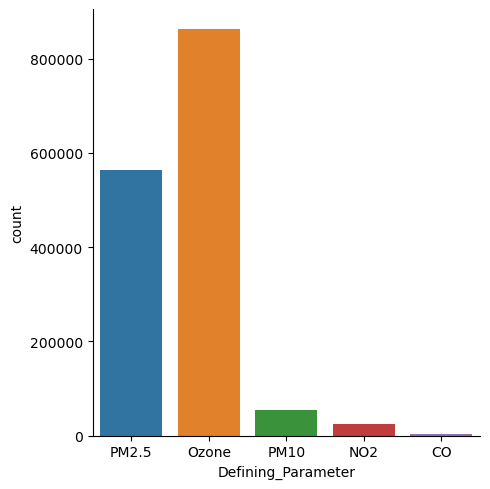

In [11]:
sns.catplot(data = aqi_all, x='Defining_Parameter' ,kind='count')

plt.show()

In [12]:
#Creating a column date_dt 
aqi_all['date_dt'] = pd.to_datetime( aqi_all['Date'] )

In [13]:
#creating a column for year and sorting out based on it:
aqi_all['the_year'] = aqi_all.date_dt.dt.year

In [14]:
#creating a column for month and sorting out based on it:
aqi_all['the_month'] = aqi_all.date_dt.dt.month

In [15]:
aqi_all.head(10)

State_Name county_Name  State_Code  County_Code       Date  AQI Category  \
0    Alabama     Baldwin           1            3   1/2/2018   32     Good   
1    Alabama     Baldwin           1            3   1/5/2018   34     Good   
2    Alabama     Baldwin           1            3   1/8/2018   15     Good   
3    Alabama     Baldwin           1            3  1/11/2018   19     Good   
4    Alabama     Baldwin           1            3  1/14/2018   25     Good   
5    Alabama     Baldwin           1            3  1/17/2018   23     Good   
6    Alabama     Baldwin           1            3  1/20/2018   46     Good   
7    Alabama     Baldwin           1            3  1/23/2018   14     Good   
8    Alabama     Baldwin           1            3  1/26/2018   42     Good   
9    Alabama     Baldwin           1            3  1/29/2018   15     Good   

  Defining_Parameter Defining_Site  Number_of_Sites_Reporting    date_dt  \
0              PM2.5   01-003-0010                          1 2018-01-02   
1              PM2.5   01-003-0010                          1 2018-01-05   
2              PM2.5   01-003-0010                          1 2018-01-08   
3              PM2.5   01-003-0010                          1 2018-01-11   
4              PM2.5   01-003-0010                          1 2018-01-14   
5              PM2.5   01-003-0010                          1 2018-01-17   
6              PM2.5   01-003-0010                          1 2018-01-20   
7              PM2.5   01-003-0010                          1 2018-01-23   
8              PM2.5   01-003-0010                          1 2018-01-26   
9              PM2.5   01-003-0010                          1 2018-01-29   

   the_year  the_month  
0      2018          1  
1      2018          1  
2      2018          1  
3      2018          1  
4      2018          1  
5      2018          1  
6      2018          1  
7      2018          1  
8      2018          1  
9      2018          1

In [16]:
#Number of unique states:
aqi_all['State_Name'].nunique()

54

In [17]:
#To find unique counties by state in the whole data frame
all_counties_by_state = aqi_all.groupby('State_Name')['county_Name']

In [18]:
all_unique_counties_by_state = all_counties_by_state.nunique()

In [19]:
all_unique_counties_by_state

State_Name
Alabama                 17
Alaska                   9
Arizona                 13
Arkansas                13
California              53
Colorado                34
Connecticut              8
Country Of Mexico        2
Delaware                 3
District Of Columbia     1
Florida                 39
Georgia                 29
Hawaii                   4
Idaho                   20
Illinois                23
Indiana                 37
Iowa                    16
Kansas                  11
Kentucky                27
Louisiana               22
Maine                   11
Maryland                16
Massachusetts           13
Michigan                28
Minnesota               21
Mississippi             11
Missouri                21
Montana                 20
Nebraska                10
Nevada                   9
New Hampshire            7
New Jersey              16
New Mexico              16
New York                29
North Carolina          37
North Dakota            10
Ohio             

In [20]:
#grouping based on Ozone:
aqi_req = aqi_all.loc[ (aqi_all['Defining_Parameter'] == 'Ozone'), :].\
groupby(['State_Name', 'county_Name', 'Defining_Parameter', 'Defining_Site']).\
aggregate(num_rows = ('AQI', 'size'),
          num_reporting_sites = ('Number_of_Sites_Reporting', 'sum'),
          unique_reporting_sites = ('Number_of_Sites_Reporting', 'nunique'),
          num_unique_dates = ('Date', 'nunique'),
          min_date = ('date_dt', 'min'),
          max_date = ('date_dt', 'max'),
          start_year = ('the_year', 'min'),
          end_year = ('the_year', 'max')).copy()

aqi_req

num_rows  \
State_Name county_Name Defining_Parameter Defining_Site             
Alabama    Baldwin     Ozone              01-003-0010         967   
           Colbert     Ozone              01-033-1002         437   
           DeKalb      Ozone              01-049-9991        1523   
           Elmore      Ozone              01-051-0004        1005   
           Etowah      Ozone              01-055-0011         890   
...                                                           ...   
Wyoming    Teton       Ozone              56-039-0009         143   
                                          56-039-1011         939   
                                          56-039-1013           2   
           Uinta       Ozone              56-041-0101         939   
           Weston      Ozone              56-045-0003        1577   

                                                         num_reporting_sites  \
State_Name county_Name Defining_Parameter Defining_Site                        
Alabama    Baldwin     Ozone              01-003-0010                    967   
           Colbert     Ozone              01-033-1002                    437   
           DeKalb      Ozone              01-049-9991                   1870   
           Elmore      Ozone              01-051-0004                   1005   
           Etowah      Ozone              01-055-0011                   1208   
...                                                                      ...   
Wyoming    Teton       Ozone              56-039-0009                    607   
                                          56-039-1011                   3673   
                                          56-039-1013                      7   
           Uinta       Ozone              56-041-0101                   2775   
           Weston      Ozone              56-045-0003                   1577   

                                                         unique_reporting_sites  \
State_Name county_Name Defining_Parameter Defining_Site                           
Alabama    Baldwin     Ozone              01-003-0010                         1   
           Colbert     Ozone              01-033-1002                         1   
           DeKalb      Ozone              01-049-9991                         2   
           Elmore      Ozone              01-051-0004                         1   
           Etowah      Ozone              01-055-0011                         2   
...                                                                         ...   
Wyoming    Teton       Ozone              56-039-0009                         4   
                                          56-039-1011                         5   
                                          56-039-1013                         2   
           Uinta       Ozone              56-041-0101                         3   
           Weston      Ozone              56-045-0003                         1   

                                                         num_unique_dates  \
State_Name county_Name Defining_Parameter Defining_Site                     
Alabama    Baldwin     Ozone              01-003-0010                 967   
           Colbert     Ozone              01-033-1002                 437   
           DeKalb      Ozone              01-049-9991                1523   
           Elmore      Ozone              01-051-0004                1005   
           Etowah      Ozone              01-055-0011                 890   
...                                                                   ...   
Wyoming    Teton       Ozone              56-039-0009                 143   
                                          56-039-1011                 939   
                                          56-039-1013                   2   
           Uinta       Ozone              56-041-0101                 939   
           Weston      Ozone              56-045-0003                1577   

                                    

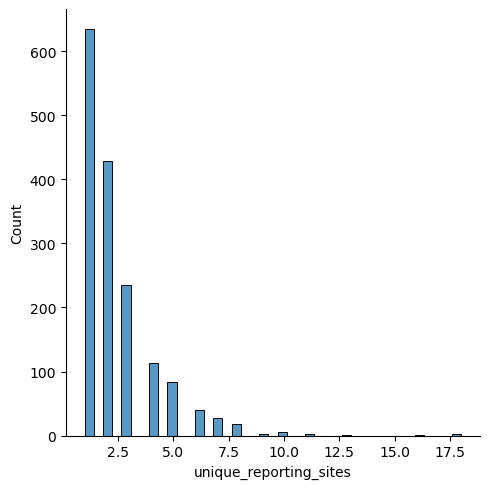

In [284]:
#Creating histogram to visualize the distribution of unique_reporting_sites
sns.displot(data = aqi_req, x='unique_reporting_sites', bins=41)

plt.show()

In [21]:
ozone_df = aqi_req.reset_index().copy()
ozone_df

State_Name county_Name Defining_Parameter Defining_Site  num_rows  \
0       Alabama     Baldwin              Ozone   01-003-0010       967   
1       Alabama     Colbert              Ozone   01-033-1002       437   
2       Alabama      DeKalb              Ozone   01-049-9991      1523   
3       Alabama      Elmore              Ozone   01-051-0004      1005   
4       Alabama      Etowah              Ozone   01-055-0011       890   
...         ...         ...                ...           ...       ...   
1590    Wyoming       Teton              Ozone   56-039-0009       143   
1591    Wyoming       Teton              Ozone   56-039-1011       939   
1592    Wyoming       Teton              Ozone   56-039-1013         2   
1593    Wyoming       Uinta              Ozone   56-041-0101       939   
1594    Wyoming      Weston              Ozone   56-045-0003      1577   

      num_reporting_sites  unique_reporting_sites  num_unique_dates  \
0                     967                       1               967   
1                     437                       1               437   
2                    1870                       2              1523   
3                    1005                       1              1005   
4                    1208                       2               890   
...                   ...                     ...               ...   
1590                  607                       4               143   
1591                 3673                       5               939   
1592                    7                       2                 2   
1593                 2775                       3               939   
1594                 1577                       1              1577   

       min_date   max_date  start_year  end_year  
0    2018-03-01 2022-06-30        2018      2022  
1    2018-03-01 2019-10-31        2018      2019  
2    2018-01-02 2022-08-31        2018      2022  
3    2018-03-21 2022-06-30        2018      2022  
4    2018-03-01 2022-06-30        2018      2022  
...         ...        ...         ...       ...  
1590 2018-08-07 2019-10-06        2018      2019  
1591 2018-01-01 2022-07-31        2018      2022  
1592 2018-09-12 2020-08-20        2018      2020  
1593 2018-01-01 2020-08-24        2018      2020  
1594 2018-01-01 2022-06-30        2018      2022  

[1595 rows x 12 columns]

In [22]:
ozone_df['State_Name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Country Of Mexico', 'Delaware',
       'District Of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [23]:
ozone_df['State_Name'].nunique()

53

In [24]:
#To find unique counties by state in the ozone grouped data frame
counties_by_state = ozone_df.groupby('State_Name')['county_Name']


In [25]:
unique_counties_by_state = counties_by_state.nunique()
unique_counties_by_state

State_Name
Alabama                 15
Alaska                   3
Arizona                 10
Arkansas                 6
California              49
Colorado                27
Connecticut              8
Country Of Mexico        1
Delaware                 3
District Of Columbia     1
Florida                 35
Georgia                 19
Hawaii                   1
Idaho                    4
Illinois                23
Indiana                 30
Iowa                     9
Kansas                   8
Kentucky                27
Louisiana               18
Maine                   11
Maryland                15
Massachusetts           13
Michigan                25
Minnesota               15
Mississippi              9
Missouri                17
Montana                  9
Nebraska                 3
Nevada                   7
New Hampshire            7
New Jersey              15
New Mexico               9
New York                26
North Carolina          32
North Dakota            10
Ohio             

In [26]:
# To find the number of sub Defining_Site as num_rows is not equal to num_reporting_sites
ozone_df['unique_reporting_sites'].value_counts()

1     634
2     428
3     235
4     114
5      84
6      40
7      27
8      18
10      6
9       3
11      2
18      2
13      1
16      1
Name: unique_reporting_sites, dtype: int64

Text(0.5, 1.0, 'Histogram of unique reporting sites')

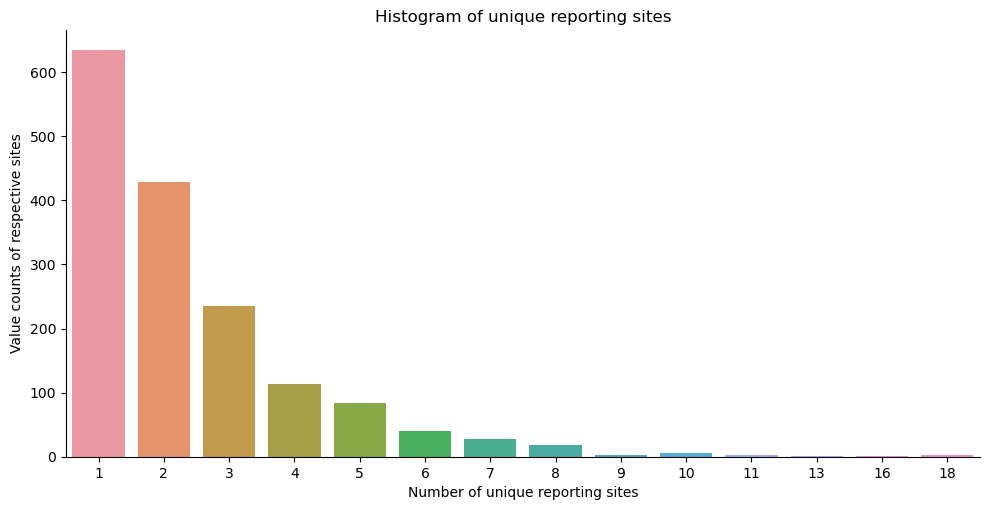

In [27]:
#Summarizing the number of sub Defining_site using Histogram
sns.catplot(data = ozone_df, x='unique_reporting_sites', kind='count', height=5, aspect=2)
plt.xlabel('Number of unique reporting sites')
plt.ylabel('Value counts of respective sites')
plt.title('Histogram of unique reporting sites')

In [28]:
#Number of unique sites with 4 years of data within each county within each state
grouped_data_fouryr = aqi_all.loc[ (aqi_all['Defining_Parameter'] == 'Ozone'), :].\
groupby(['State_Name', 'county_Name', 'Defining_Site']).\
aggregate(date_dt_count=('date_dt', lambda x: x.dt.year.nunique()),
    unique_site=('Defining_Site', 'nunique'),
    count_site=('Defining_Site', 'count')).copy()
#four_year_df = grouped_data_fouryr.reset_index()
grouped_data_fouryr

date_dt_count  unique_site  count_site
State_Name county_Name Defining_Site                                        
Alabama    Baldwin     01-003-0010                5            1         967
           Colbert     01-033-1002                2            1         437
           DeKalb      01-049-9991                5            1        1523
           Elmore      01-051-0004                5            1        1005
           Etowah      01-055-0011                5            1         890
...                                             ...          ...         ...
Wyoming    Teton       56-039-0009                2            1         143
                       56-039-1011                5            1         939
                       56-039-1013                2            1           2
           Uinta       56-041-0101                3            1         939
           Weston      56-045-0003                5            1        1577

[1595 rows x 3 columns]

In [29]:
all_year = grouped_data_fouryr.loc[grouped_data_fouryr['date_dt_count'] == 5].copy()
site_count = all_year.reset_index().copy()


In [30]:
all_year

date_dt_count  unique_site  count_site
State_Name county_Name Defining_Site                                        
Alabama    Baldwin     01-003-0010                5            1         967
           DeKalb      01-049-9991                5            1        1523
           Elmore      01-051-0004                5            1        1005
           Etowah      01-055-0011                5            1         890
           Jefferson   01-073-0023                5            1         135
...                                             ...          ...         ...
Wyoming    Sweetwater  56-037-0200                5            1         269
                       56-037-0300                5            1         829
           Teton       56-039-0008                5            1         482
                       56-039-1011                5            1         939
           Weston      56-045-0003                5            1        1577

[1080 rows x 3 columns]

In [31]:
site_count

State_Name county_Name Defining_Site  date_dt_count  unique_site  \
0       Alabama     Baldwin   01-003-0010              5            1   
1       Alabama      DeKalb   01-049-9991              5            1   
2       Alabama      Elmore   01-051-0004              5            1   
3       Alabama      Etowah   01-055-0011              5            1   
4       Alabama   Jefferson   01-073-0023              5            1   
...         ...         ...           ...            ...          ...   
1075    Wyoming  Sweetwater   56-037-0200              5            1   
1076    Wyoming  Sweetwater   56-037-0300              5            1   
1077    Wyoming       Teton   56-039-0008              5            1   
1078    Wyoming       Teton   56-039-1011              5            1   
1079    Wyoming      Weston   56-045-0003              5            1   

      count_site  
0            967  
1           1523  
2           1005  
3            890  
4            135  
...          ...  
1075         269  
1076         829  
1077         482  
1078         939  
1079        1577  

[1080 rows x 6 columns]

In [32]:
#Counting number of sites per state per county
num_four_site = site_count.groupby(['State_Name', 'county_Name']).\
aggregate(num_site=('Defining_Site', 'count')).reset_index().copy()

In [33]:
num_four_site

State_Name county_Name  num_site
0      Alabama     Baldwin         1
1      Alabama      DeKalb         1
2      Alabama      Elmore         1
3      Alabama      Etowah         1
4      Alabama   Jefferson         6
..         ...         ...       ...
724    Wyoming    Sheridan         1
725    Wyoming    Sublette         6
726    Wyoming  Sweetwater         2
727    Wyoming       Teton         2
728    Wyoming      Weston         1

[729 rows x 3 columns]

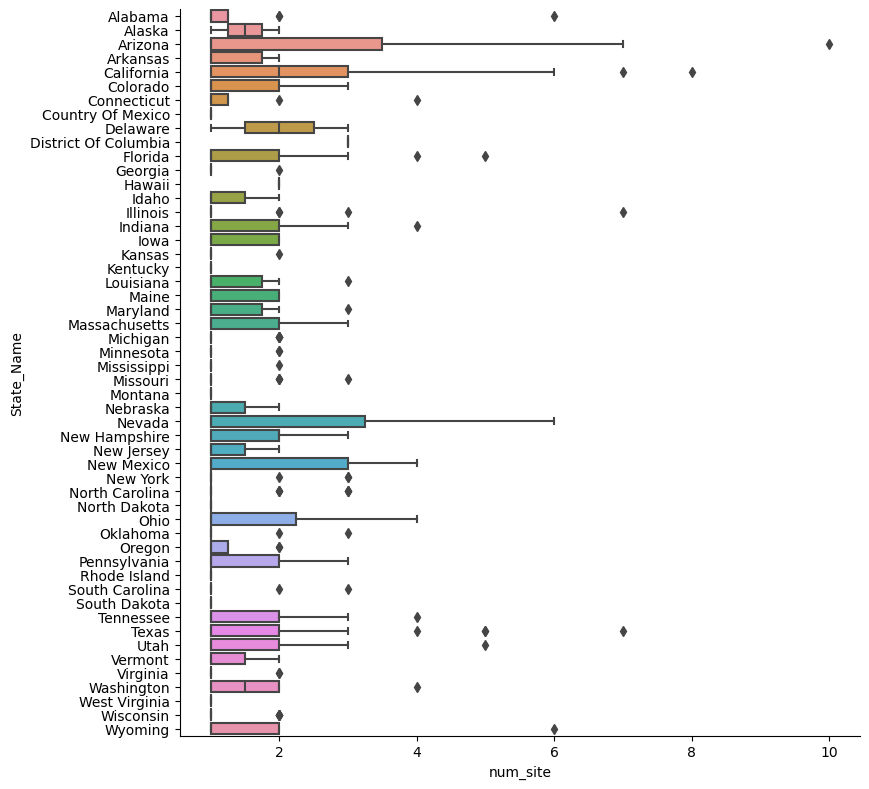

In [34]:
#Summarize the distribution of the number of sites with 4 years of data per state with a boxplot.
#The boxplot will make it easy to see the median number of sites with 4 years of data across all counties within each state.
sns.catplot(data = num_four_site, x='num_site', y = 'State_Name', kind = 'box', height = 8, aspect = 1.1)
plt.show()

In [35]:
# Creating a dataframe which has all sites with 4 years of data in order to focus on time series:
aqi_req['year_diff'] = aqi_req.end_year - aqi_req.start_year

In [36]:
#the unique number of differences
aqi_req.year_diff.value_counts()

4    1129
0     144
3     142
2      92
1      88
Name: year_diff, dtype: int64

In [37]:
#all sites with max difference in years
aqi_req_b = aqi_req.loc[ aqi_req.year_diff == aqi_req.year_diff.max(), : ].reset_index().copy()

In [38]:
aqi_req_b

State_Name county_Name Defining_Parameter Defining_Site  num_rows  \
0       Alabama     Baldwin              Ozone   01-003-0010       967   
1       Alabama      DeKalb              Ozone   01-049-9991      1523   
2       Alabama      Elmore              Ozone   01-051-0004      1005   
3       Alabama      Etowah              Ozone   01-055-0011       890   
4       Alabama   Jefferson              Ozone   01-073-0023       135   
...         ...         ...                ...           ...       ...   
1124    Wyoming  Sweetwater              Ozone   56-037-0200       269   
1125    Wyoming  Sweetwater              Ozone   56-037-0300       829   
1126    Wyoming       Teton              Ozone   56-039-0008       482   
1127    Wyoming       Teton              Ozone   56-039-1011       939   
1128    Wyoming      Weston              Ozone   56-045-0003      1577   

      num_reporting_sites  unique_reporting_sites  num_unique_dates  \
0                     967                       1               967   
1                    1870                       2              1523   
2                    1005                       1              1005   
3                    1208                       2               890   
4                    1206                       4               135   
...                   ...                     ...               ...   
1124                 4364                      16               269   
1125                13440                      18               829   
1126                 1908                       5               482   
1127                 3673                       5               939   
1128                 1577                       1              1577   

       min_date   max_date  start_year  end_year  year_diff  
0    2018-03-01 2022-06-30        2018      2022          4  
1    2018-01-02 2022-08-31        2018      2022          4  
2    2018-03-21 2022-06-30        2018      2022          4  
3    2018-03-01 2022-06-30        2018      2022          4  
4    2018-01-11 2022-06-24        2018      2022          4  
...         ...        ...         ...       ...        ...  
1124 2018-11-11 2022-06-30        2018      2022          4  
1125 2018-01-01 2022-06-29        2018      2022          4  
1126 2018-01-10 2022-07-29        2018      2022          4  
1127 2018-01-01 2022-07-31        2018      2022          4  
1128 2018-01-01 2022-06-30        2018      2022          4  

[1129 rows x 13 columns]

In [39]:
#Finding the required state and county which has higher value based on num_rows
aqi_req_c = aqi_req_b.sort_values(by=['num_rows'], ascending = False).reset_index(drop = True).copy()

In [40]:
aqi_req_c.head(10)

State_Name    county_Name Defining_Parameter Defining_Site  num_rows  \
0       Indiana         Shelby              Ozone   18-145-0001      1729   
1       Indiana          Brown              Ozone   18-013-0001      1719   
2       Indiana        Carroll              Ozone   18-015-0002      1718   
3     Louisiana  Pointe Coupee              Ozone   22-077-0001      1706   
4    New Mexico       Valencia              Ozone   35-061-0008      1701   
5      Kentucky     Washington              Ozone   21-229-9991      1691   
6       Indiana      Hendricks              Ozone   18-063-0004      1689   
7     Louisiana      Ascension              Ozone   22-005-0004      1683   
8  Pennsylvania       Somerset              Ozone   42-111-9991      1682   
9     Louisiana      St. James              Ozone   22-093-0002      1679   

   num_reporting_sites  unique_reporting_sites  num_unique_dates   min_date  \
0                 1729                       1              1729 2018-01-01   
1                 1719                       1              1719 2018-01-01   
2                 1718                       1              1718 2018-01-01   
3                 1706                       1              1706 2018-01-01   
4                 1701                       1              1701 2018-01-01   
5                 1691                       1              1691 2018-01-01   
6                 1689                       1              1689 2018-01-01   
7                 1683                       1              1683 2018-01-01   
8                 1682                       1              1682 2018-01-01   
9                 1679                       1              1679 2018-01-01   

    max_date  start_year  end_year  year_diff  
0 2022-09-30        2018      2022          4  
1 2022-09-30        2018      2022          4  
2 2022-09-30        2018      2022          4  
3 2022-09-30        2018      2022          4  
4 2022-09-30        2018      2022          4  
5 2022-08-31        2018      2022          4  
6 2022-08-31        2018      2022          4  
7 2022-09-30        2018      2022          4  
8 2022-08-31        2018      2022          4  
9 2022-09-30        2018      2022          4

 Keeping all that have the same `min_date` and `max_date` as the Shelby, Indiana `Defining_Site` 18-145-0001, the number of rows are 1729

In [41]:
n = aqi_req_c.loc[(aqi_req_c['State_Name'] == 'Indiana') & (aqi_req_c['county_Name'] == 'Shelby'),:].\
aggregate(IS_count = ('Defining_Site', 'count')).copy()
n

Defining_Site
IS_count              1

In [42]:
#Finding top 7 sites:
site_most_rows = aqi_req_c.loc[ aqi_req_c.num_rows == aqi_req_c.num_rows.max(), : ].iloc[ 0, : ]['Defining_Site']

In [43]:
site_most_rows= aqi_req_c.nlargest(7, 'num_rows')['Defining_Site']
site_most_rows

0    18-145-0001
1    18-013-0001
2    18-015-0002
3    22-077-0001
4    35-061-0008
5    21-229-9991
6    18-063-0004
Name: Defining_Site, dtype: object

### From the value of `site_most_rows` 18-145-0001 the State Name is Indiana and County Name is Shelby
Reorganizing my data for the above condition:

In [44]:
aqi_all['State_County'] = aqi_all['State_Name'].str.cat(aqi_all['county_Name'], sep='_')

In [45]:
aqi_all

State_Name county_Name  State_Code  County_Code       Date  AQI  \
0          Alabama     Baldwin           1            3   1/2/2018   32   
1          Alabama     Baldwin           1            3   1/5/2018   34   
2          Alabama     Baldwin           1            3   1/8/2018   15   
3          Alabama     Baldwin           1            3  1/11/2018   19   
4          Alabama     Baldwin           1            3  1/14/2018   25   
...            ...         ...         ...          ...        ...  ...   
1505875    Wyoming      Weston          56           45  6/26/2022   38   
1505876    Wyoming      Weston          56           45  6/27/2022   44   
1505877    Wyoming      Weston          56           45  6/28/2022   43   
1505878    Wyoming      Weston          56           45  6/29/2022   44   
1505879    Wyoming      Weston          56           45  6/30/2022   40   

        Category Defining_Parameter Defining_Site  Number_of_Sites_Reporting  \
0           Good              PM2.5   01-003-0010                          1   
1           Good              PM2.5   01-003-0010                          1   
2           Good              PM2.5   01-003-0010                          1   
3           Good              PM2.5   01-003-0010                          1   
4           Good              PM2.5   01-003-0010                          1   
...          ...                ...           ...                        ...   
1505875     Good              Ozone   56-045-0003                          1   
1505876     Good              Ozone   56-045-0003                          1   
1505877     Good              Ozone   56-045-0003                          1   
1505878     Good              Ozone   56-045-0003                          1   
1505879     Good              Ozone   56-045-0003                          1   

           date_dt  the_year  the_month     State_County  
0       2018-01-02      2018          1  Alabama_Baldwin  
1       2018-01-05      2018          1  Alabama_Baldwin  
2       2018-01-08      2018          1  Alabama_Baldwin  
3       2018-01-11      2018          1  Alabama_Baldwin  
4       2018-01-14      2018          1  Alabama_Baldwin  
...            ...       ...        ...              ...  
1505875 2022-06-26      2022          6   Wyoming_Weston  
1505876 2022-06-27      2022          6   Wyoming_Weston  
1505877 2022-06-28      2022          6   Wyoming_Weston  
1505878 2022-06-29      2022          6   Wyoming_Weston  
1505879 2022-06-30      2022          6   Wyoming_Weston  

[1505880 rows x 14 columns]

In [46]:
new_df = aqi_all[aqi_all['Defining_Site'] == '18-145-0001'].copy()

In [47]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1729 entries, 95993 to 1359359
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   State_Name                 1729 non-null   object        
 1   county_Name                1729 non-null   object        
 2   State_Code                 1729 non-null   int64         
 3   County_Code                1729 non-null   int64         
 4   Date                       1729 non-null   object        
 5   AQI                        1729 non-null   int64         
 6   Category                   1729 non-null   object        
 7   Defining_Parameter         1729 non-null   object        
 8   Defining_Site              1729 non-null   object        
 9   Number_of_Sites_Reporting  1729 non-null   int64         
 10  date_dt                    1729 non-null   datetime64[ns]
 11  the_year                   1729 non-null   int64         
 12 

In [48]:
new_df.loc[ new_df['Defining_Parameter'] == 'Ozone', :].reset_index(drop = True)

State_Name county_Name  State_Code  County_Code       Date  AQI Category  \
0       Indiana      Shelby          18          145   1/1/2018   31     Good   
1       Indiana      Shelby          18          145   1/2/2018   28     Good   
2       Indiana      Shelby          18          145   1/3/2018   25     Good   
3       Indiana      Shelby          18          145   1/4/2018   26     Good   
4       Indiana      Shelby          18          145   1/5/2018   28     Good   
...         ...         ...         ...          ...        ...  ...      ...   
1724    Indiana      Shelby          18          145  9/26/2022   30     Good   
1725    Indiana      Shelby          18          145  9/27/2022   29     Good   
1726    Indiana      Shelby          18          145  9/28/2022   19     Good   
1727    Indiana      Shelby          18          145  9/29/2022   25     Good   
1728    Indiana      Shelby          18          145  9/30/2022   33     Good   

     Defining_Parameter Defining_Site  Number_of_Sites_Reporting    date_dt  \
0                 Ozone   18-145-0001                          1 2018-01-01   
1                 Ozone   18-145-0001                          1 2018-01-02   
2                 Ozone   18-145-0001                          1 2018-01-03   
3                 Ozone   18-145-0001                          1 2018-01-04   
4                 Ozone   18-145-0001                          1 2018-01-05   
...                 ...           ...                        ...        ...   
1724              Ozone   18-145-0001                          1 2022-09-26   
1725              Ozone   18-145-0001                          1 2022-09-27   
1726              Ozone   18-145-0001                          1 2022-09-28   
1727              Ozone   18-145-0001                          1 2022-09-29   
1728              Ozone   18-145-0001                          1 2022-09-30   

      the_year  the_month    State_County  
0         2018          1  Indiana_Shelby  
1         2018          1  Indiana_Shelby  
2         2018          1  Indiana_Shelby  
3         2018          1  Indiana_Shelby  
4         2018          1  Indiana_Shelby  
...        ...        ...             ...  
1724      2022          9  Indiana_Shelby  
1725      2022          9  Indiana_Shelby  
1726      2022          9  Indiana_Shelby  
1727      2022          9  Indiana_Shelby  
1728      2022          9  Indiana_Shelby  

[1729 rows x 14 columns]

In [49]:
new_df.State_Name.value_counts()

Indiana    1729
Name: State_Name, dtype: int64

In [50]:
new_df.county_Name.value_counts()

Shelby    1729
Name: county_Name, dtype: int64

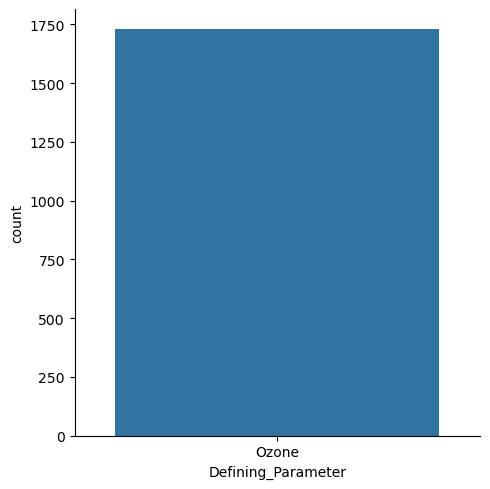

In [51]:
sns.catplot(data = new_df, x='Defining_Parameter' ,kind='count')

plt.show()

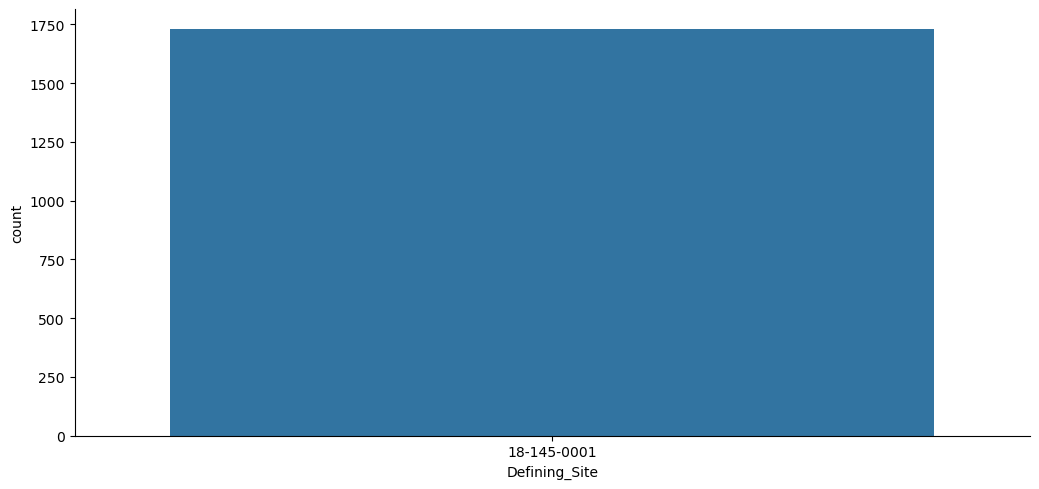

In [52]:
sns.catplot(data = new_df, x='Defining_Site' ,kind='count', height = 5, aspect = 2.1)

plt.show()

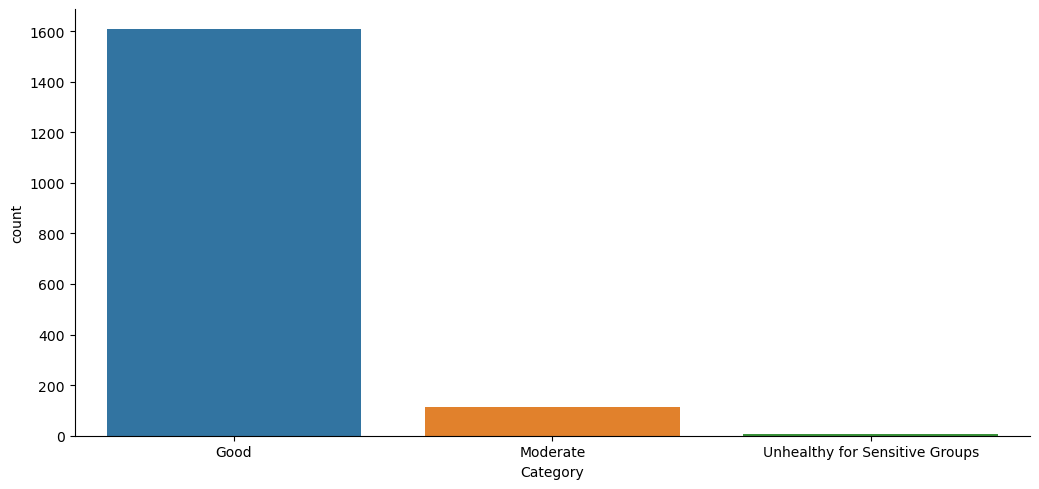

In [53]:
sns.catplot(data = new_df, x='Category' ,kind='count', height = 5, aspect = 2.1)

plt.show()

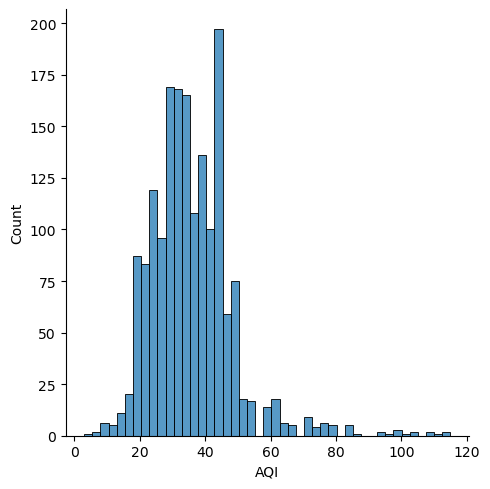

In [54]:
sns.displot(data = new_df, x = 'AQI', kind = 'hist')
plt.show()

In [55]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1729 entries, 95993 to 1359359
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   State_Name                 1729 non-null   object        
 1   county_Name                1729 non-null   object        
 2   State_Code                 1729 non-null   int64         
 3   County_Code                1729 non-null   int64         
 4   Date                       1729 non-null   object        
 5   AQI                        1729 non-null   int64         
 6   Category                   1729 non-null   object        
 7   Defining_Parameter         1729 non-null   object        
 8   Defining_Site              1729 non-null   object        
 9   Number_of_Sites_Reporting  1729 non-null   int64         
 10  date_dt                    1729 non-null   datetime64[ns]
 11  the_year                   1729 non-null   int64         
 12 

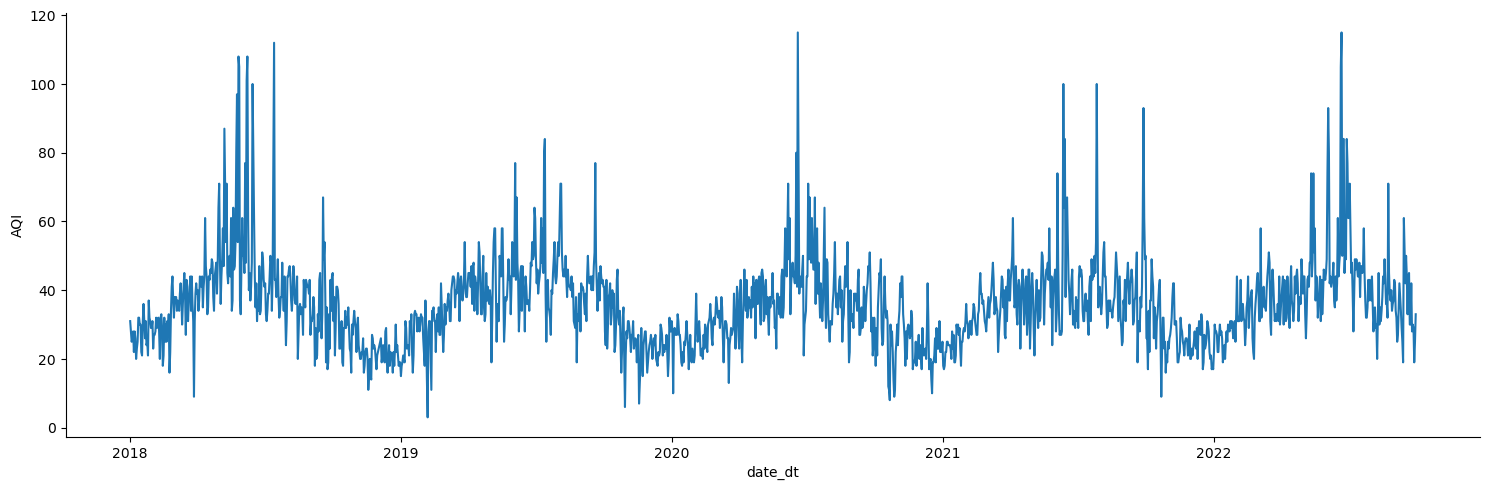

In [56]:
sns.relplot(data = new_df, x='date_dt', y='AQI', kind = 'line', aspect =3 )
plt.show()

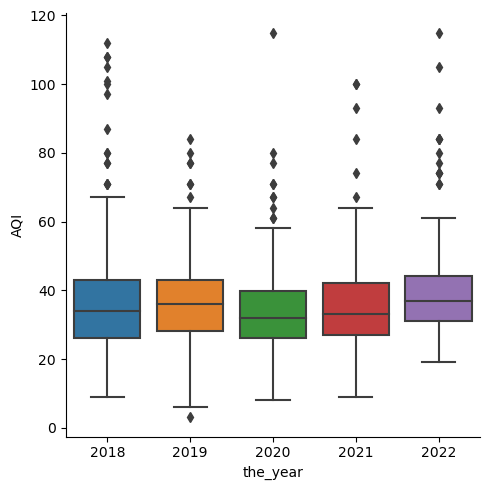

In [57]:
sns.catplot(data = new_df, x = 'the_year', y = 'AQI', kind = 'box')
plt.show()

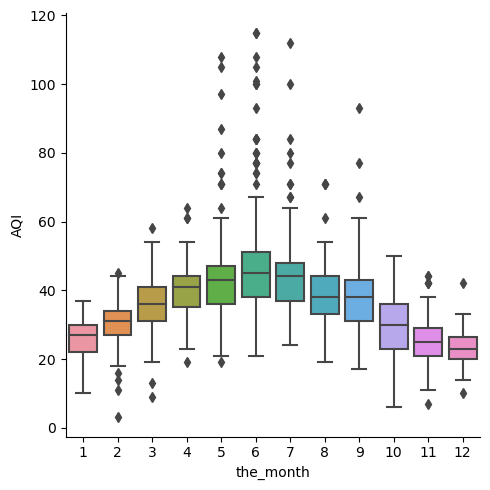

In [58]:
sns.catplot(data = new_df, x = 'the_month', y = 'AQI', kind = 'box')
plt.show()

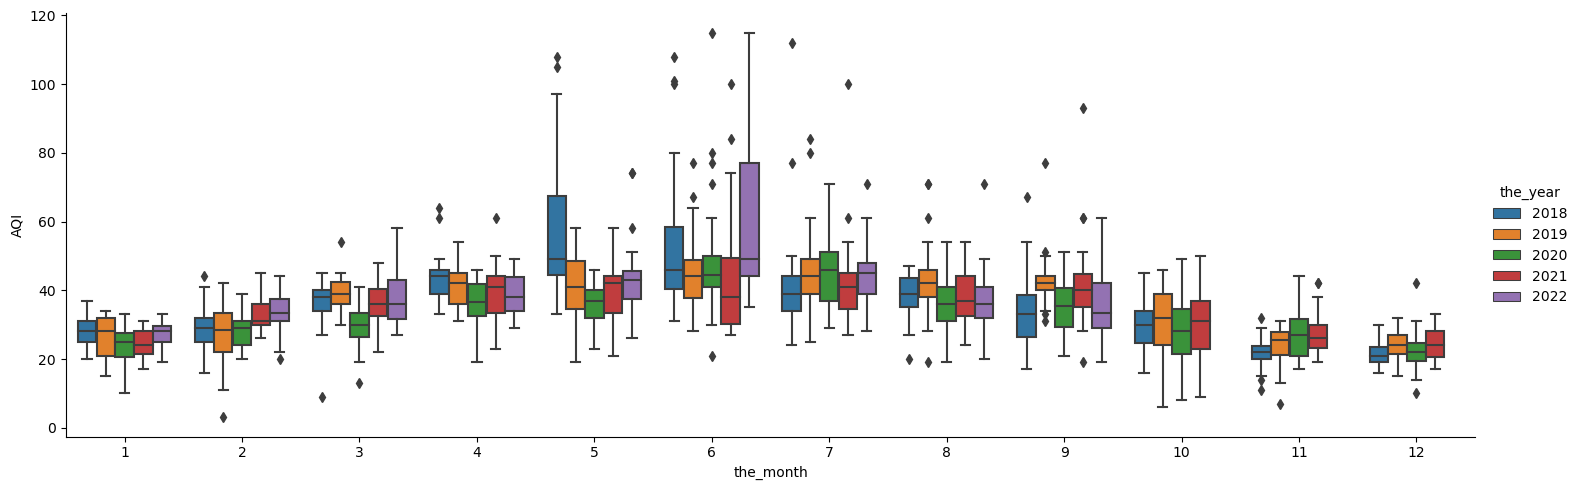

In [59]:
sns.catplot(data = new_df, x = 'the_month', y = 'AQI',hue = 'the_year', kind = 'box', aspect = 3)
plt.show()

In [60]:
new_df['the_week'] = new_df.date_dt.dt.weekofyear

C:\Users\Bhava\AppData\Local\Temp\ipykernel_17624\1202253759.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  new_df['the_week'] = new_df.date_dt.dt.weekofyear


In [61]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1729 entries, 95993 to 1359359
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   State_Name                 1729 non-null   object        
 1   county_Name                1729 non-null   object        
 2   State_Code                 1729 non-null   int64         
 3   County_Code                1729 non-null   int64         
 4   Date                       1729 non-null   object        
 5   AQI                        1729 non-null   int64         
 6   Category                   1729 non-null   object        
 7   Defining_Parameter         1729 non-null   object        
 8   Defining_Site              1729 non-null   object        
 9   Number_of_Sites_Reporting  1729 non-null   int64         
 10  date_dt                    1729 non-null   datetime64[ns]
 11  the_year                   1729 non-null   int64         
 12 

In [62]:
new_counties_by_state = new_df.groupby('State_Name')['county_Name']

In [63]:
new_unique_counties_by_state = new_counties_by_state.nunique()
print(new_unique_counties_by_state)

State_Name
Indiana    1
Name: county_Name, dtype: int64


In [64]:
new_df.the_week.value_counts()

1     35
30    35
22    35
24    35
25    35
26    35
2     35
28    35
29    35
31    35
20    35
32    35
33    35
34    35
35    35
36    35
37    35
38    35
21    35
27    35
19    35
10    35
3     35
18    35
5     35
6     35
7     35
8     35
9     35
4     35
11    35
13    35
14    35
15    35
16    35
17    35
12    35
23    34
39    33
46    28
52    28
51    28
50    28
47    28
42    28
45    28
44    28
43    28
41    28
40    28
48    26
49    26
53     7
Name: the_week, dtype: int64

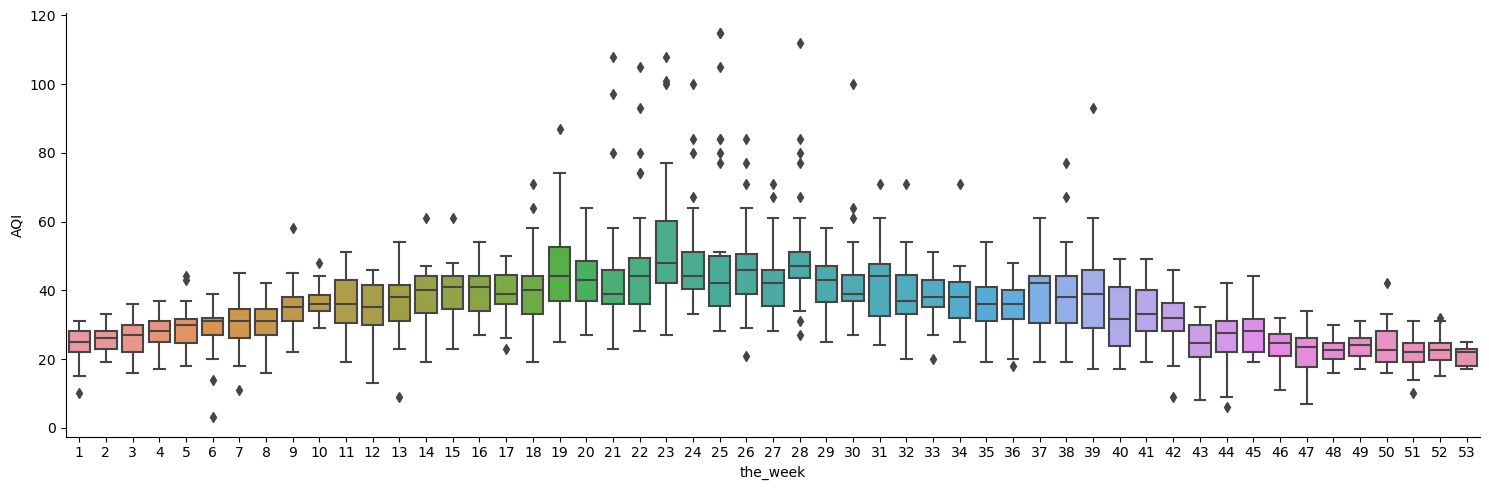

In [65]:
sns.catplot(data = new_df , x ='the_week', y = 'AQI',kind ='box', aspect = 3)
plt.show()

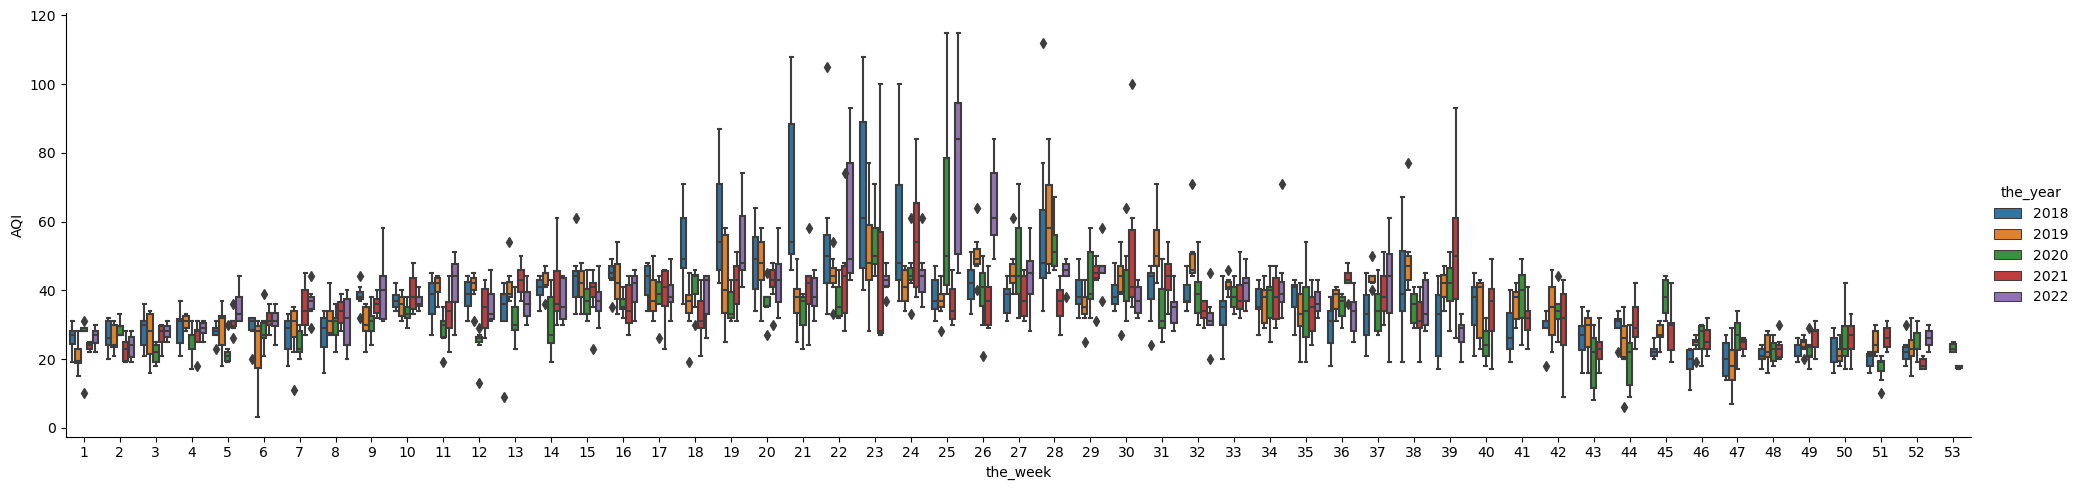

In [66]:
sns.catplot(data = new_df , x ='the_week', y = 'AQI',kind ='box',hue = 'the_year', aspect = 4)
plt.show()

# Time Series Analysis

In [293]:
is_df = new_df[['date_dt', 'AQI','the_year', 'State_County' , 'the_month', 'the_week']].reset_index(drop= True).copy()

In [294]:
is_df

date_dt  AQI  the_year    State_County  the_month  the_week
0    2018-01-01   31      2018  Indiana_Shelby          1         1
1    2018-01-02   28      2018  Indiana_Shelby          1         1
2    2018-01-03   25      2018  Indiana_Shelby          1         1
3    2018-01-04   26      2018  Indiana_Shelby          1         1
4    2018-01-05   28      2018  Indiana_Shelby          1         1
...         ...  ...       ...             ...        ...       ...
1724 2022-09-26   30      2022  Indiana_Shelby          9        39
1725 2022-09-27   29      2022  Indiana_Shelby          9        39
1726 2022-09-28   19      2022  Indiana_Shelby          9        39
1727 2022-09-29   25      2022  Indiana_Shelby          9        39
1728 2022-09-30   33      2022  Indiana_Shelby          9        39

[1729 rows x 6 columns]

In [69]:
is_df['the_month'].value_counts()

1     155
3     155
5     155
7     155
8     155
4     150
9     150
6     149
2     141
10    124
11    120
12    120
Name: the_month, dtype: int64

In [70]:
my_series = is_df.AQI.copy()

In [71]:
print( my_series.index )

RangeIndex(start=0, stop=1729, step=1)


In [72]:
my_series.index = is_df.date_dt

In [73]:
print( my_series.index )

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24',
               '2022-09-25', '2022-09-26', '2022-09-27', '2022-09-28',
               '2022-09-29', '2022-09-30'],
              dtype='datetime64[ns]', name='date_dt', length=1729, freq=None)


## Monthly series Indiana_Shelby

In [74]:
ready_series = my_series.copy().resample('MS').mean()

In [75]:
print( ready_series.index )

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
      

### Visualizations:

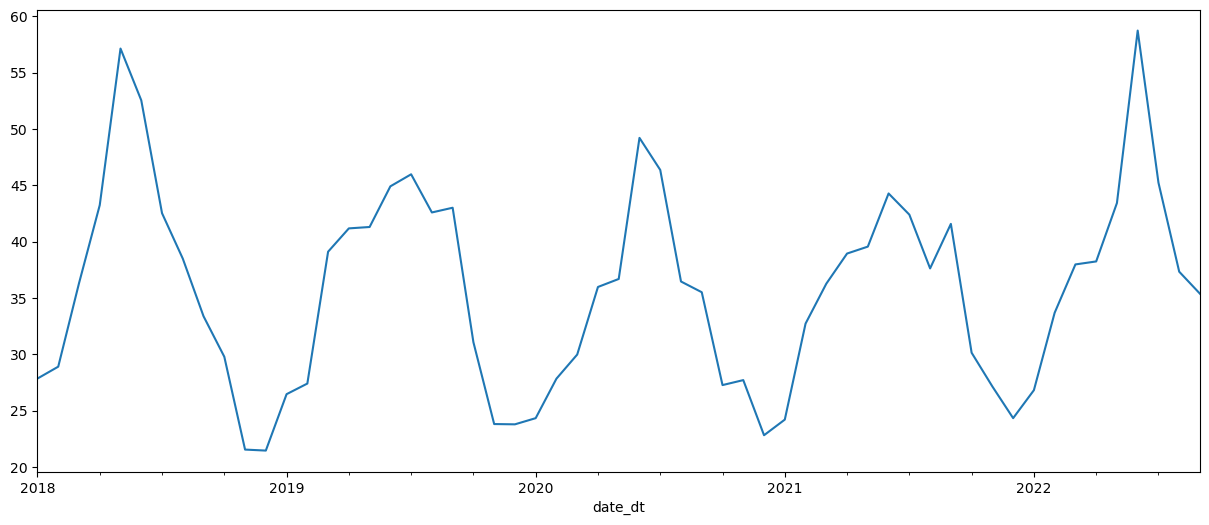

In [76]:
ready_series.plot( figsize=(15, 6) )

plt.show()

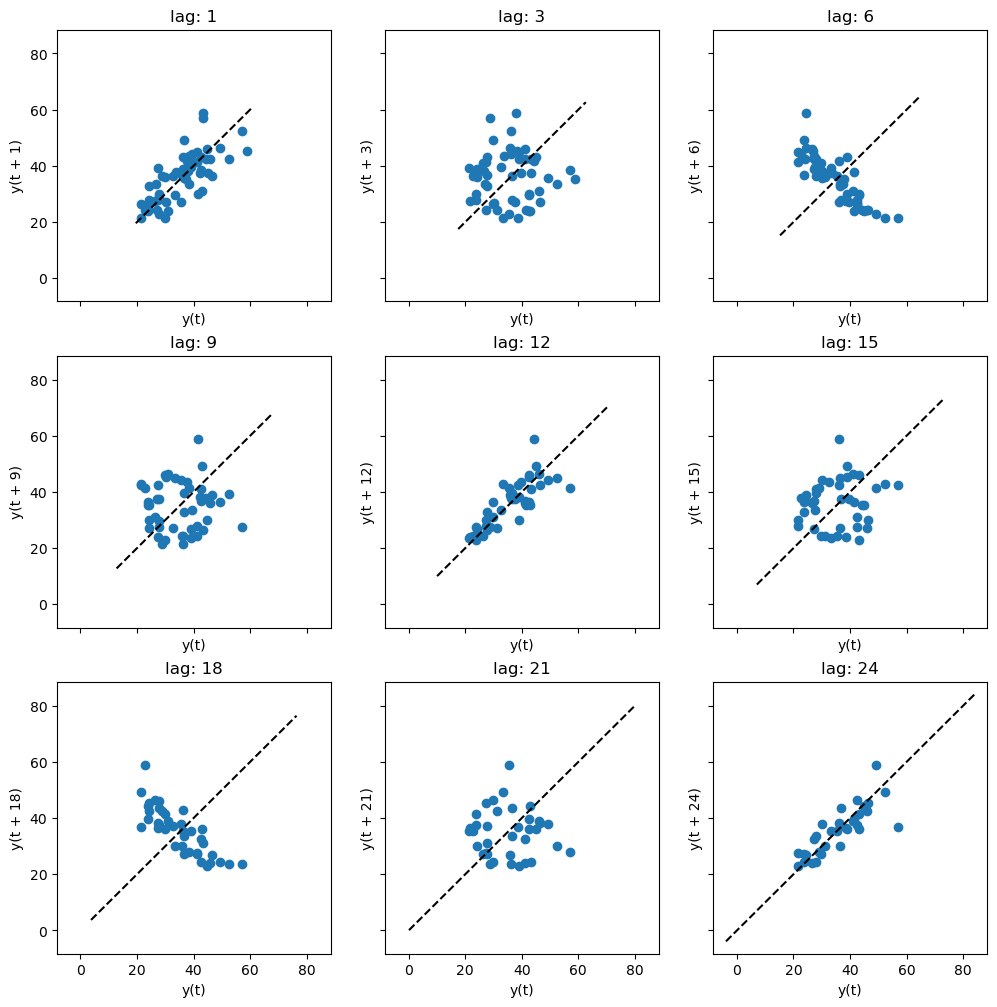

In [77]:
lags_use = [1, 3, 6, 9, 12, 15, 18, 21, 24]

fig, ax = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)

ax = ax.ravel()

for k in range(len(lags_use)):
    pd.plotting.lag_plot( ready_series, lag=lags_use[k], ax=ax[k] )
    ax[k].plot( ax[k].get_xlim(), ax[k].get_ylim(), 'k--')
    ax[k].set_title('lag: ' + str(lags_use[k]) )

plt.show()

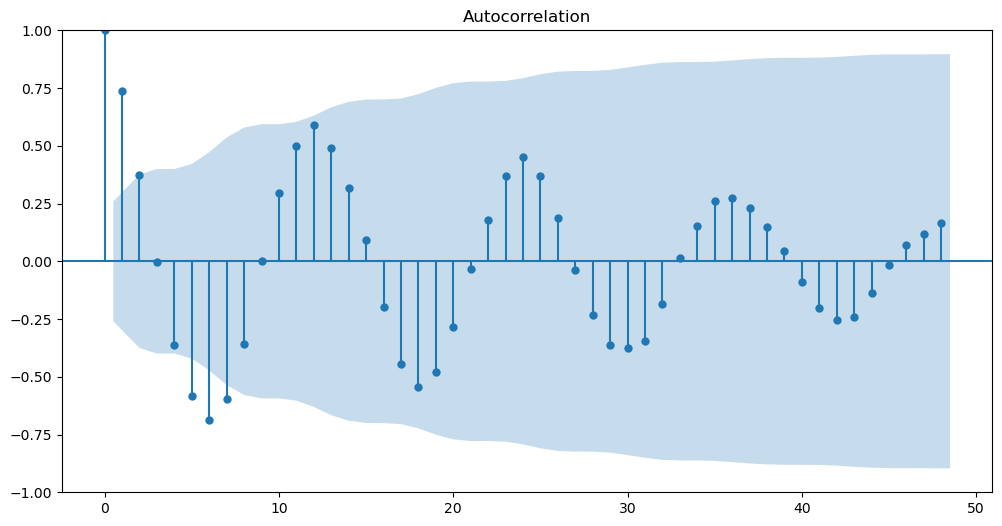

In [78]:
fig, ax = plt.subplots(figsize=(12, 6))

sm.graphics.tsa.plot_acf( ready_series.values.squeeze(), lags=48, ax = ax)

plt.show()


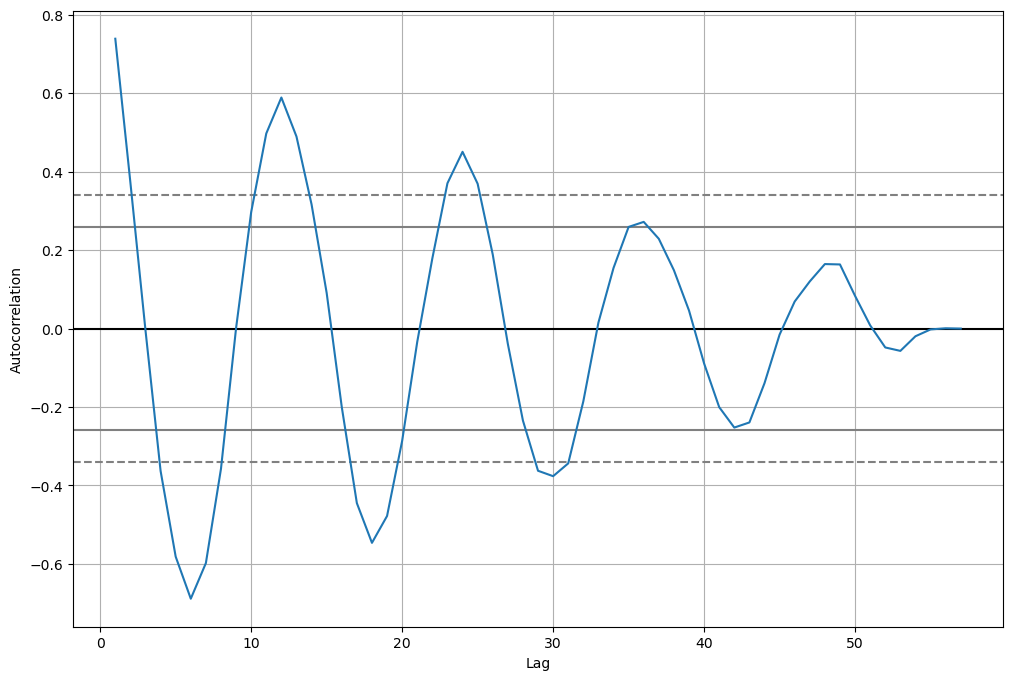

In [79]:
fig, ax = plt.subplots(figsize=(12, 8))

pd.plotting.autocorrelation_plot( ready_series, ax = ax )

plt.show()

### Time series Decomposition

In [80]:
my_decomposition = sm.tsa.seasonal_decompose(ready_series, model='additive')


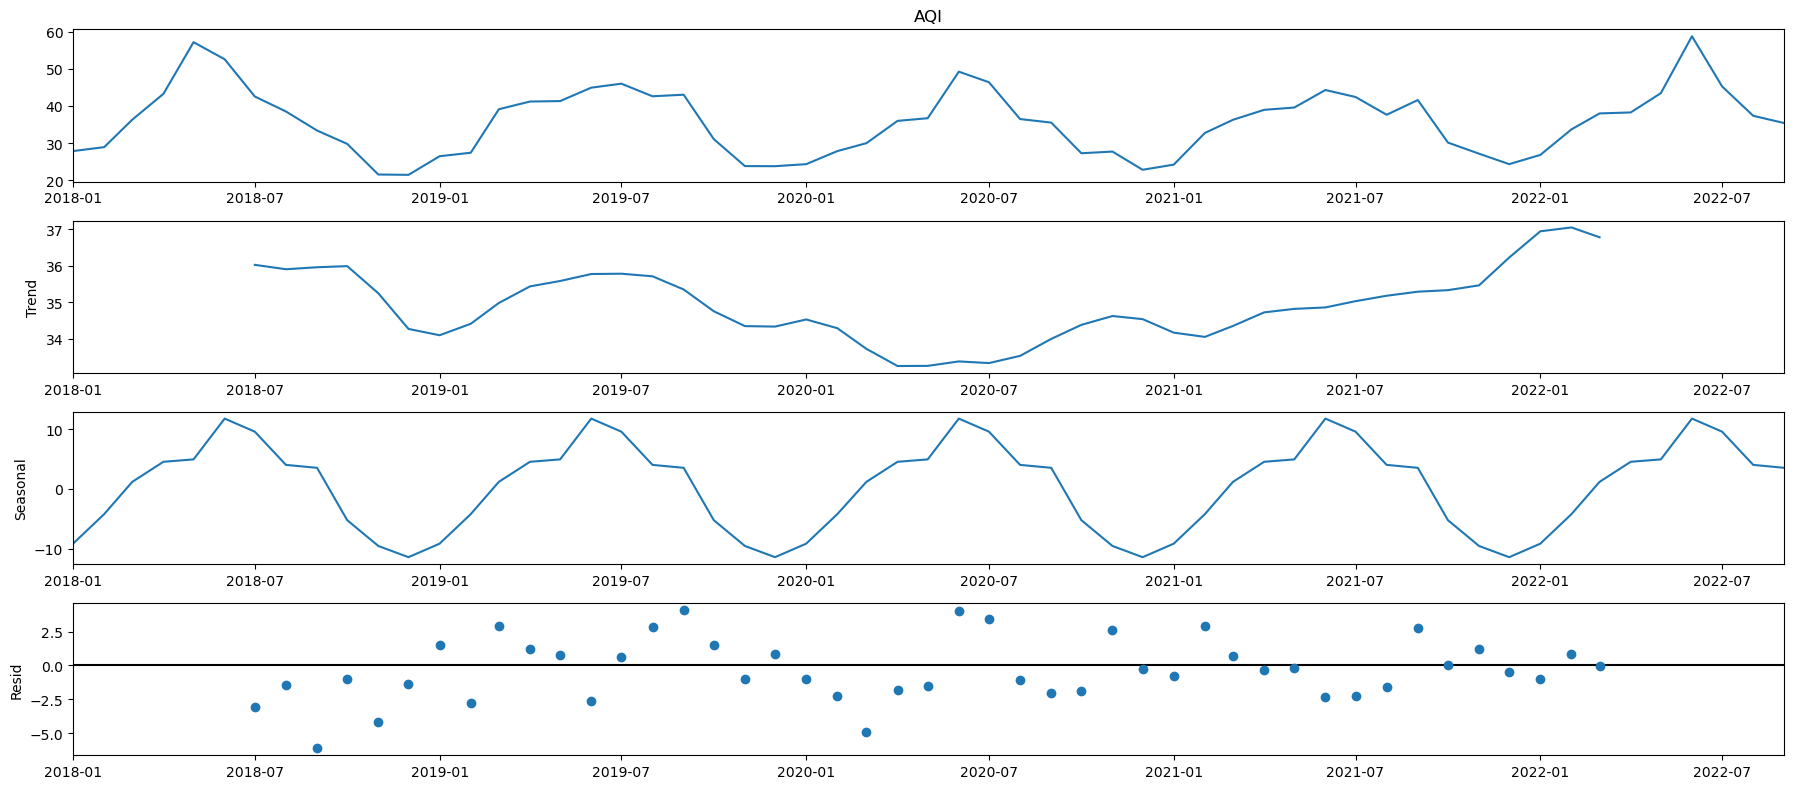

In [81]:
plt.rcParams['figure.figsize'] = 18,8
plt.show()

fig = my_decomposition.plot()

In [82]:
df_decomp = pd.DataFrame({'observed': my_decomposition.observed, 
                          'seasonal_adjusted': my_decomposition.observed - my_decomposition.seasonal},
         
                         index=ready_series.index)
df_decomp

observed  seasonal_adjusted
date_dt                                 
2018-01-01  27.838710          37.004351
2018-02-01  28.892857          33.114851
2018-03-01  36.290323          35.101798
2018-04-01  43.233333          38.688723
2018-05-01  57.129032          52.183974
2018-06-01  52.533333          40.755848
2018-07-01  42.516129          32.927556
2018-08-01  38.483871          34.458590
2018-09-01  33.366667          29.832634
2018-10-01  29.774194          35.007433
2018-11-01  21.533333          31.086465
2018-12-01  21.444444          32.874004
2019-01-01  26.451613          35.617255
2019-02-01  27.392857          31.614851
2019-03-01  39.096774          37.908249
2019-04-01  41.166667          36.622057
2019-05-01  41.290323          36.345264
2019-06-01  44.900000          33.122515
2019-07-01  45.967742          36.379169
2019-08-01  42.580645          38.555364
2019-09-01  43.000000          39.465968
2019-10-01  31.064516          36.297755
2019-11-01  23.800000          33.353132
2019-12-01  23.774194          35.203753
2020-01-01  24.322581          33.488222
2020-02-01  27.827586          32.049580
2020-03-01  29.967742          28.779217
2020-04-01  35.966667          31.422057
2020-05-01  36.677419          31.732361
2020-06-01  49.200000          37.422515
2020-07-01  46.354839          36.766265
2020-08-01  36.451613          32.426332
2020-09-01  35.500000          31.965968
2020-10-01  27.258065          32.491304
2020-11-01  27.700000          37.253132
2020-12-01  22.806452          34.236011
2021-01-01  24.193548          33.359190
2021-02-01  32.714286          36.936280
2021-03-01  36.258065          35.069540
2021-04-01  38.933333          34.388723
2021-05-01  39.548387          34.603329
2021-06-01  44.266667          32.489181
2021-07-01  42.387097          32.798523
2021-08-01  37.612903          33.587622
2021-09-01  41.566667          38.032634
2021-10-01  30.129032          35.362271
2021-11-01  27.133333          36.686465
2021-12-01  24.322581          35.752140
2022-01-01  26.806452          35.972093
2022-02-01  33.678571          37.900565
2022-03-01  37.967742          36.779217
2022-04-01  38.233333          33.688723
2022-05-01  43.419355          38.474297
2022-06-01  58.724138          46.946652
2022-07-01  45.225806          35.637233
2022-08-01  37.322581          33.297299
2022-09-01  35.366667          31.832634

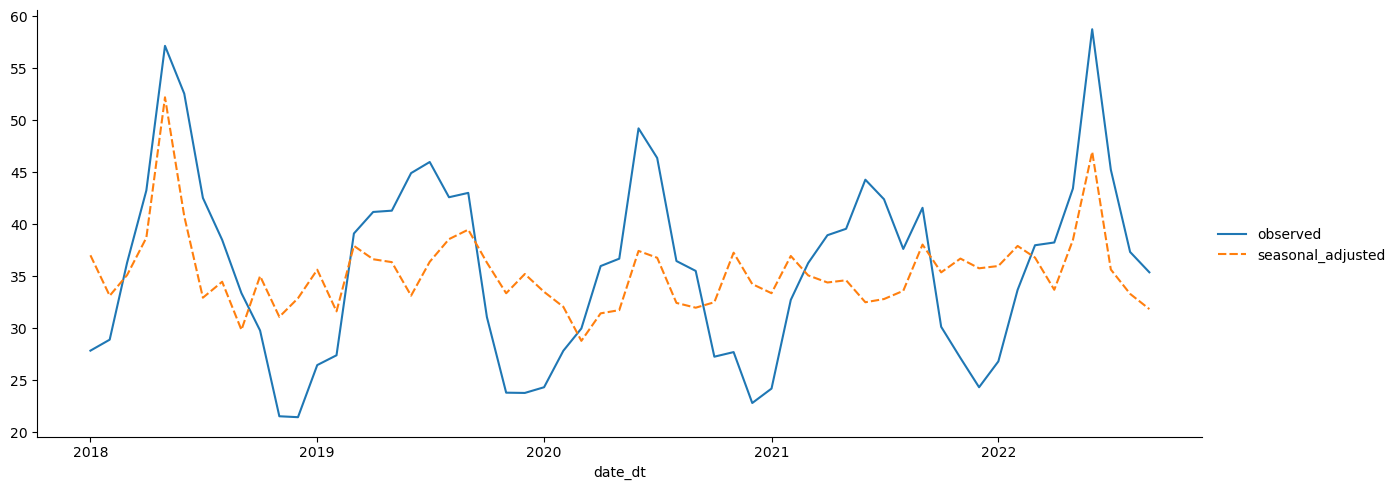

In [83]:
sns.relplot( data = df_decomp, kind='line', aspect=2.5 )

plt.show()

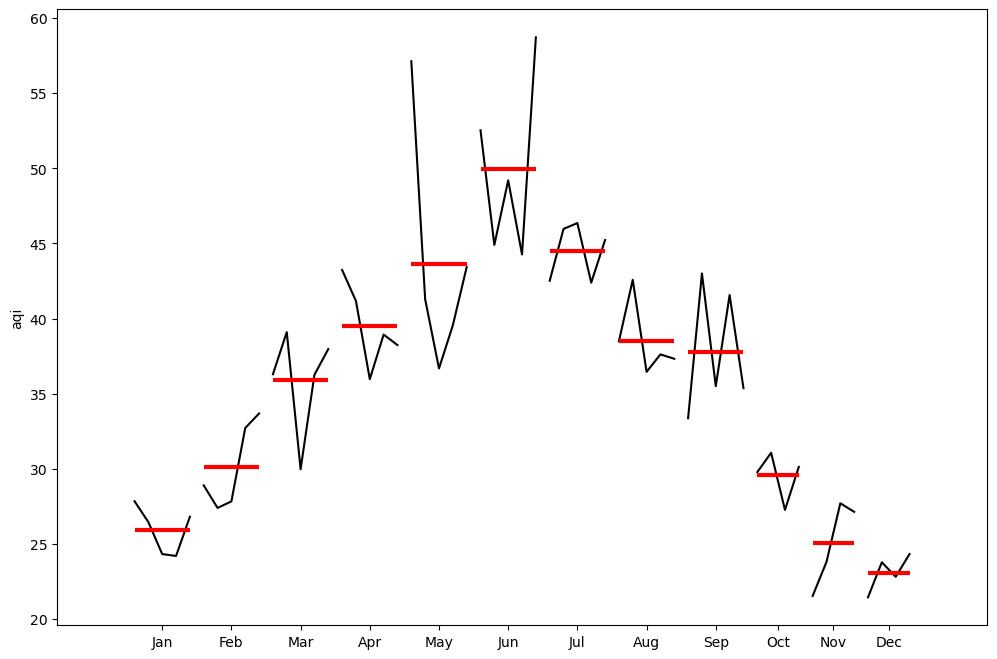

In [84]:
fig, ax = plt.subplots(figsize=(12, 8))

sm.graphics.tsa.month_plot( ready_series, ylabel='aqi', ax=ax )

plt.show()

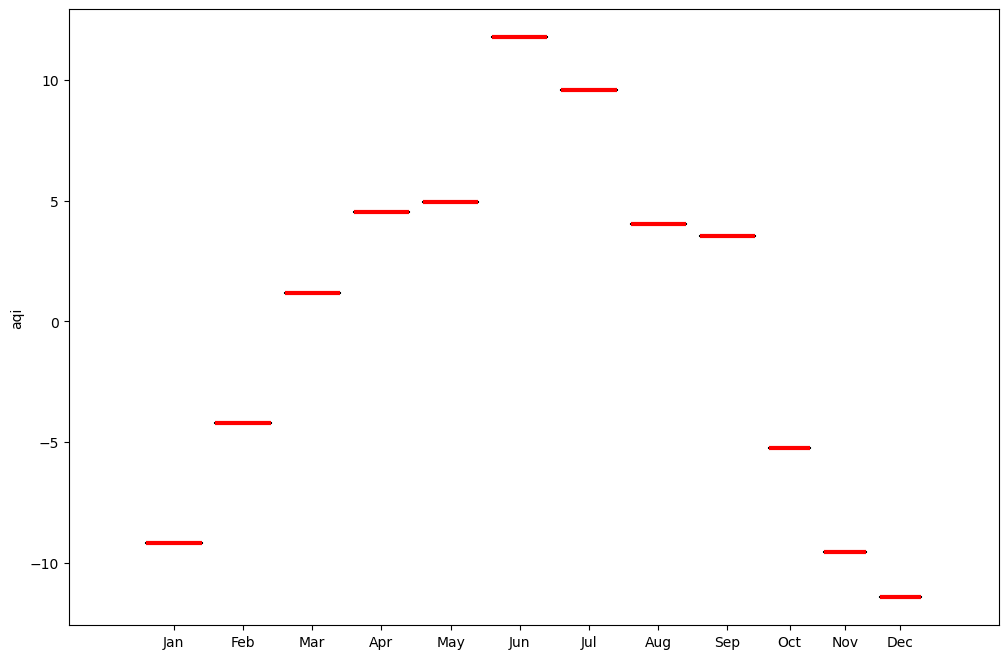

In [85]:
fig, ax = plt.subplots(figsize=(12, 8))

sm.graphics.tsa.month_plot( my_decomposition.seasonal, ylabel='aqi', ax=ax )

plt.show()

In [86]:
from statsmodels.tsa.seasonal import STL


In [87]:
ready_stl = STL( ready_series )


In [88]:
ready_stl_fit = ready_stl.fit()


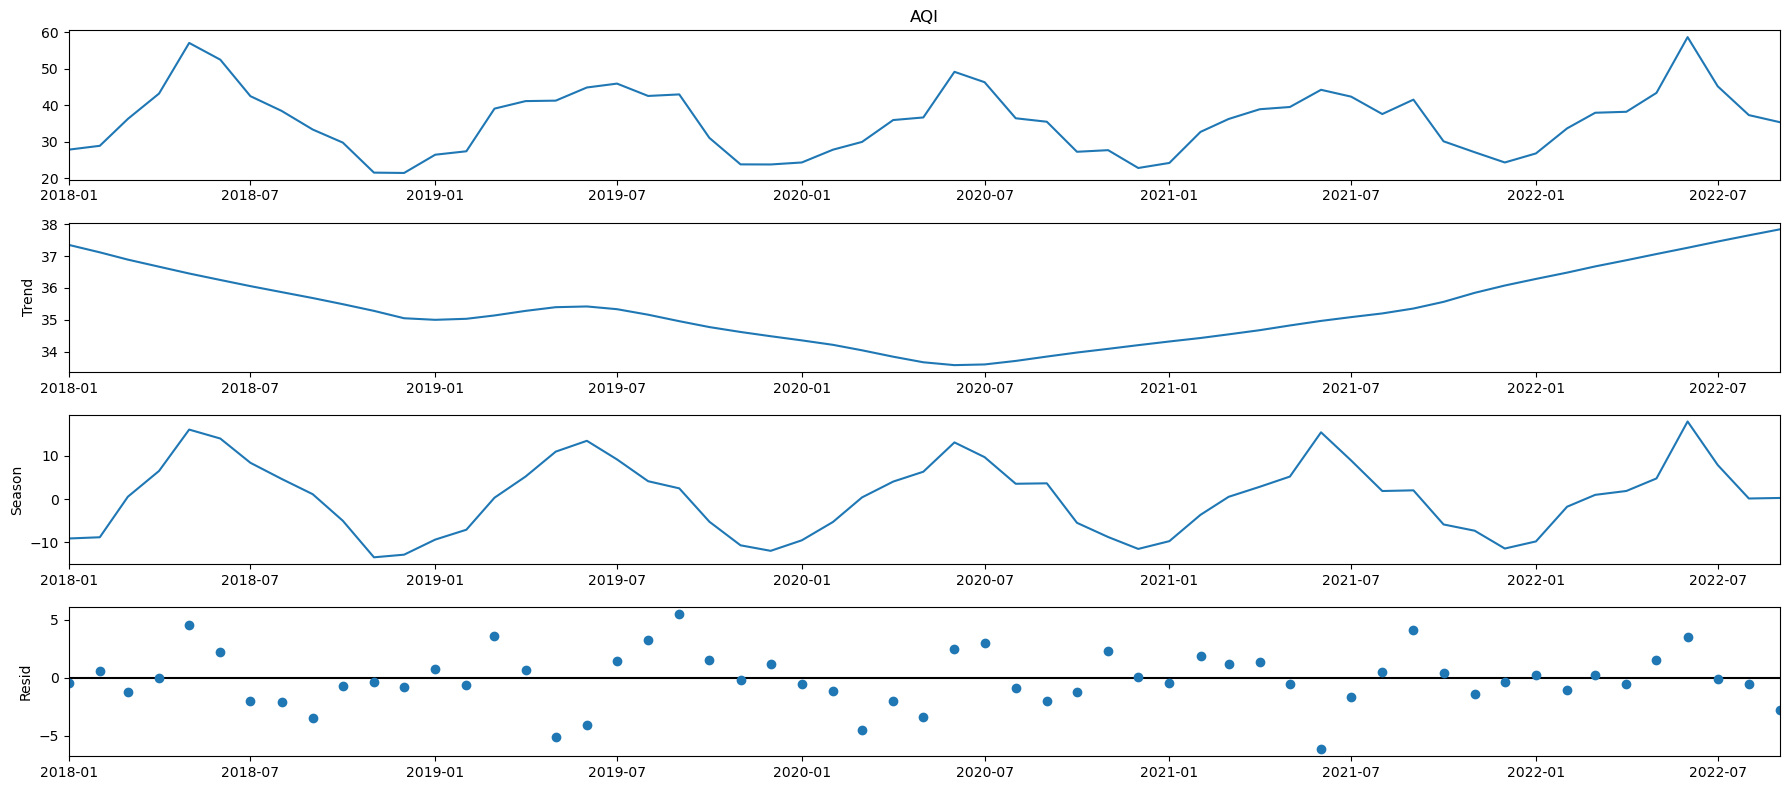

In [89]:
fig = ready_stl_fit.plot()


In [90]:
ready_stl_fit.trend


date_dt
2018-01-01    37.349607
2018-02-01    37.115164
2018-03-01    36.886203
2018-04-01    36.664069
2018-05-01    36.450684
2018-06-01    36.247712
2018-07-01    36.054308
2018-08-01    35.866976
2018-09-01    35.680491
2018-10-01    35.487477
2018-11-01    35.277914
2018-12-01    35.046503
2019-01-01    34.997044
2019-02-01    35.029247
2019-03-01    35.134132
2019-04-01    35.278146
2019-05-01    35.393592
2019-06-01    35.416510
2019-07-01    35.330695
2019-08-01    35.157528
2019-09-01    34.954183
2019-10-01    34.769376
2019-11-01    34.615762
2019-12-01    34.482509
2020-01-01    34.351885
2020-02-01    34.212128
2020-03-01    34.040224
2020-04-01    33.839554
2020-05-01    33.664819
2020-06-01    33.574964
2020-07-01    33.596488
2020-08-01    33.706977
2020-09-01    33.843603
2020-10-01    33.970538
2020-11-01    34.086165
2020-12-01    34.202006
2021-01-01    34.317157
2021-02-01    34.426388
2021-03-01    34.541013
2021-04-01    34.671918
2021-05-01    34.819871
2021-06-

In [91]:
df_stl = pd.DataFrame({'observed': ready_stl_fit.observed, 
                       'seasonal_adjusted': ready_stl_fit.observed - ready_stl_fit.seasonal,
                       'detrend': ready_stl_fit.observed - ready_stl_fit.trend},
                      index=ready_series.index)

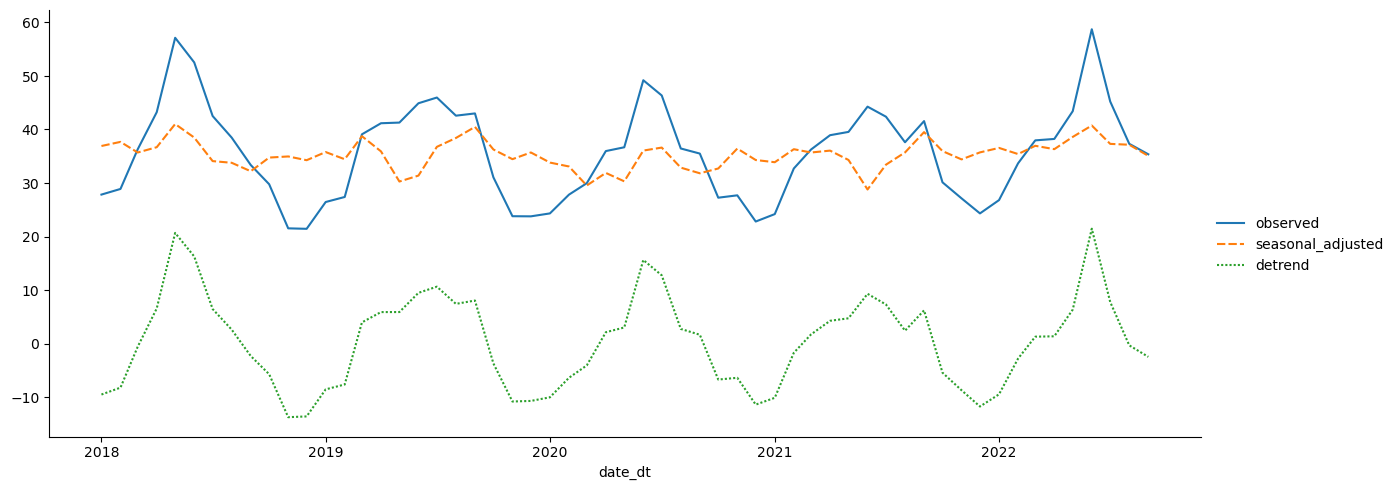

In [92]:
sns.relplot( data = df_stl, kind='line', aspect=2.5 )

plt.show()

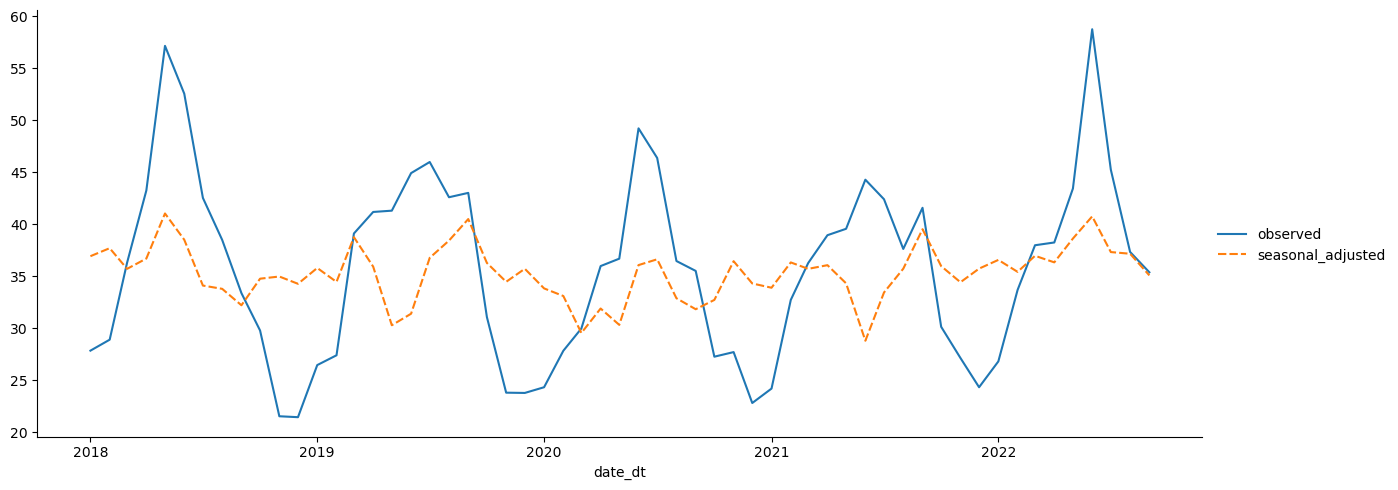

In [93]:
sns.relplot( data = df_stl.loc[:, ['observed', 'seasonal_adjusted']], kind='line', aspect=2.5 )

plt.show()

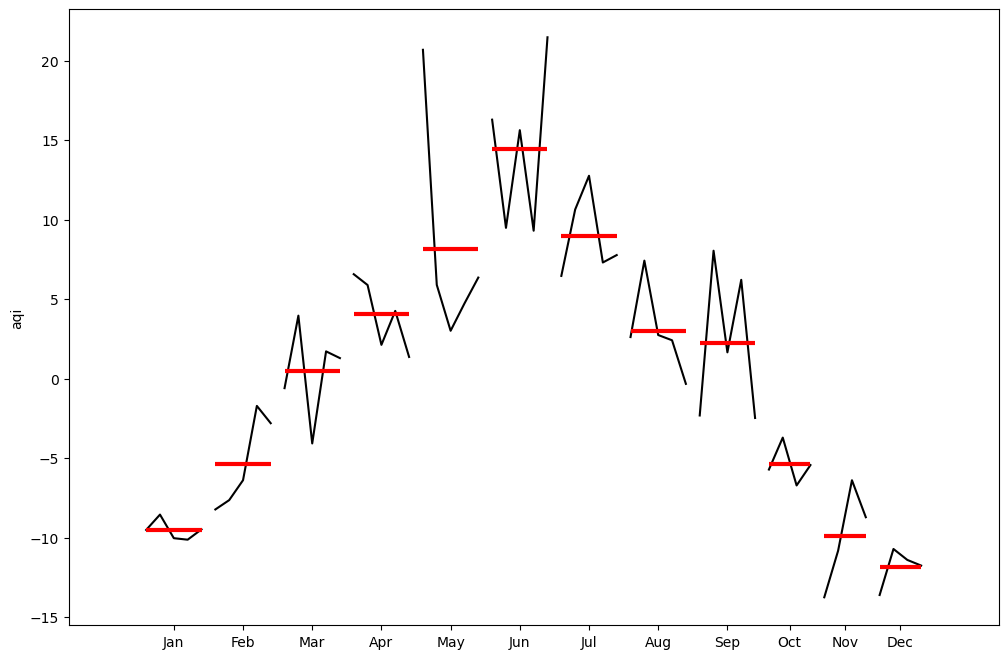

In [94]:
fig, ax = plt.subplots(figsize=(12, 8))

sm.graphics.tsa.month_plot( df_stl.detrend, ylabel='aqi', ax=ax )

plt.show()

In [95]:
df_stl['detrend_smooth'] = ready_stl_fit.observed - (ready_stl_fit.trend + ready_stl_fit.resid)


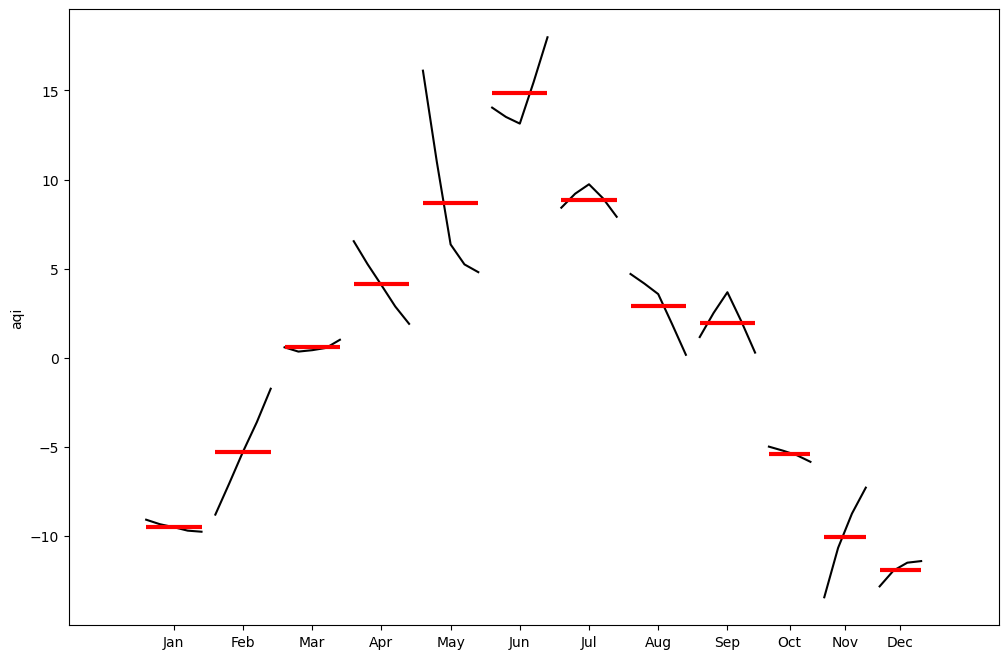

In [96]:
fig, ax = plt.subplots(figsize=(12, 8))

sm.graphics.tsa.month_plot( df_stl.detrend_smooth, ylabel='aqi', ax=ax )

plt.show()

## Weekly Series

In [97]:
weekly_series = my_series.copy().resample('W').mean()

In [98]:
weekly_series

date_dt
2018-01-07    26.857143
2018-01-14    26.857143
2018-01-21    28.142857
2018-01-28    28.714286
2018-02-04    27.714286
                ...    
2022-09-04    36.857143
2022-09-11    32.857143
2022-09-18    41.714286
2022-09-25    36.000000
2022-10-02    27.200000
Freq: W-SUN, Name: AQI, Length: 248, dtype: float64

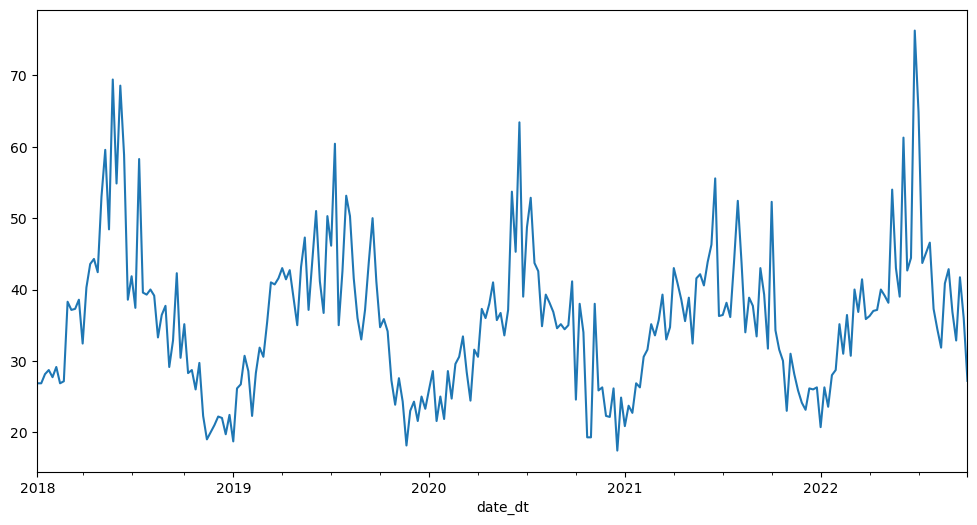

In [99]:
weekly_series.plot( figsize=(12, 6) )

plt.show()

### Weekly Specific Visualization:

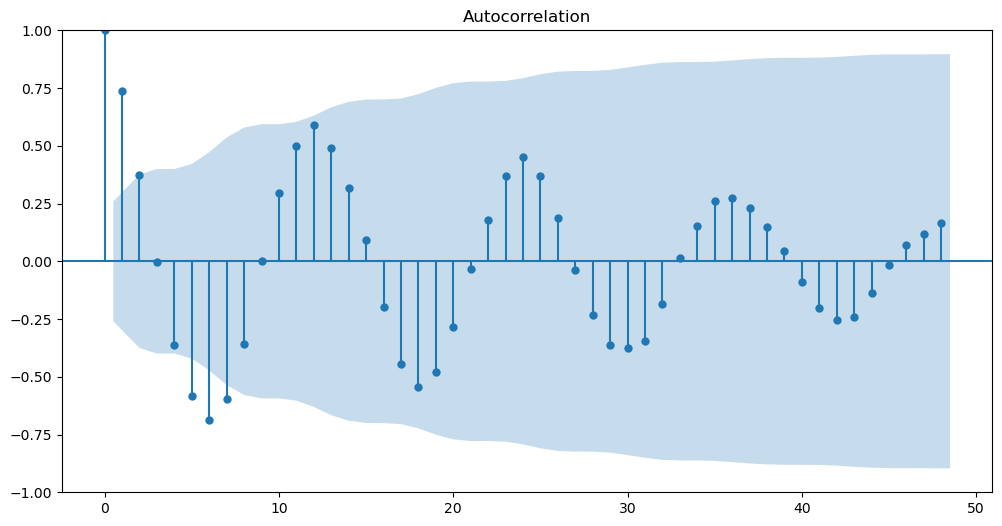

In [100]:
fig, ax = plt.subplots(figsize=(12, 6))

sm.graphics.tsa.plot_acf( ready_series.values.squeeze(), lags=48, ax = ax)

plt.show()


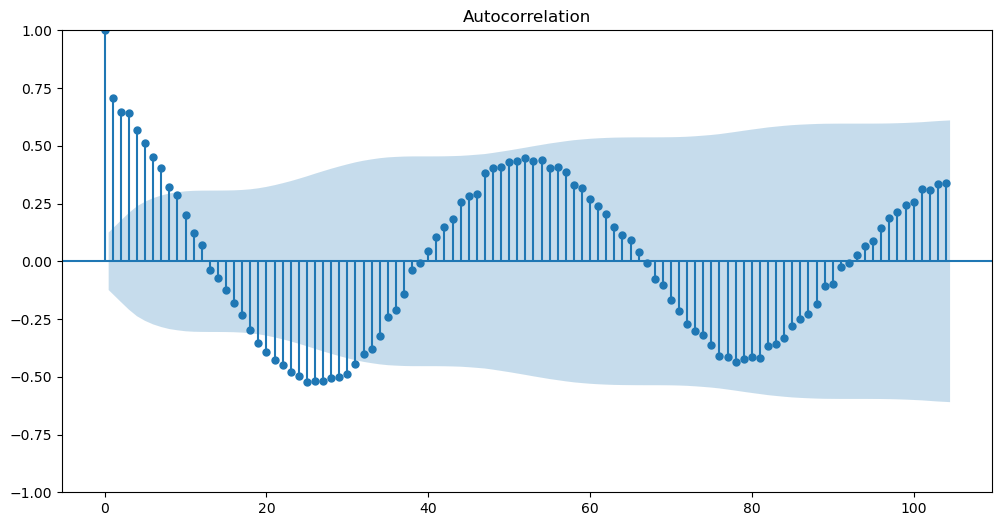

In [101]:
fig, ax = plt.subplots(figsize=(12, 6))

sm.graphics.tsa.plot_acf( weekly_series.values.squeeze(), lags=104, ax = ax)

plt.show()

In [102]:
week_decom_lowa = sm.tsa.seasonal_decompose( weekly_series, model='additive' )


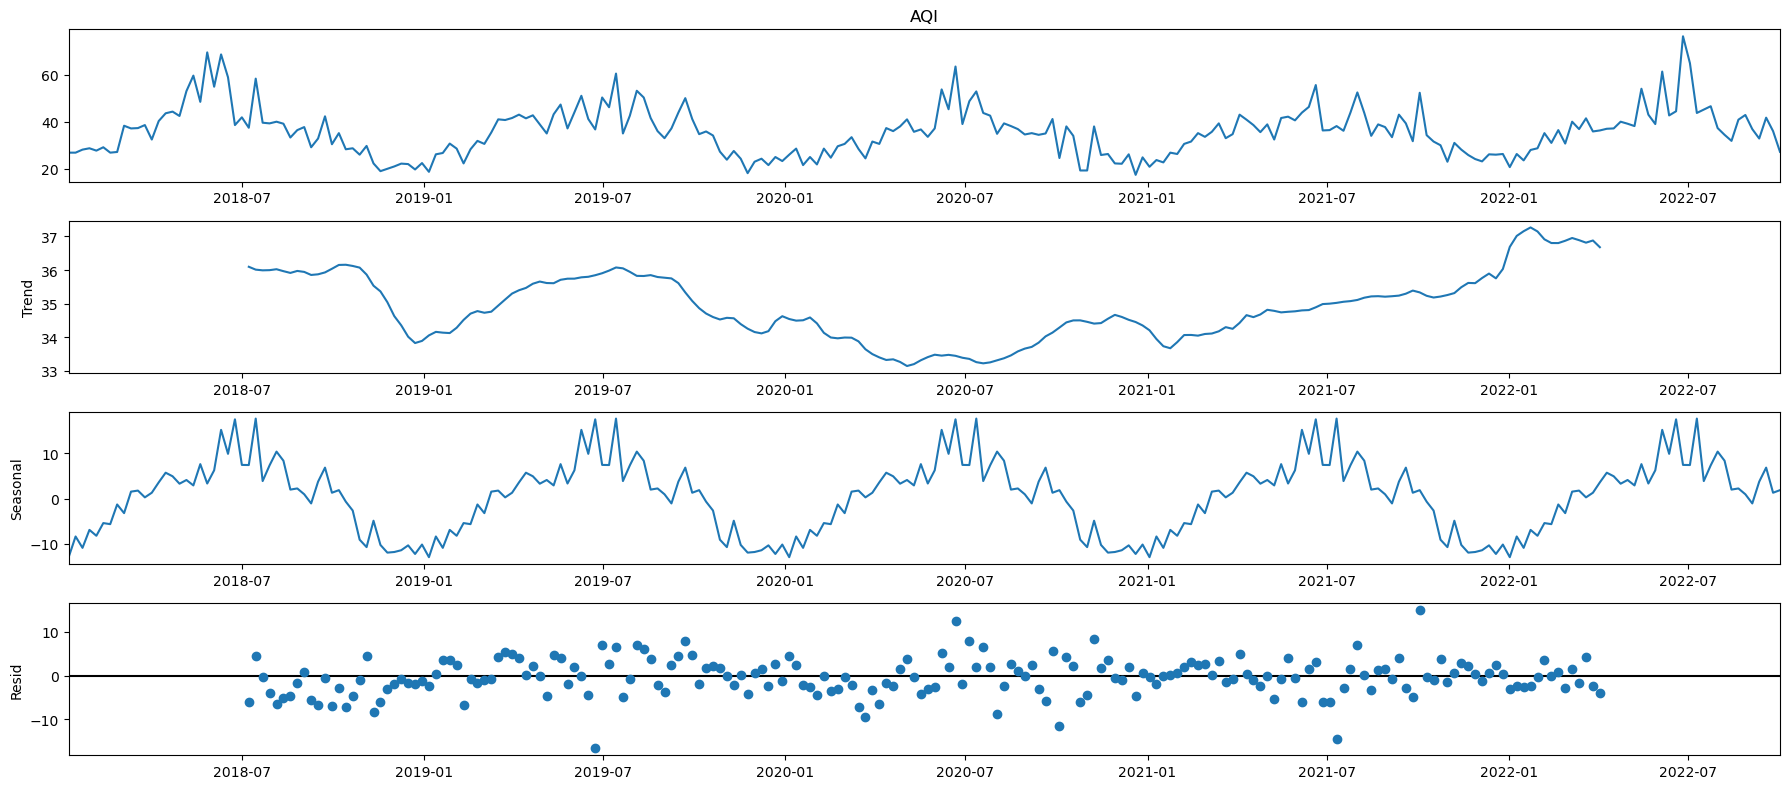

In [103]:
fig = week_decom_lowa.plot()


In [104]:
wk_l_decomp = pd.DataFrame({'observed': week_decom_lowa.observed,
                          'seasonal_adjust': week_decom_lowa.observed - week_decom_lowa.seasonal}, 
                         index=weekly_series.index)

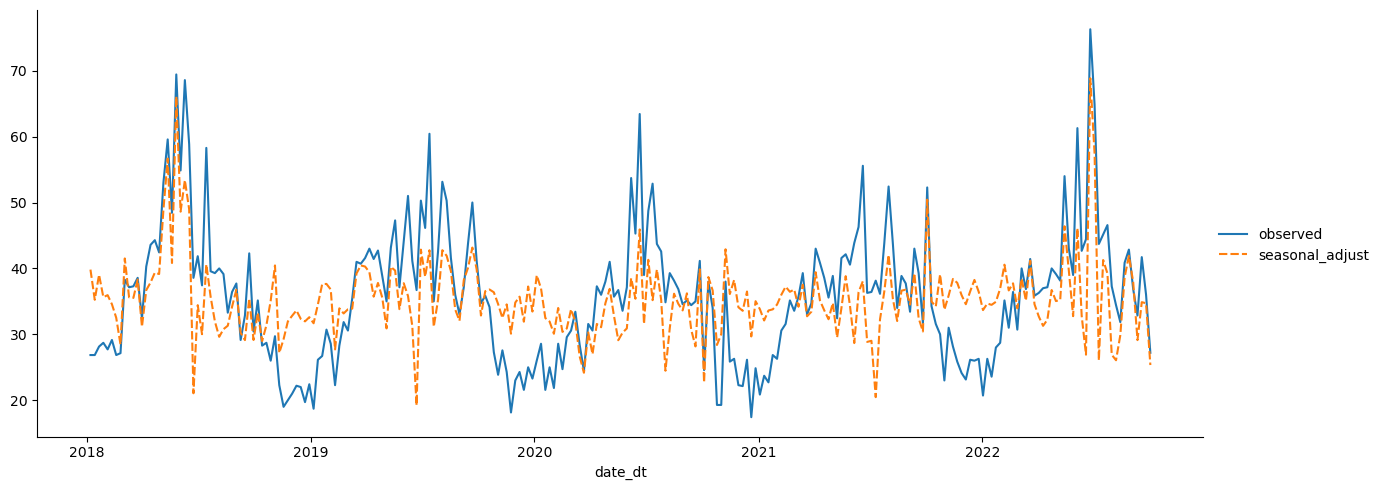

In [105]:
sns.relplot(data = wk_l_decomp, kind='line', aspect= 2.5 )

plt.show()

In [106]:
wk_stl = pd.DataFrame({'observed': week_decom_lowa.observed, 
                       'seasonal_adjusted': week_decom_lowa.observed - week_decom_lowa.seasonal,
                       'detrend': week_decom_lowa.observed - week_decom_lowa.trend},
                      index=weekly_series.index)

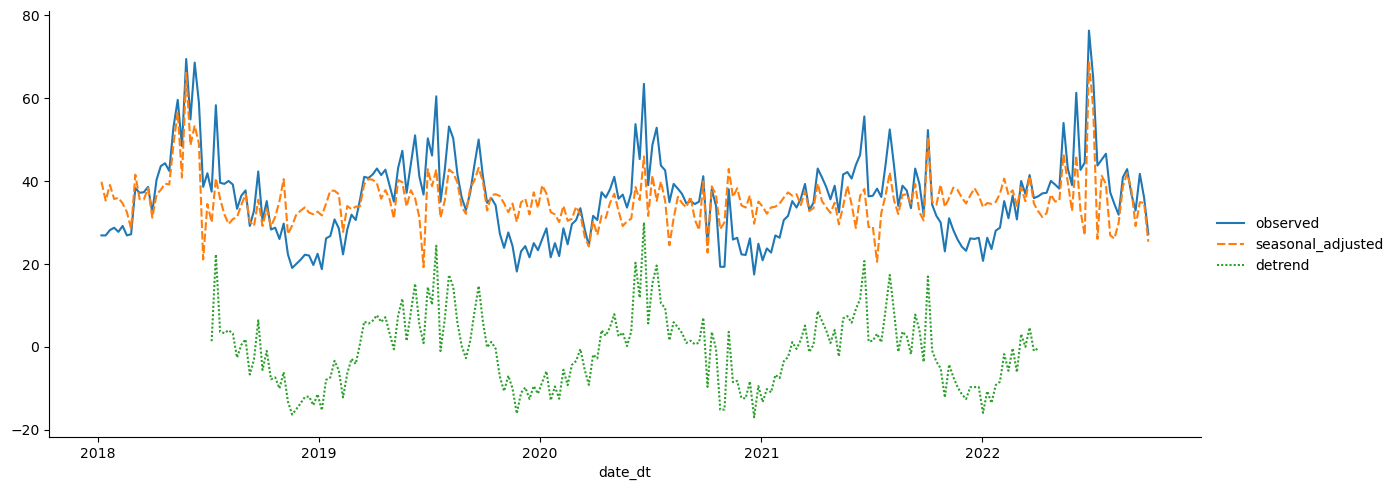

In [107]:
sns.relplot( data = wk_stl, kind='line', aspect=2.5 )

plt.show()

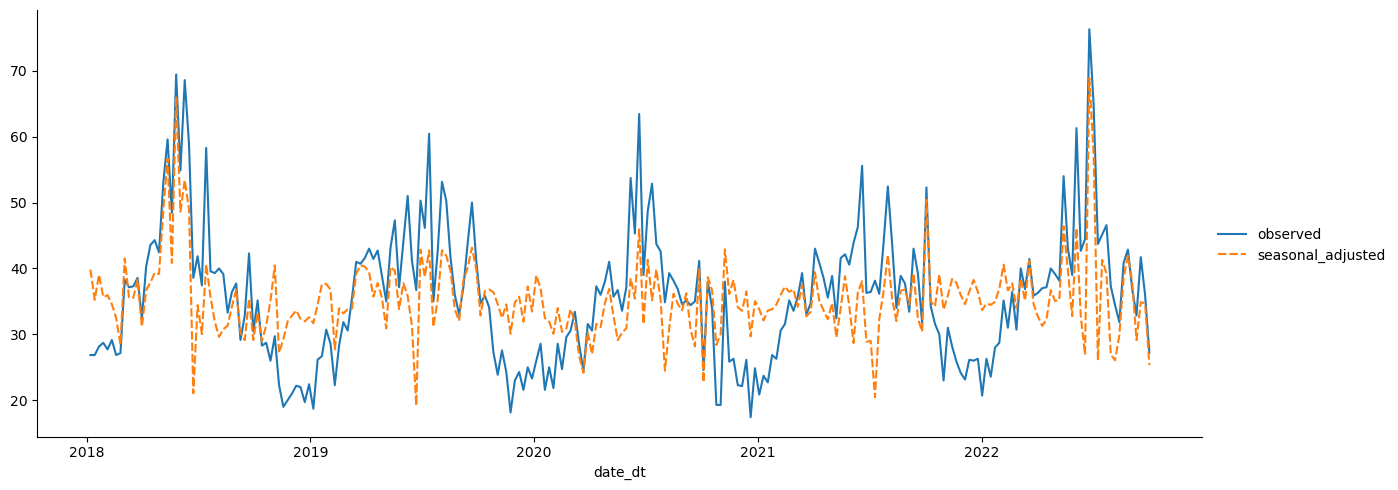

In [108]:
sns.relplot( data = wk_stl.loc[:, ['observed', 'seasonal_adjusted']], kind='line', aspect=2.5 )

plt.show()

## Monthly Time series for Indiana_Brown

In [109]:
ib_df = aqi_all[aqi_all['Defining_Site'] == '18-013-0001'].copy()

In [110]:
ib_df.loc[ ib_df['Defining_Parameter'] == 'Ozone', :].reset_index(drop = True)

State_Name county_Name  State_Code  County_Code       Date  AQI Category  \
0       Indiana       Brown          18           13   1/1/2018   32     Good   
1       Indiana       Brown          18           13   1/2/2018   29     Good   
2       Indiana       Brown          18           13   1/3/2018   30     Good   
3       Indiana       Brown          18           13   1/4/2018   30     Good   
4       Indiana       Brown          18           13   1/5/2018   31     Good   
...         ...         ...         ...          ...        ...  ...      ...   
1714    Indiana       Brown          18           13  9/26/2022   30     Good   
1715    Indiana       Brown          18           13  9/27/2022   31     Good   
1716    Indiana       Brown          18           13  9/28/2022   23     Good   
1717    Indiana       Brown          18           13  9/29/2022   24     Good   
1718    Indiana       Brown          18           13  9/30/2022   31     Good   

     Defining_Parameter Defining_Site  Number_of_Sites_Reporting    date_dt  \
0                 Ozone   18-013-0001                          1 2018-01-01   
1                 Ozone   18-013-0001                          1 2018-01-02   
2                 Ozone   18-013-0001                          1 2018-01-03   
3                 Ozone   18-013-0001                          1 2018-01-04   
4                 Ozone   18-013-0001                          1 2018-01-05   
...                 ...           ...                        ...        ...   
1714              Ozone   18-013-0001                          1 2022-09-26   
1715              Ozone   18-013-0001                          1 2022-09-27   
1716              Ozone   18-013-0001                          1 2022-09-28   
1717              Ozone   18-013-0001                          1 2022-09-29   
1718              Ozone   18-013-0001                          1 2022-09-30   

      the_year  the_month   State_County  
0         2018          1  Indiana_Brown  
1         2018          1  Indiana_Brown  
2         2018          1  Indiana_Brown  
3         2018          1  Indiana_Brown  
4         2018          1  Indiana_Brown  
...        ...        ...            ...  
1714      2022          9  Indiana_Brown  
1715      2022          9  Indiana_Brown  
1716      2022          9  Indiana_Brown  
1717      2022          9  Indiana_Brown  
1718      2022          9  Indiana_Brown  

[1719 rows x 14 columns]

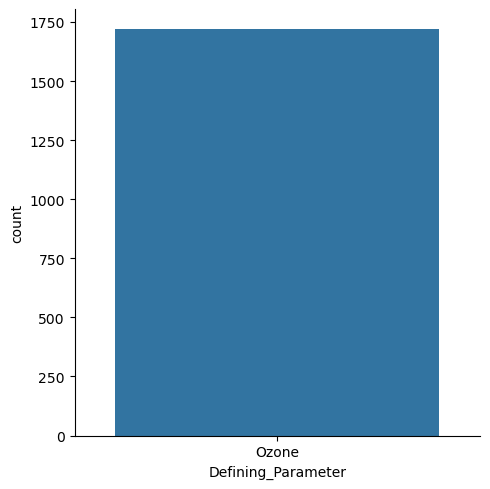

In [111]:
sns.catplot(data = ib_df, x='Defining_Parameter' ,kind='count')

plt.show()

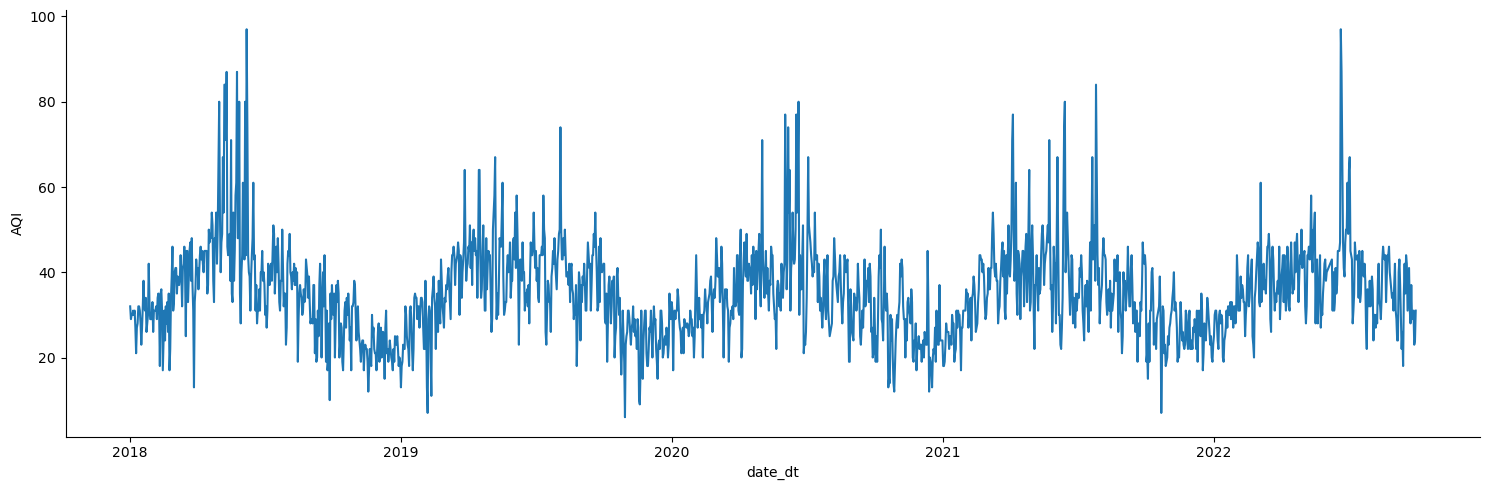

In [112]:
sns.relplot(data = ib_df, x='date_dt', y='AQI', kind = 'line', aspect =3 )
plt.show()

In [113]:
ib_df['the_week'] = ib_df.date_dt.dt.weekofyear

C:\Users\Bhava\AppData\Local\Temp\ipykernel_17624\3043391116.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  ib_df['the_week'] = ib_df.date_dt.dt.weekofyear


In [114]:
ib_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1719 entries, 87865 to 1354550
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   State_Name                 1719 non-null   object        
 1   county_Name                1719 non-null   object        
 2   State_Code                 1719 non-null   int64         
 3   County_Code                1719 non-null   int64         
 4   Date                       1719 non-null   object        
 5   AQI                        1719 non-null   int64         
 6   Category                   1719 non-null   object        
 7   Defining_Parameter         1719 non-null   object        
 8   Defining_Site              1719 non-null   object        
 9   Number_of_Sites_Reporting  1719 non-null   int64         
 10  date_dt                    1719 non-null   datetime64[ns]
 11  the_year                   1719 non-null   int64         
 12 

In [115]:
ind_br_df = ib_df[['date_dt', 'AQI','the_year', 'State_County' , 'the_month', 'the_week']].reset_index(drop= True)

In [116]:
ibr_series = ind_br_df.AQI.copy()

In [117]:
print( ibr_series.index )

RangeIndex(start=0, stop=1719, step=1)


In [118]:
ibr_series.index = ind_br_df.date_dt

In [119]:
print( ibr_series.index )

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24',
               '2022-09-25', '2022-09-26', '2022-09-27', '2022-09-28',
               '2022-09-29', '2022-09-30'],
              dtype='datetime64[ns]', name='date_dt', length=1719, freq=None)


### Resample_Indiana_Brown

In [120]:
ibr_ready_series = ibr_series.copy().resample('MS').mean()

In [121]:
print( ibr_ready_series.index )

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
      

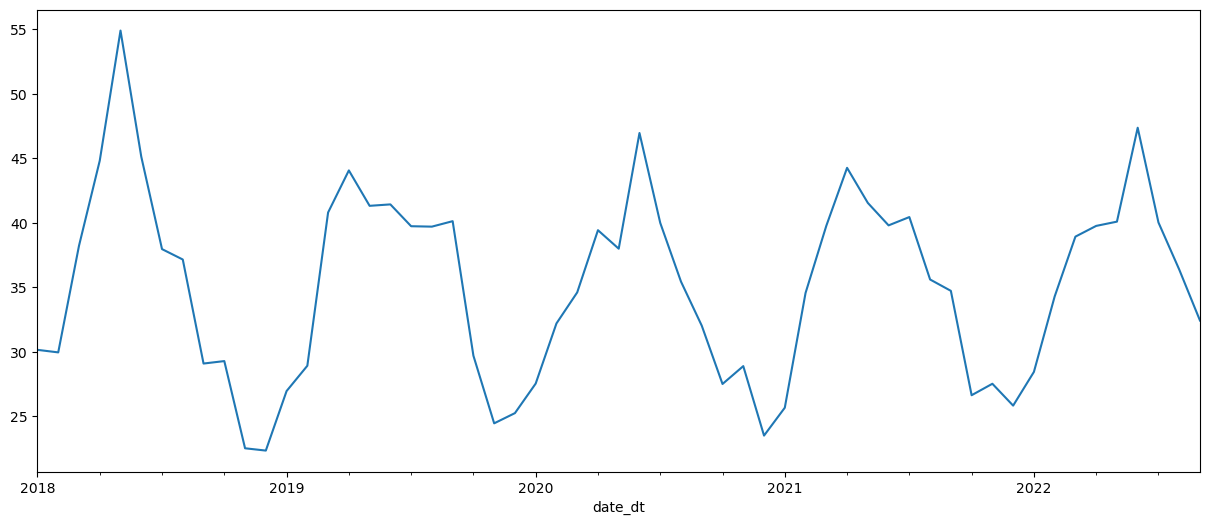

In [122]:
ibr_ready_series.plot( figsize=(15, 6) )

plt.show()

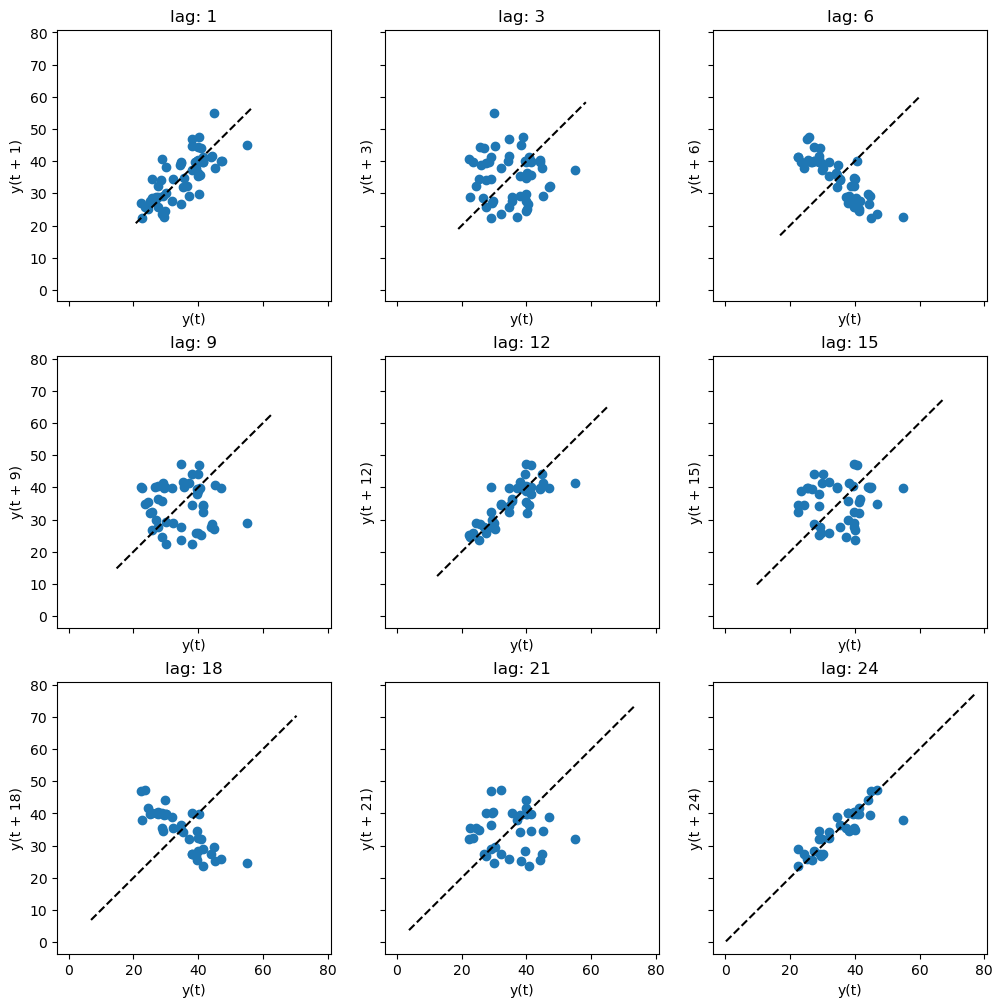

In [123]:
lags_use = [1, 3, 6, 9, 12, 15, 18, 21, 24]

fig, ax = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)

ax = ax.ravel()

for k in range(len(lags_use)):
    pd.plotting.lag_plot( ibr_ready_series, lag=lags_use[k], ax=ax[k] )
    ax[k].plot( ax[k].get_xlim(), ax[k].get_ylim(), 'k--')
    ax[k].set_title('lag: ' + str(lags_use[k]) )

plt.show()

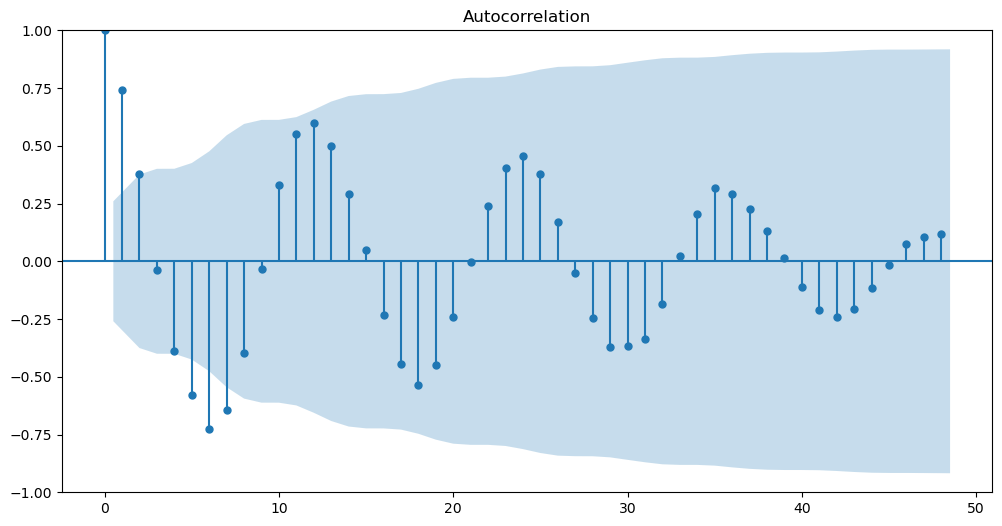

In [124]:
fig, ax = plt.subplots(figsize=(12, 6))

sm.graphics.tsa.plot_acf( ibr_ready_series.values.squeeze(), lags=48, ax = ax)

plt.show()

### Decomposition_Indiana_Brown

In [125]:
ibr_my_decomposition = sm.tsa.seasonal_decompose(ibr_ready_series, model='additive')


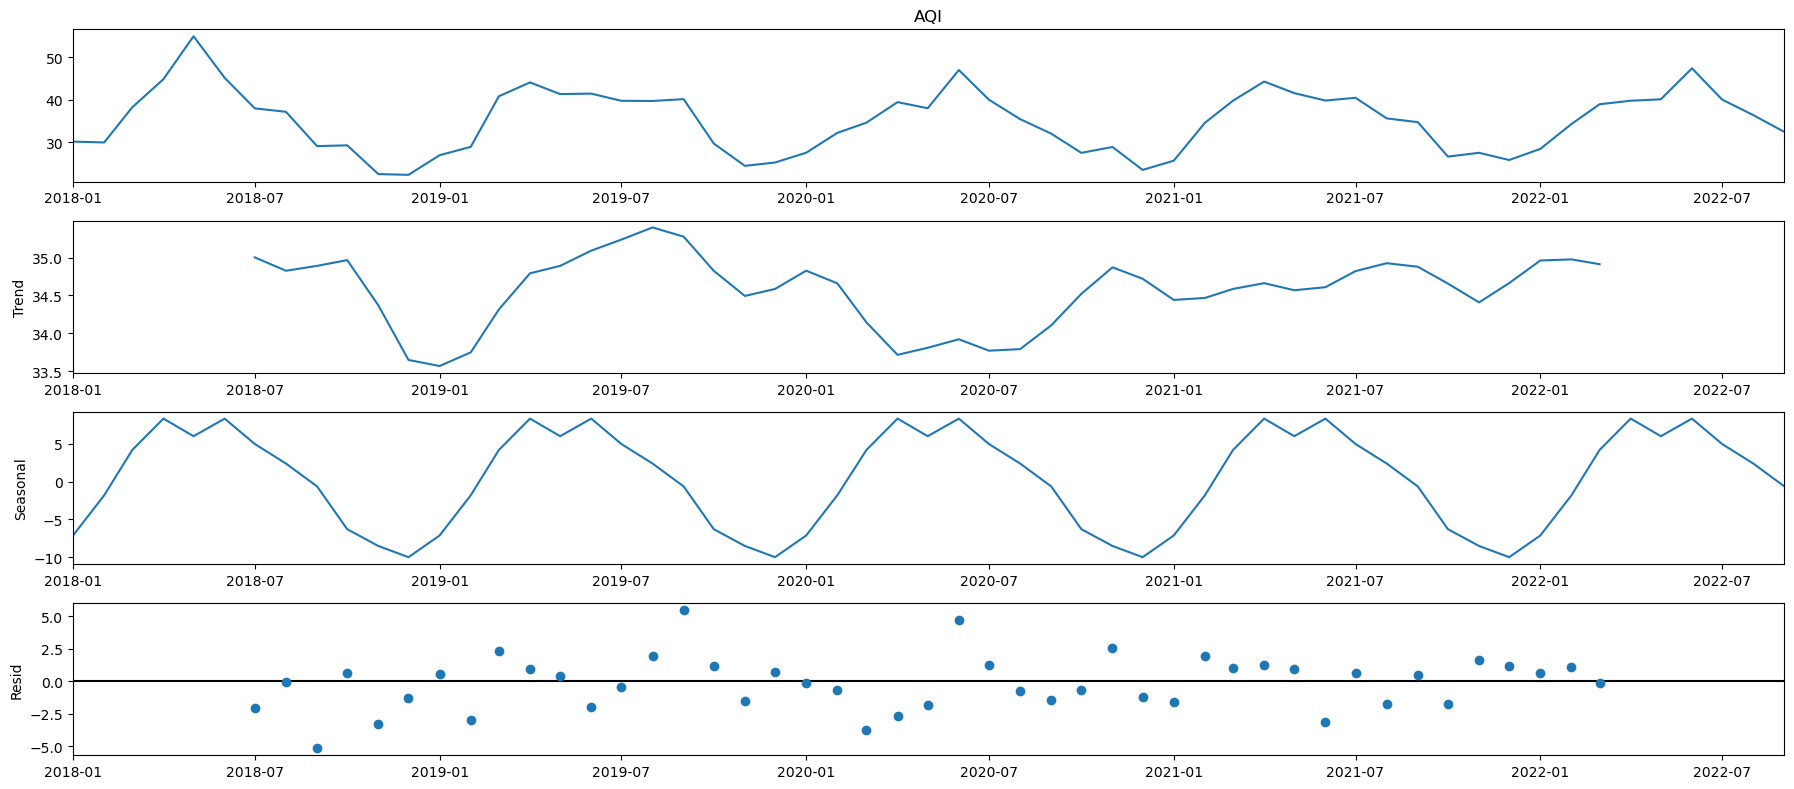

In [126]:
plt.rcParams['figure.figsize'] = 18,8
plt.show()

fig = ibr_my_decomposition.plot()

In [127]:
ibr_df_decomp = pd.DataFrame({'observed': ibr_my_decomposition.observed, 
                          'seasonal_adjusted': ibr_my_decomposition.observed - ibr_my_decomposition.seasonal},
                        index=ibr_ready_series.index)

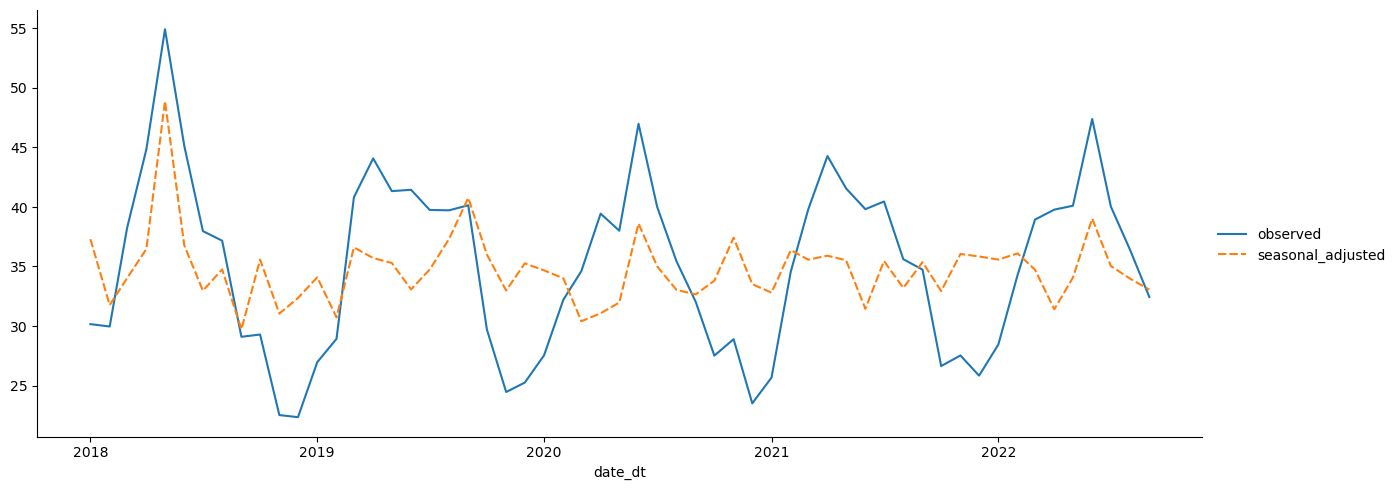

In [128]:
sns.relplot( data = ibr_df_decomp, kind='line', aspect=2.5 )

plt.show()

In [129]:
from statsmodels.tsa.seasonal import STL
ibr_ready_stl = STL( ibr_ready_series )


In [130]:
ibr_ready_stl_fit = ibr_ready_stl.fit()


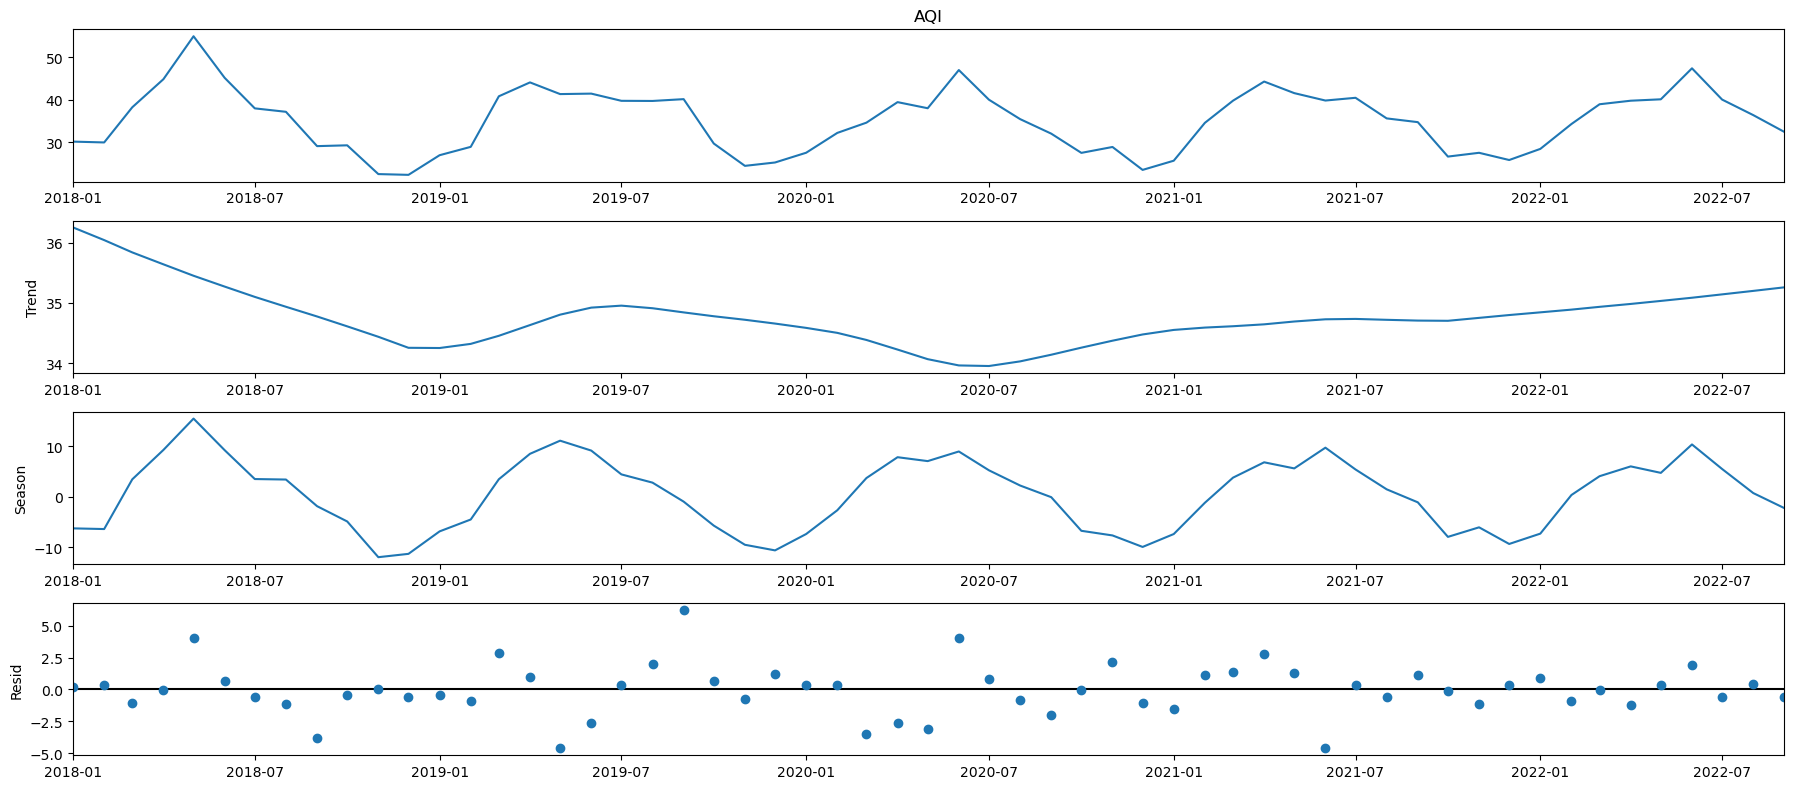

In [131]:
fig = ibr_ready_stl_fit.plot()


In [132]:
ibr_df_stl = pd.DataFrame({'observed': ibr_ready_stl_fit.observed, 
                       'seasonal_adjusted': ibr_ready_stl_fit.observed - ibr_ready_stl_fit.seasonal,
                       'detrend': ibr_ready_stl_fit.observed - ibr_ready_stl_fit.trend},
                      index=ibr_ready_series.index)

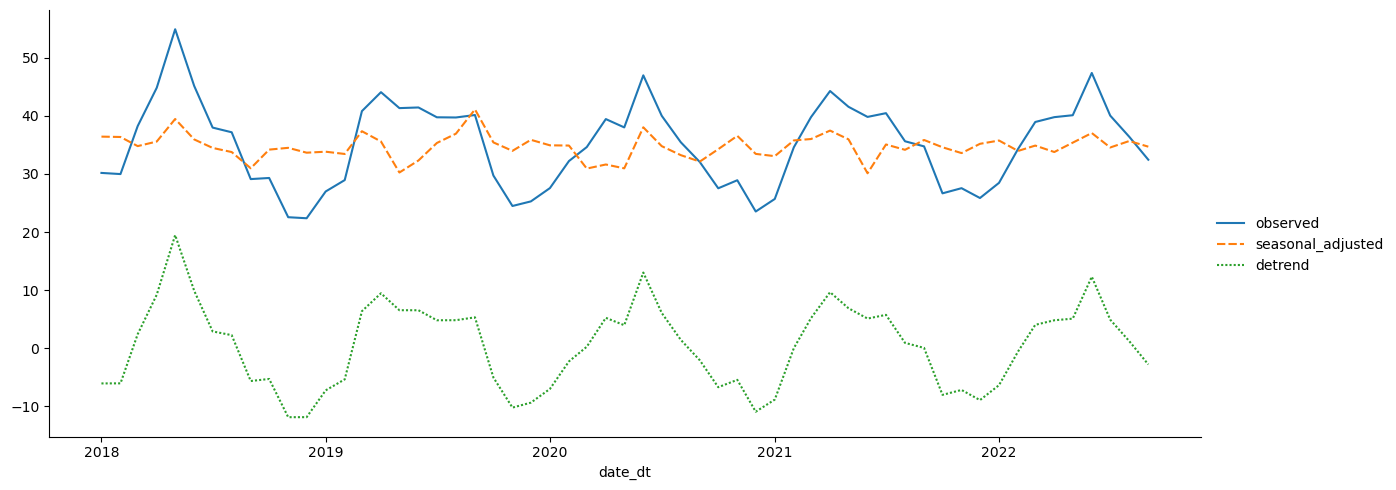

In [133]:
sns.relplot( data = ibr_df_stl, kind='line', aspect=2.5 )

plt.show()

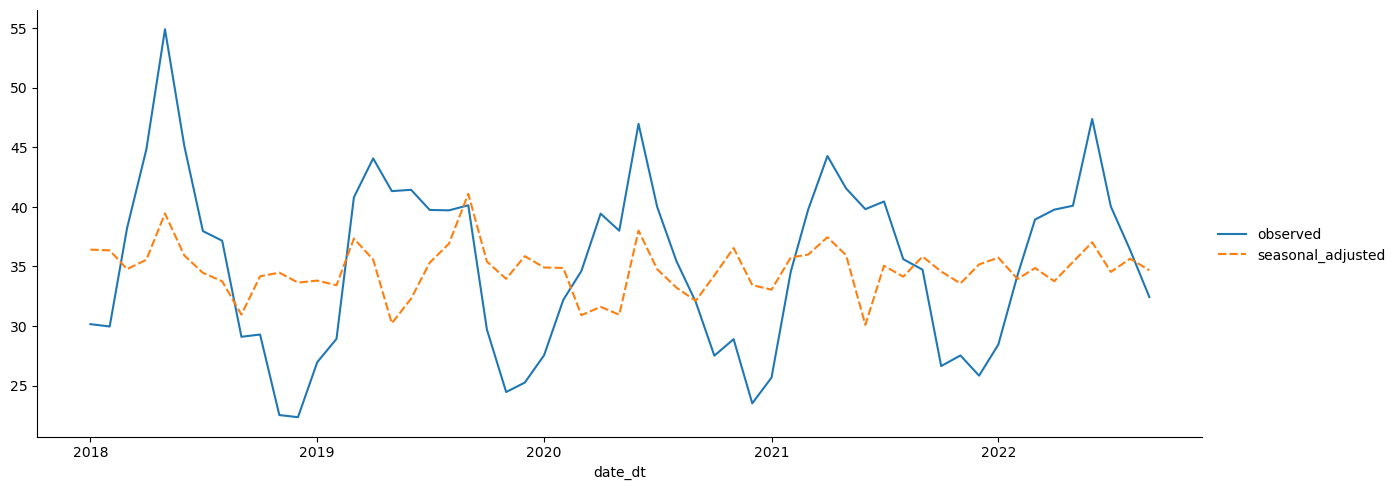

In [134]:
sns.relplot( data = ibr_df_stl.loc[:, ['observed', 'seasonal_adjusted']], kind='line', aspect=2.5 )

plt.show()

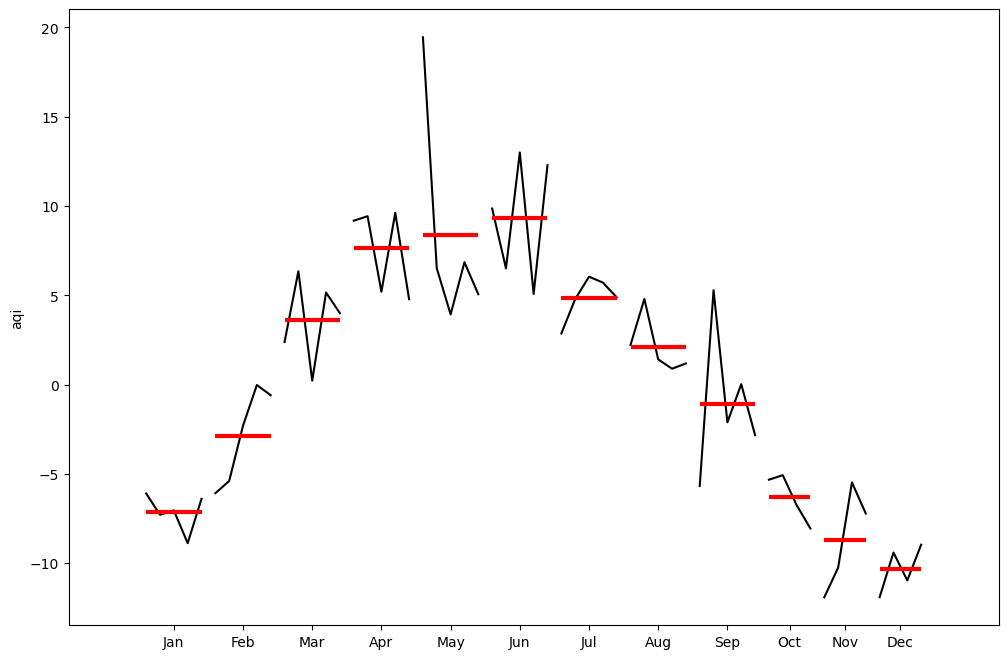

In [135]:
fig, ax = plt.subplots(figsize=(12, 8))

sm.graphics.tsa.month_plot( ibr_df_stl.detrend, ylabel='aqi', ax=ax )

plt.show()

In [136]:
ibr_df_stl['detrend_smooth'] = ibr_ready_stl_fit.observed - (ibr_ready_stl_fit.trend + ibr_ready_stl_fit.resid)


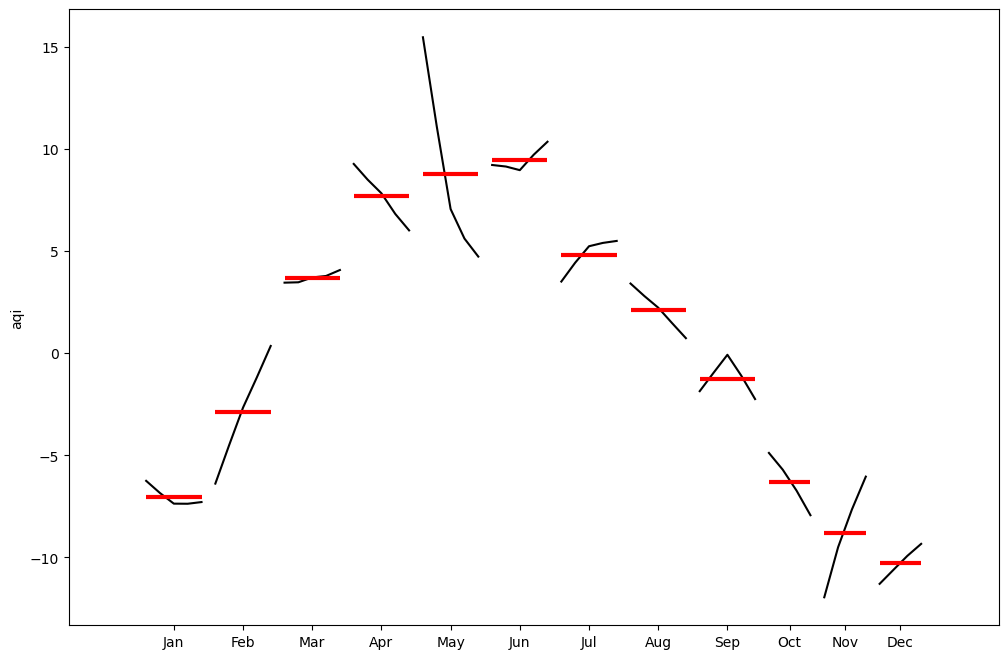

In [137]:
fig, ax = plt.subplots(figsize=(12, 8))

sm.graphics.tsa.month_plot( ibr_df_stl.detrend_smooth, ylabel='aqi', ax=ax )

plt.show()

## Monthly Start Time series Indiana_Carroll

In [138]:
ic_df = aqi_all[aqi_all['Defining_Site'] == '18-015-0002']

In [139]:
ic_df.loc[ ic_df['Defining_Parameter'] == 'Ozone', :].reset_index(drop = True)

State_Name county_Name  State_Code  County_Code       Date  AQI Category  \
0       Indiana     Carroll          18           15   1/1/2018   29     Good   
1       Indiana     Carroll          18           15   1/2/2018   26     Good   
2       Indiana     Carroll          18           15   1/3/2018   29     Good   
3       Indiana     Carroll          18           15   1/4/2018   22     Good   
4       Indiana     Carroll          18           15   1/5/2018   24     Good   
...         ...         ...         ...          ...        ...  ...      ...   
1713    Indiana     Carroll          18           15  9/26/2022   29     Good   
1714    Indiana     Carroll          18           15  9/27/2022   26     Good   
1715    Indiana     Carroll          18           15  9/28/2022   24     Good   
1716    Indiana     Carroll          18           15  9/29/2022   28     Good   
1717    Indiana     Carroll          18           15  9/30/2022   34     Good   

     Defining_Parameter Defining_Site  Number_of_Sites_Reporting    date_dt  \
0                 Ozone   18-015-0002                          1 2018-01-01   
1                 Ozone   18-015-0002                          1 2018-01-02   
2                 Ozone   18-015-0002                          1 2018-01-03   
3                 Ozone   18-015-0002                          1 2018-01-04   
4                 Ozone   18-015-0002                          1 2018-01-05   
...                 ...           ...                        ...        ...   
1713              Ozone   18-015-0002                          1 2022-09-26   
1714              Ozone   18-015-0002                          1 2022-09-27   
1715              Ozone   18-015-0002                          1 2022-09-28   
1716              Ozone   18-015-0002                          1 2022-09-29   
1717              Ozone   18-015-0002                          1 2022-09-30   

      the_year  the_month     State_County  
0         2018          1  Indiana_Carroll  
1         2018          1  Indiana_Carroll  
2         2018          1  Indiana_Carroll  
3         2018          1  Indiana_Carroll  
4         2018          1  Indiana_Carroll  
...        ...        ...              ...  
1713      2022          9  Indiana_Carroll  
1714      2022          9  Indiana_Carroll  
1715      2022          9  Indiana_Carroll  
1716      2022          9  Indiana_Carroll  
1717      2022          9  Indiana_Carroll  

[1718 rows x 14 columns]

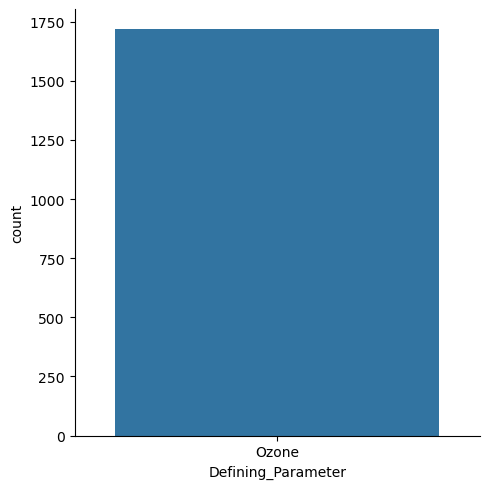

In [140]:
sns.catplot(data = ic_df, x='Defining_Parameter' ,kind='count')

plt.show()

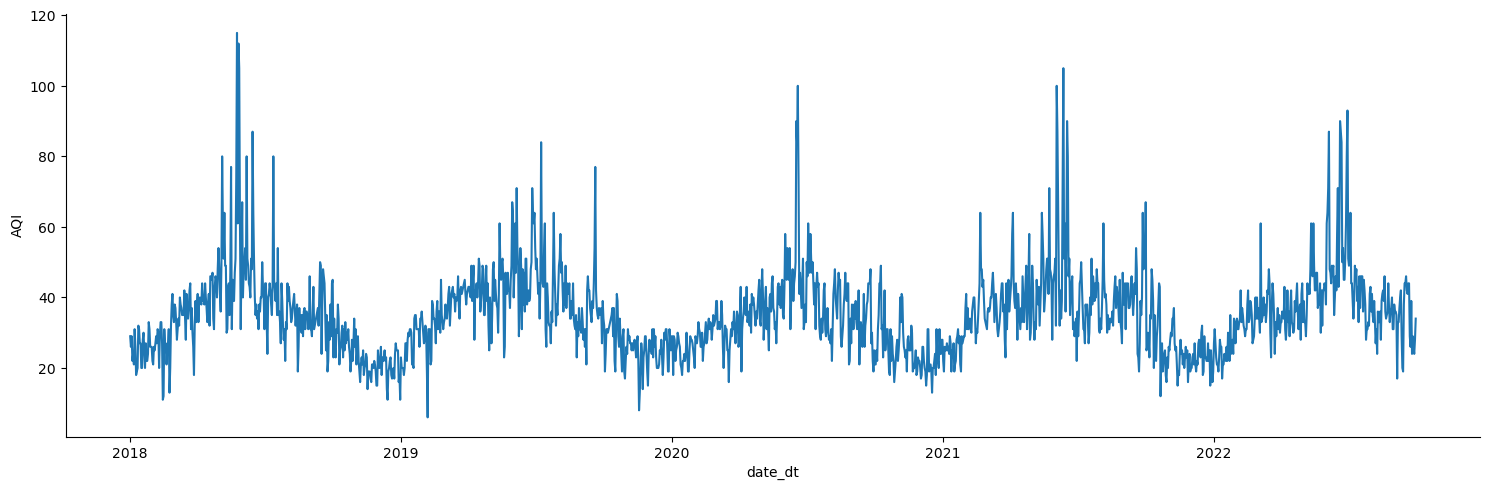

In [141]:
sns.relplot(data = ic_df, x='date_dt', y='AQI', kind = 'line', aspect =3 )
plt.show()

In [142]:
ic_df['the_week'] = ic_df.date_dt.dt.weekofyear

C:\Users\Bhava\AppData\Local\Temp\ipykernel_17624\3748760867.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  ic_df['the_week'] = ic_df.date_dt.dt.weekofyear
C:\Users\Bhava\AppData\Local\Temp\ipykernel_17624\3748760867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ic_df['the_week'] = ic_df.date_dt.dt.weekofyear


In [143]:
ind_cr_df = ic_df[['date_dt', 'AQI','the_year', 'State_County' , 'the_month', 'the_week']].reset_index(drop= True)

In [144]:
icr_series = ind_cr_df.AQI.copy()

In [145]:
print( icr_series.index )

RangeIndex(start=0, stop=1718, step=1)


In [146]:
icr_series.index = ind_cr_df.date_dt

In [147]:
print( icr_series.index )

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24',
               '2022-09-25', '2022-09-26', '2022-09-27', '2022-09-28',
               '2022-09-29', '2022-09-30'],
              dtype='datetime64[ns]', name='date_dt', length=1718, freq=None)


In [148]:
icr_ready_series = icr_series.copy().resample('MS').mean()

In [149]:
print( icr_ready_series.index )

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
      

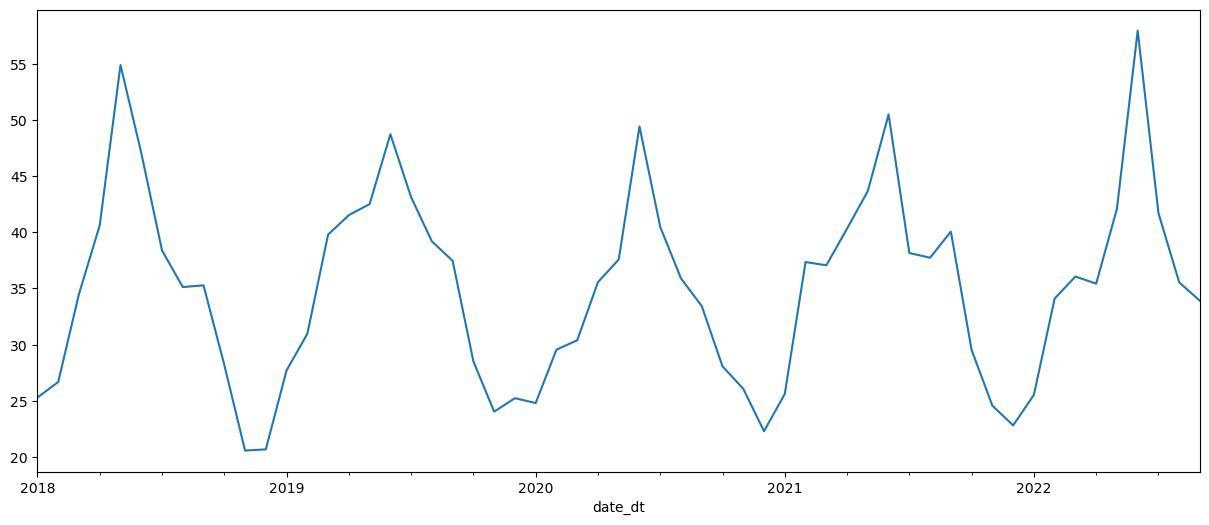

In [150]:
icr_ready_series.plot( figsize=(15, 6) )

plt.show()

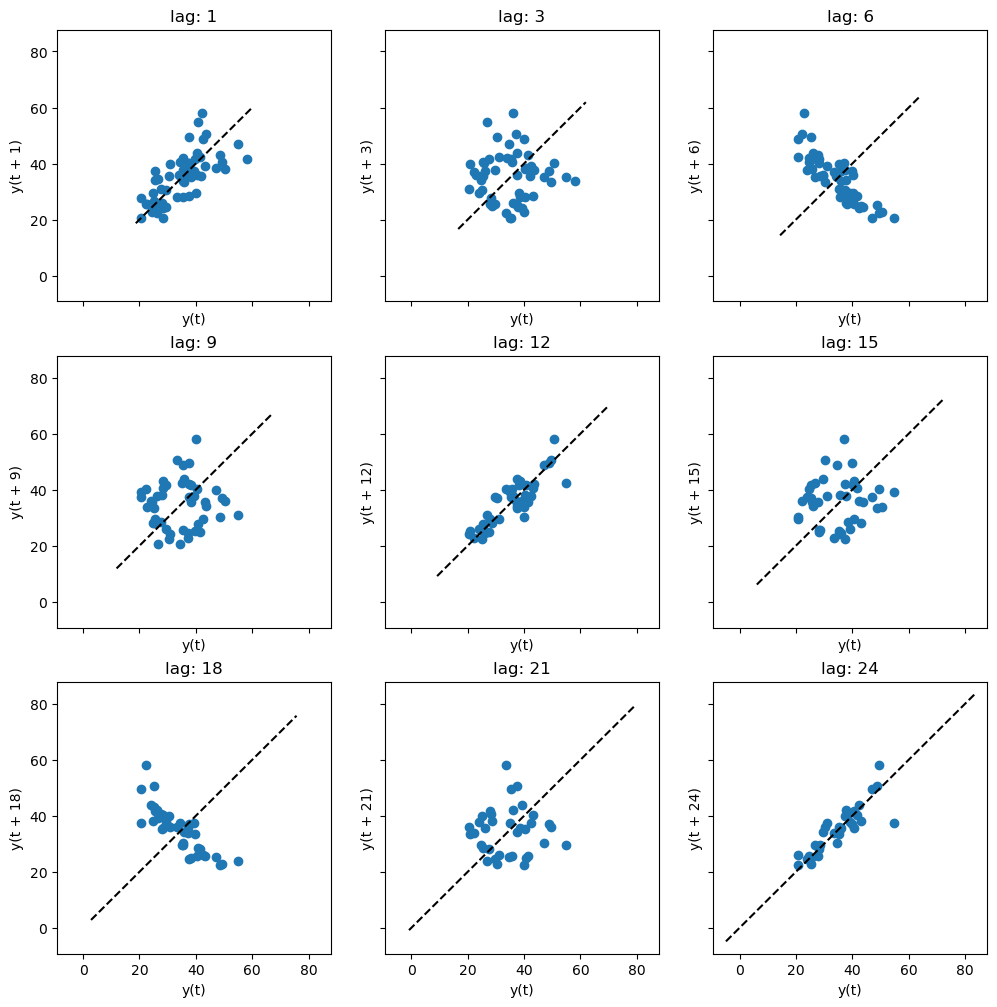

In [151]:
lags_use = [1, 3, 6, 9, 12, 15, 18, 21, 24]

fig, ax = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)

ax = ax.ravel()

for k in range(len(lags_use)):
    pd.plotting.lag_plot( icr_ready_series, lag=lags_use[k], ax=ax[k] )
    ax[k].plot( ax[k].get_xlim(), ax[k].get_ylim(), 'k--')
    ax[k].set_title('lag: ' + str(lags_use[k]) )

plt.show()

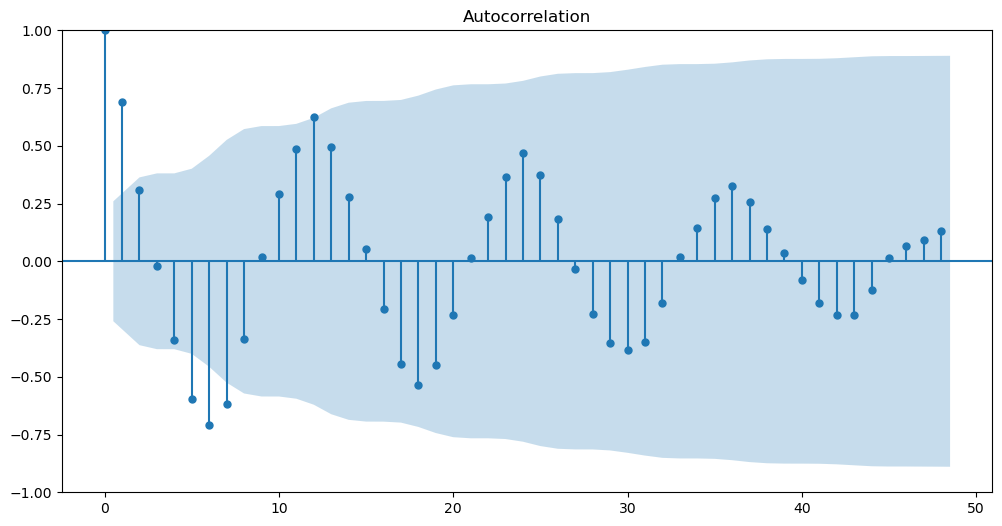

In [152]:
fig, ax = plt.subplots(figsize=(12, 6))

sm.graphics.tsa.plot_acf( icr_ready_series.values.squeeze(), lags=48, ax = ax)

plt.show()

### Decomposition Indiana_Carroll

In [153]:
icr_my_decomposition = sm.tsa.seasonal_decompose(icr_ready_series, model='additive')


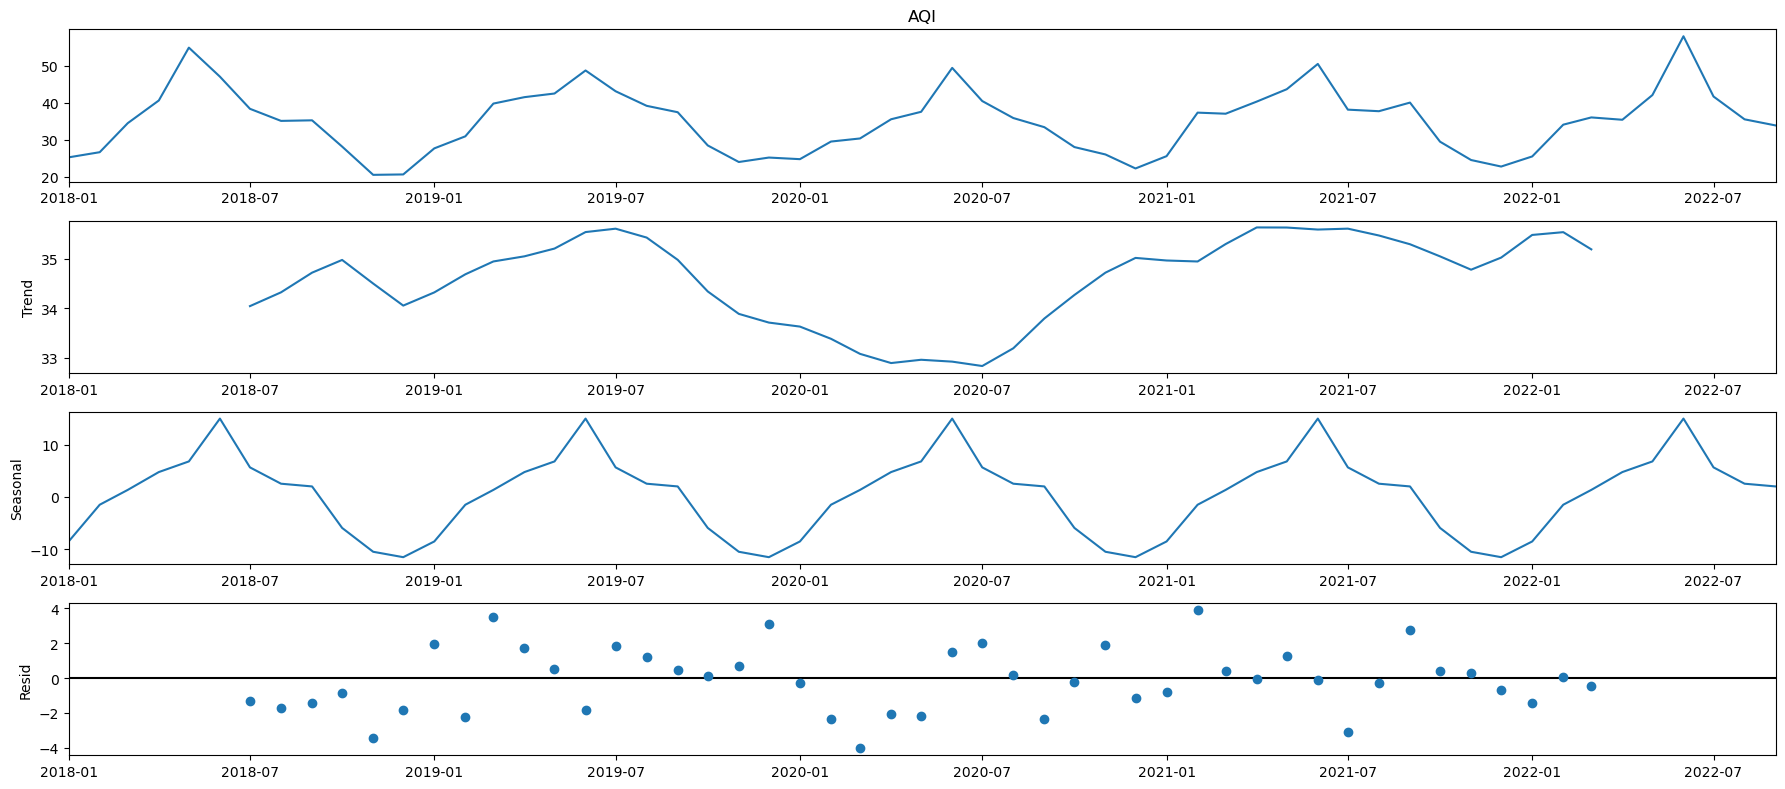

In [154]:
plt.rcParams['figure.figsize'] = 18,8
plt.show()

fig = icr_my_decomposition.plot()

In [155]:
icr_df_decomp = pd.DataFrame({'observed': icr_my_decomposition.observed, 
                          'seasonal_adjusted': icr_my_decomposition.observed - icr_my_decomposition.seasonal},
                        index=icr_ready_series.index)

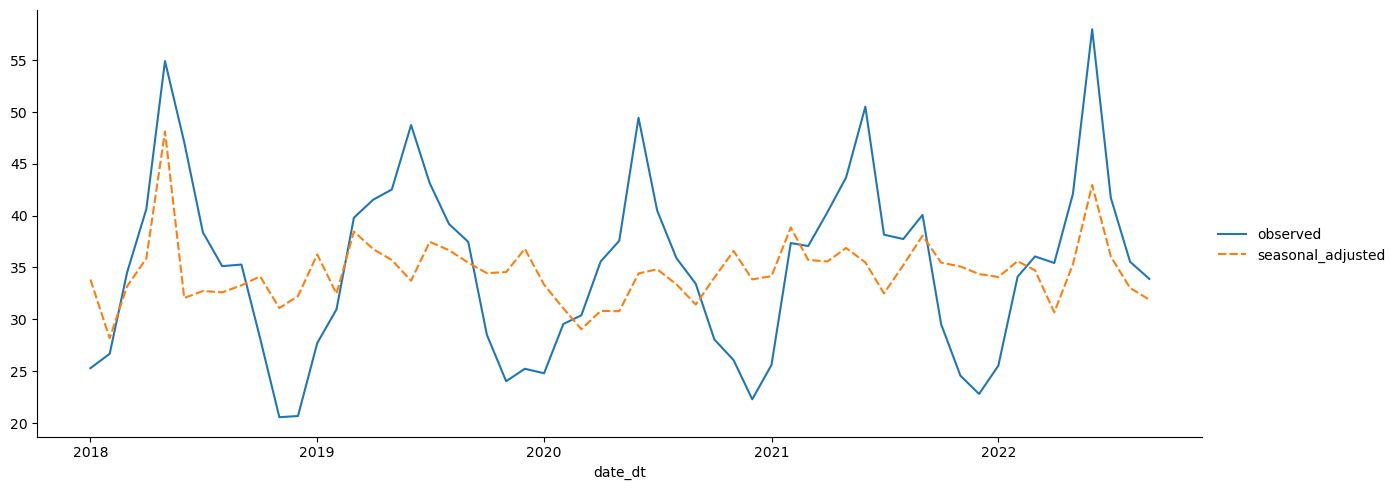

In [156]:
sns.relplot( data = icr_df_decomp, kind='line', aspect=2.5 )

plt.show()

In [157]:
from statsmodels.tsa.seasonal import STL
icr_ready_stl = STL( icr_ready_series )


In [158]:
icr_ready_stl_fit = icr_ready_stl.fit()


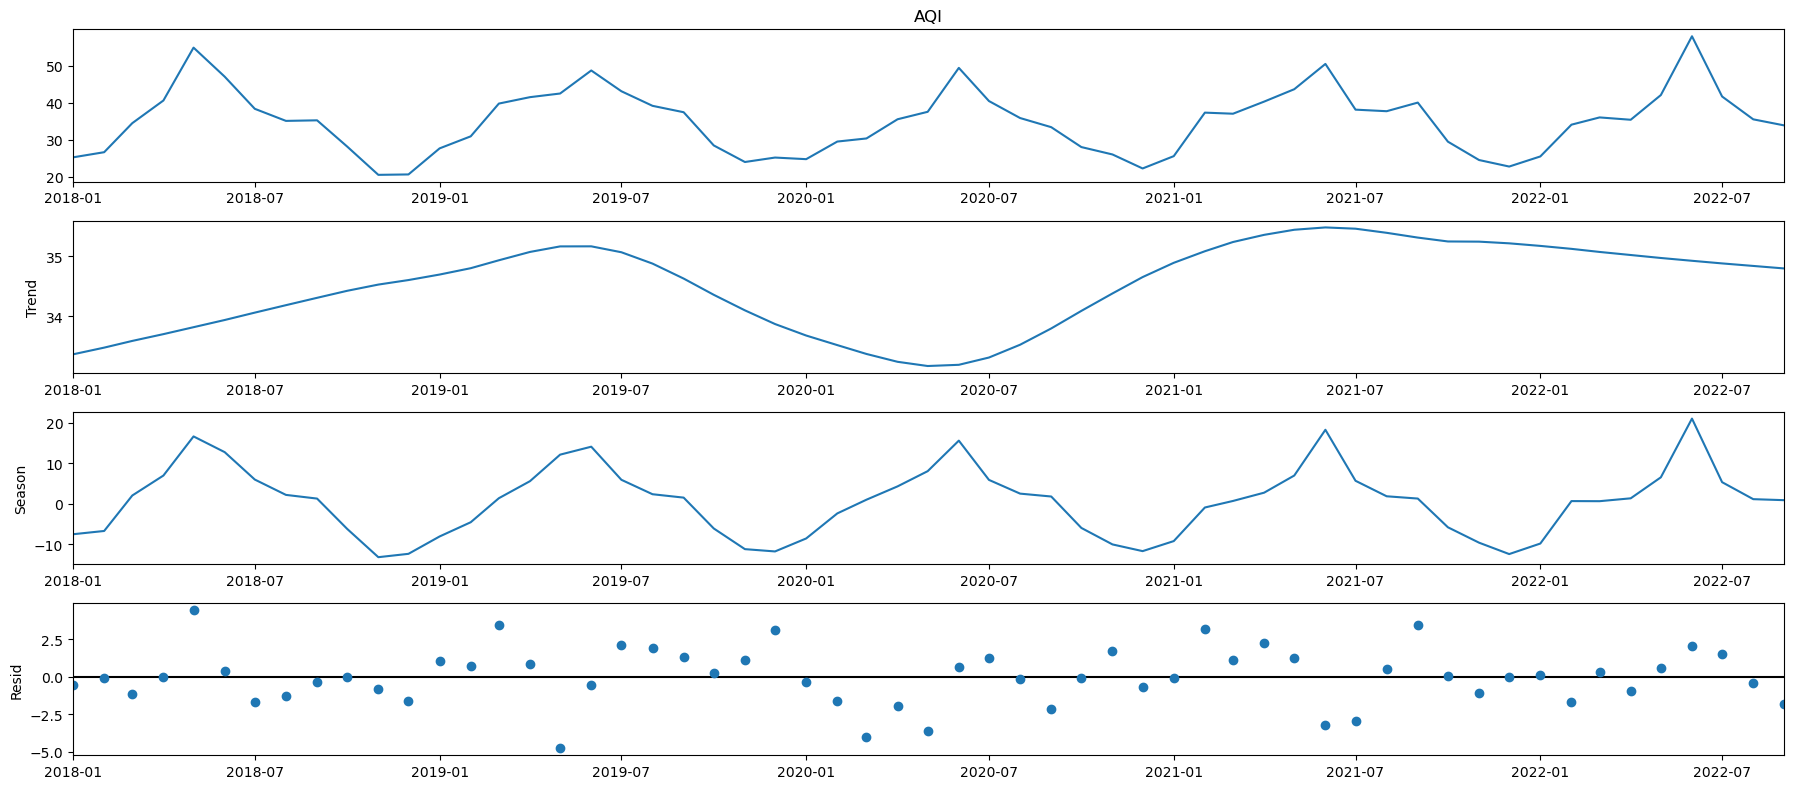

In [159]:
fig = icr_ready_stl_fit.plot()


In [160]:
icr_df_stl = pd.DataFrame({'observed': icr_ready_stl_fit.observed, 
                       'seasonal_adjusted': icr_ready_stl_fit.observed - icr_ready_stl_fit.seasonal,
                       'detrend': icr_ready_stl_fit.observed - icr_ready_stl_fit.trend},
                      index=icr_ready_series.index)

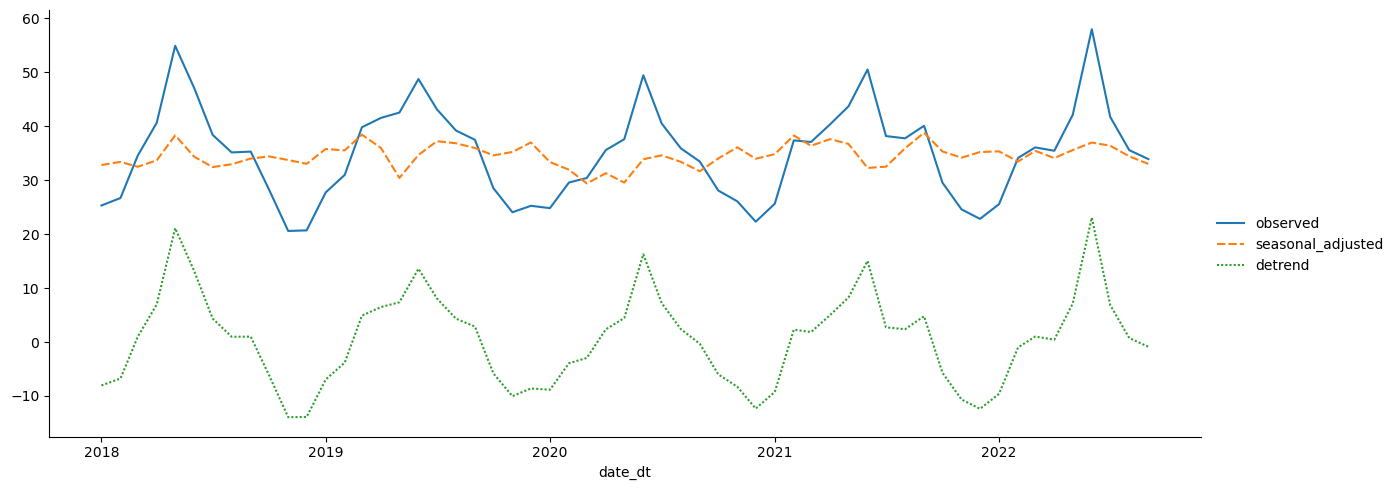

In [161]:
sns.relplot( data = icr_df_stl, kind='line', aspect=2.5 )

plt.show()

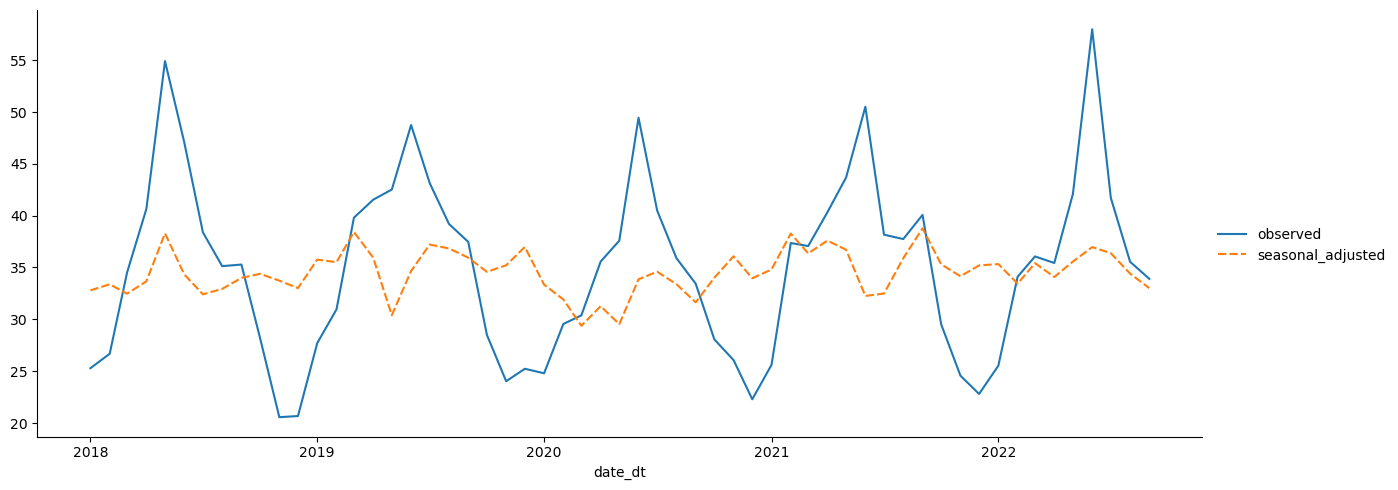

In [162]:
sns.relplot( data = icr_df_stl.loc[:, ['observed', 'seasonal_adjusted']], kind='line', aspect=2.5 )

plt.show()

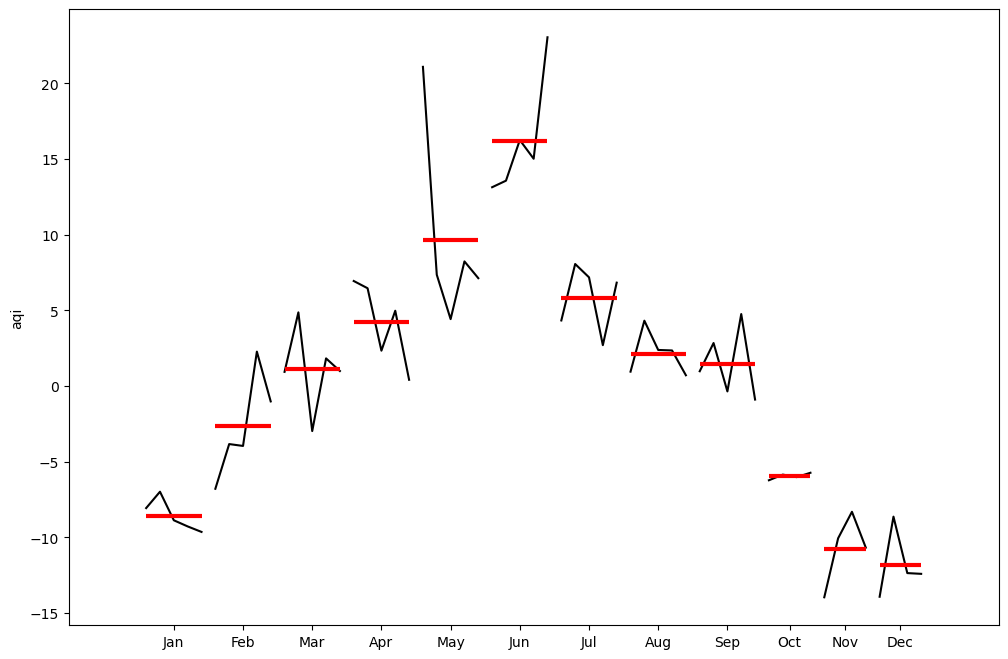

In [163]:
fig, ax = plt.subplots(figsize=(12, 8))

sm.graphics.tsa.month_plot( icr_df_stl.detrend, ylabel='aqi', ax=ax )

plt.show()

In [164]:
icr_df_stl['detrend_smooth'] = icr_ready_stl_fit.observed - (icr_ready_stl_fit.trend + icr_ready_stl_fit.resid)


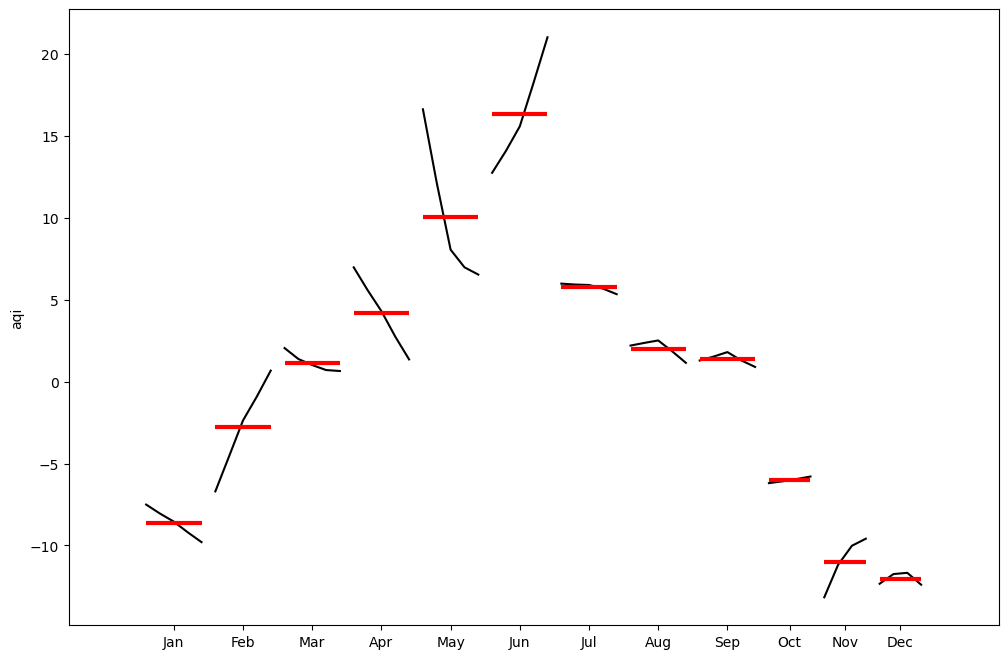

In [165]:
fig, ax = plt.subplots(figsize=(12, 8))

sm.graphics.tsa.month_plot( icr_df_stl.detrend_smooth, ylabel='aqi', ax=ax )

plt.show()

## Monthly Time series_Louisiana_Pointe Coupee

In [166]:
l_df = aqi_all[aqi_all['Defining_Site'] == '22-077-0001']


In [167]:
l_df.loc[ l_df['Defining_Parameter'] == 'Ozone', :].reset_index(drop = True)

State_Name    county_Name  State_Code  County_Code       Date  AQI  \
0     Louisiana  Pointe Coupee          22           77   1/1/2018   28   
1     Louisiana  Pointe Coupee          22           77   1/2/2018   29   
2     Louisiana  Pointe Coupee          22           77   1/3/2018   31   
3     Louisiana  Pointe Coupee          22           77   1/4/2018   35   
4     Louisiana  Pointe Coupee          22           77   1/5/2018   29   
...         ...            ...         ...          ...        ...  ...   
1701  Louisiana  Pointe Coupee          22           77  9/26/2022   39   
1702  Louisiana  Pointe Coupee          22           77  9/27/2022   41   
1703  Louisiana  Pointe Coupee          22           77  9/28/2022   43   
1704  Louisiana  Pointe Coupee          22           77  9/29/2022   36   
1705  Louisiana  Pointe Coupee          22           77  9/30/2022   39   

     Category Defining_Parameter Defining_Site  Number_of_Sites_Reporting  \
0        Good              Ozone   22-077-0001                          1   
1        Good              Ozone   22-077-0001                          1   
2        Good              Ozone   22-077-0001                          1   
3        Good              Ozone   22-077-0001                          1   
4        Good              Ozone   22-077-0001                          1   
...       ...                ...           ...                        ...   
1701     Good              Ozone   22-077-0001                          1   
1702     Good              Ozone   22-077-0001                          1   
1703     Good              Ozone   22-077-0001                          1   
1704     Good              Ozone   22-077-0001                          1   
1705     Good              Ozone   22-077-0001                          1   

        date_dt  the_year  the_month             State_County  
0    2018-01-01      2018          1  Louisiana_Pointe Coupee  
1    2018-01-02      2018          1  Louisiana_Pointe Coupee  
2    2018-01-03      2018          1  Louisiana_Pointe Coupee  
3    2018-01-04      2018          1  Louisiana_Pointe Coupee  
4    2018-01-05      2018          1  Louisiana_Pointe Coupee  
...         ...       ...        ...                      ...  
1701 2022-09-26      2022          9  Louisiana_Pointe Coupee  
1702 2022-09-27      2022          9  Louisiana_Pointe Coupee  
1703 2022-09-28      2022          9  Louisiana_Pointe Coupee  
1704 2022-09-29      2022          9  Louisiana_Pointe Coupee  
1705 2022-09-30      2022          9  Louisiana_Pointe Coupee  

[1706 rows x 14 columns]

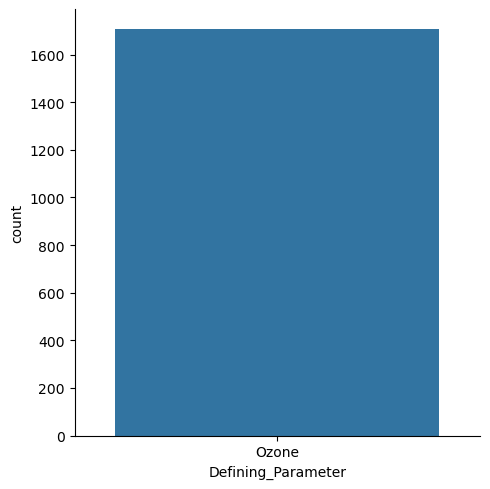

In [168]:
sns.catplot(data = l_df, x='Defining_Parameter' ,kind='count')

plt.show()

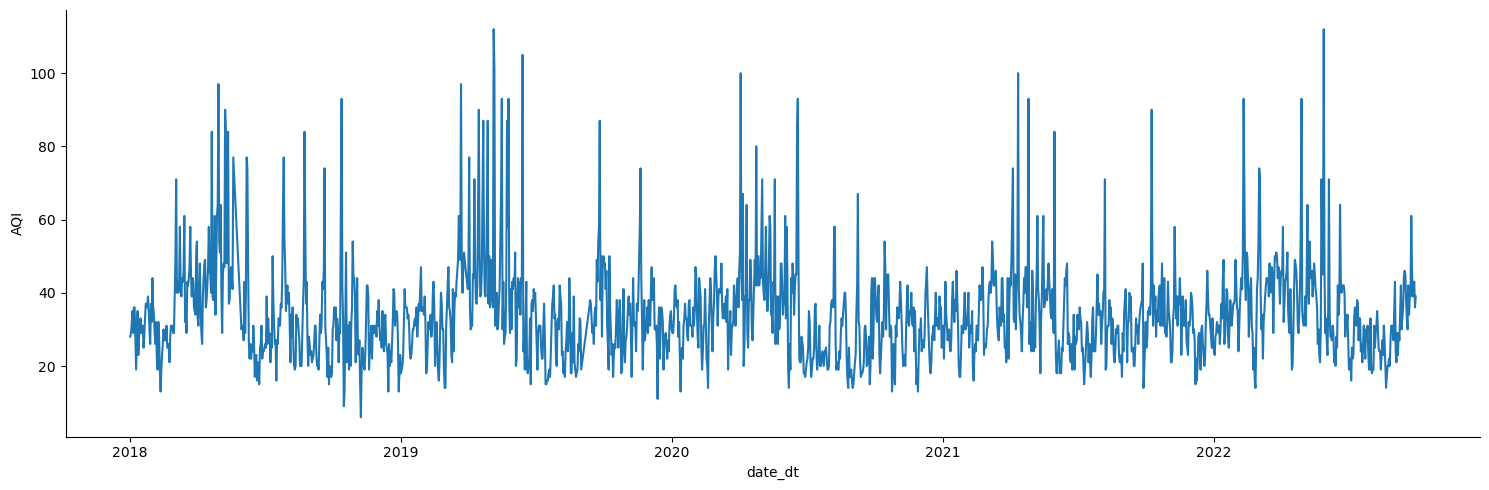

In [169]:
sns.relplot(data = l_df, x='date_dt', y='AQI', kind = 'line', aspect =3 )
plt.show()

In [170]:
l_df['the_week'] = l_df.date_dt.dt.weekofyear

C:\Users\Bhava\AppData\Local\Temp\ipykernel_17624\1983419467.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  l_df['the_week'] = l_df.date_dt.dt.weekofyear
C:\Users\Bhava\AppData\Local\Temp\ipykernel_17624\1983419467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l_df['the_week'] = l_df.date_dt.dt.weekofyear


In [171]:
lpc_df = l_df[['date_dt', 'AQI','the_year', 'State_County' , 'the_month', 'the_week']].reset_index(drop= True)

In [172]:
lpc_series = lpc_df.AQI.copy()

In [173]:
print( lpc_series.index )

RangeIndex(start=0, stop=1706, step=1)


In [174]:
lpc_series.index = lpc_df.date_dt

In [175]:
print( lpc_series.index )

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24',
               '2022-09-25', '2022-09-26', '2022-09-27', '2022-09-28',
               '2022-09-29', '2022-09-30'],
              dtype='datetime64[ns]', name='date_dt', length=1706, freq=None)


### Resample_Louisiana_Pointe Coupee

In [176]:
lpc_ready_series = lpc_series.copy().resample('MS').mean()

In [177]:
print( lpc_ready_series.index )

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
      

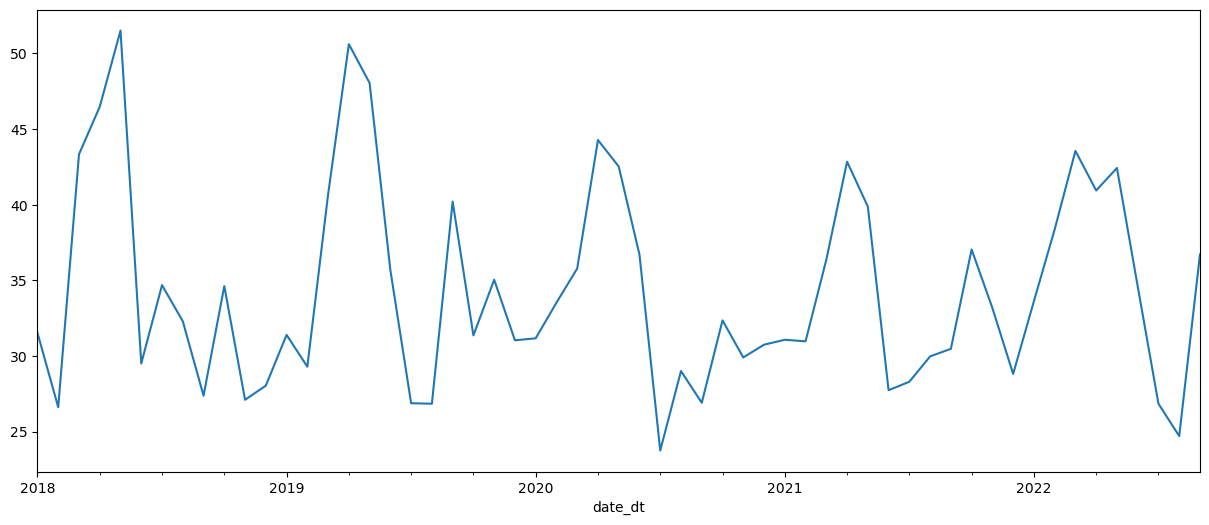

In [178]:
lpc_ready_series.plot( figsize=(15, 6) )

plt.show()

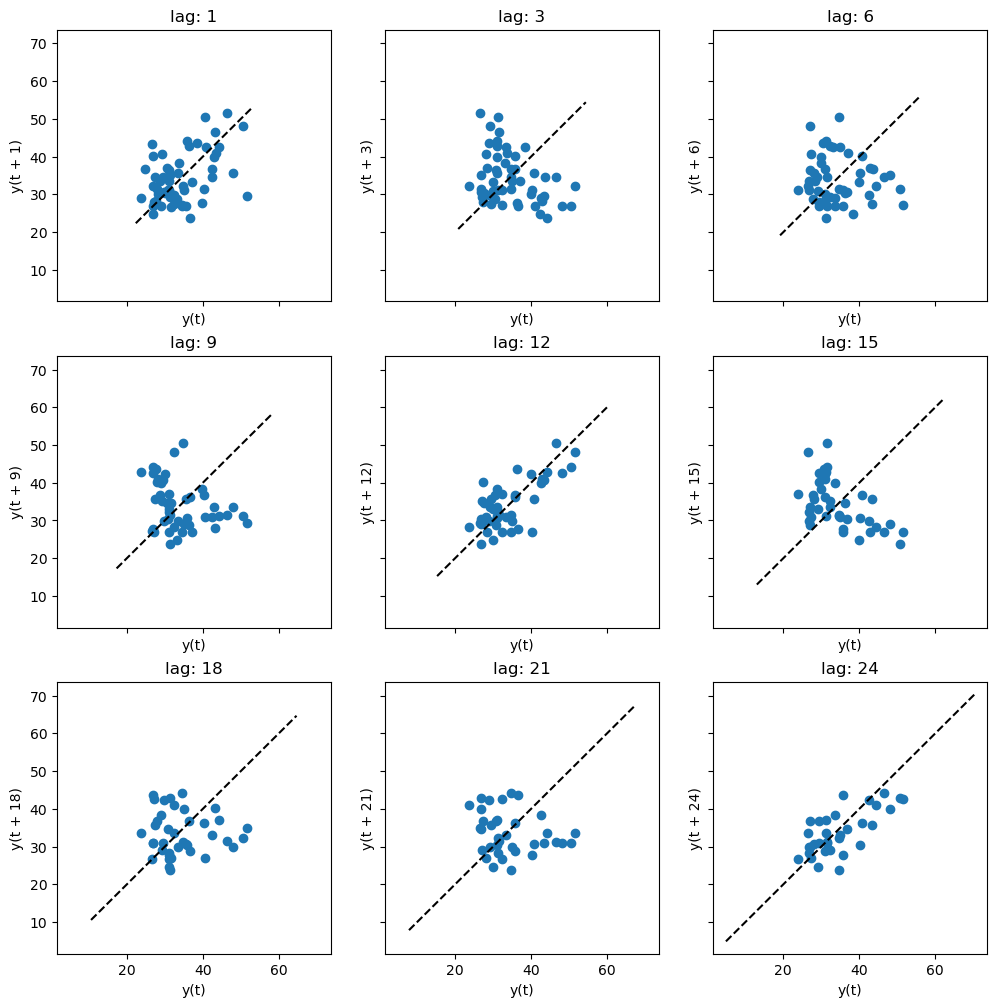

In [179]:
lags_use = [1, 3, 6, 9, 12, 15, 18, 21, 24]

fig, ax = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)

ax = ax.ravel()

for k in range(len(lags_use)):
    pd.plotting.lag_plot( lpc_ready_series, lag=lags_use[k], ax=ax[k] )
    ax[k].plot( ax[k].get_xlim(), ax[k].get_ylim(), 'k--')
    ax[k].set_title('lag: ' + str(lags_use[k]) )

plt.show()

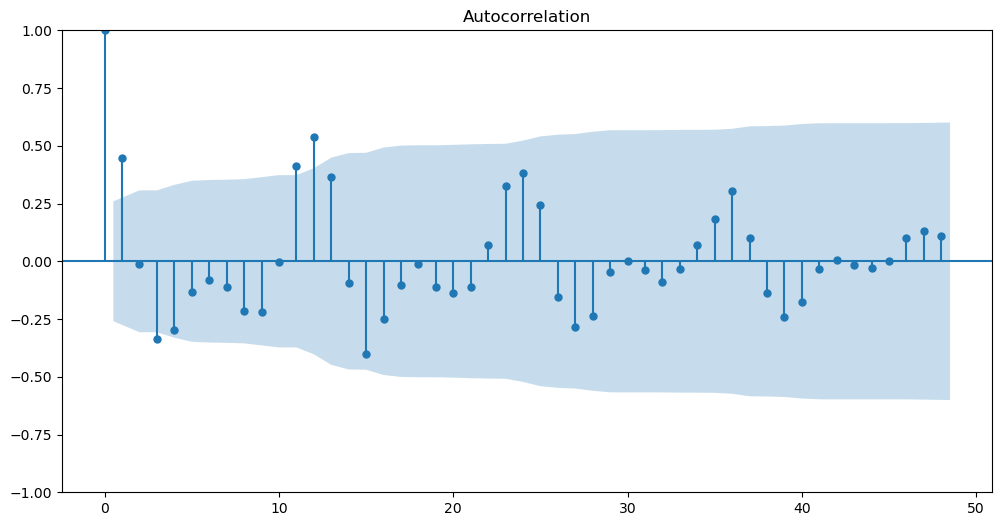

In [180]:
fig, ax = plt.subplots(figsize=(12, 6))

sm.graphics.tsa.plot_acf( lpc_ready_series.values.squeeze(), lags=48, ax = ax)

plt.show()

### Decomposition_Louisiana_Pointe Coupee

In [181]:
lpc_my_decomposition = sm.tsa.seasonal_decompose(lpc_ready_series, model='additive')


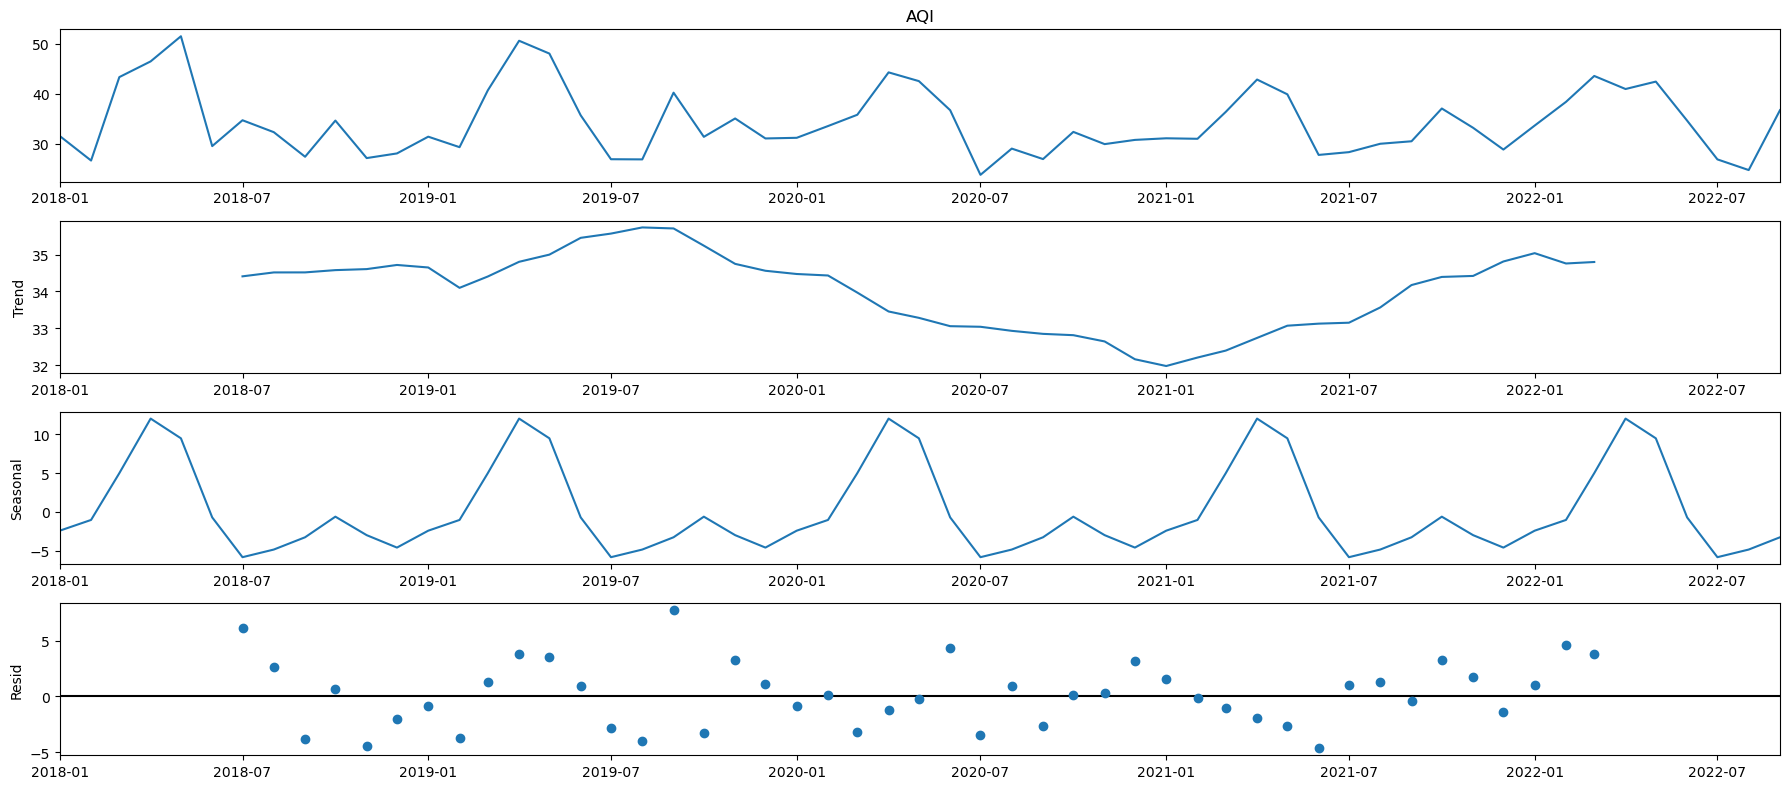

In [182]:
plt.rcParams['figure.figsize'] = 18,8
plt.show()

fig = lpc_my_decomposition.plot()

In [183]:
lpc_df_decomp = pd.DataFrame({'observed': lpc_my_decomposition.observed, 
                          'seasonal_adjusted': lpc_my_decomposition.observed - lpc_my_decomposition.seasonal},
                        index=lpc_ready_series.index)

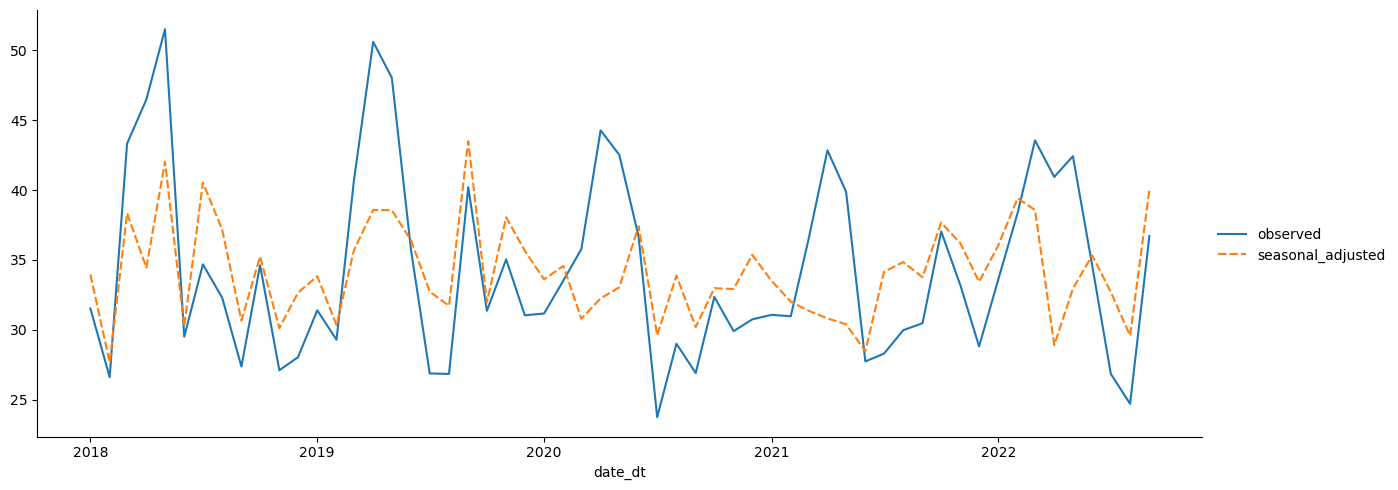

In [184]:
sns.relplot( data = lpc_df_decomp, kind='line', aspect=2.5 )

plt.show()

In [185]:
from statsmodels.tsa.seasonal import STL
lpc_ready_stl = STL( lpc_ready_series )


In [186]:
lpc_ready_stl_fit = lpc_ready_stl.fit()


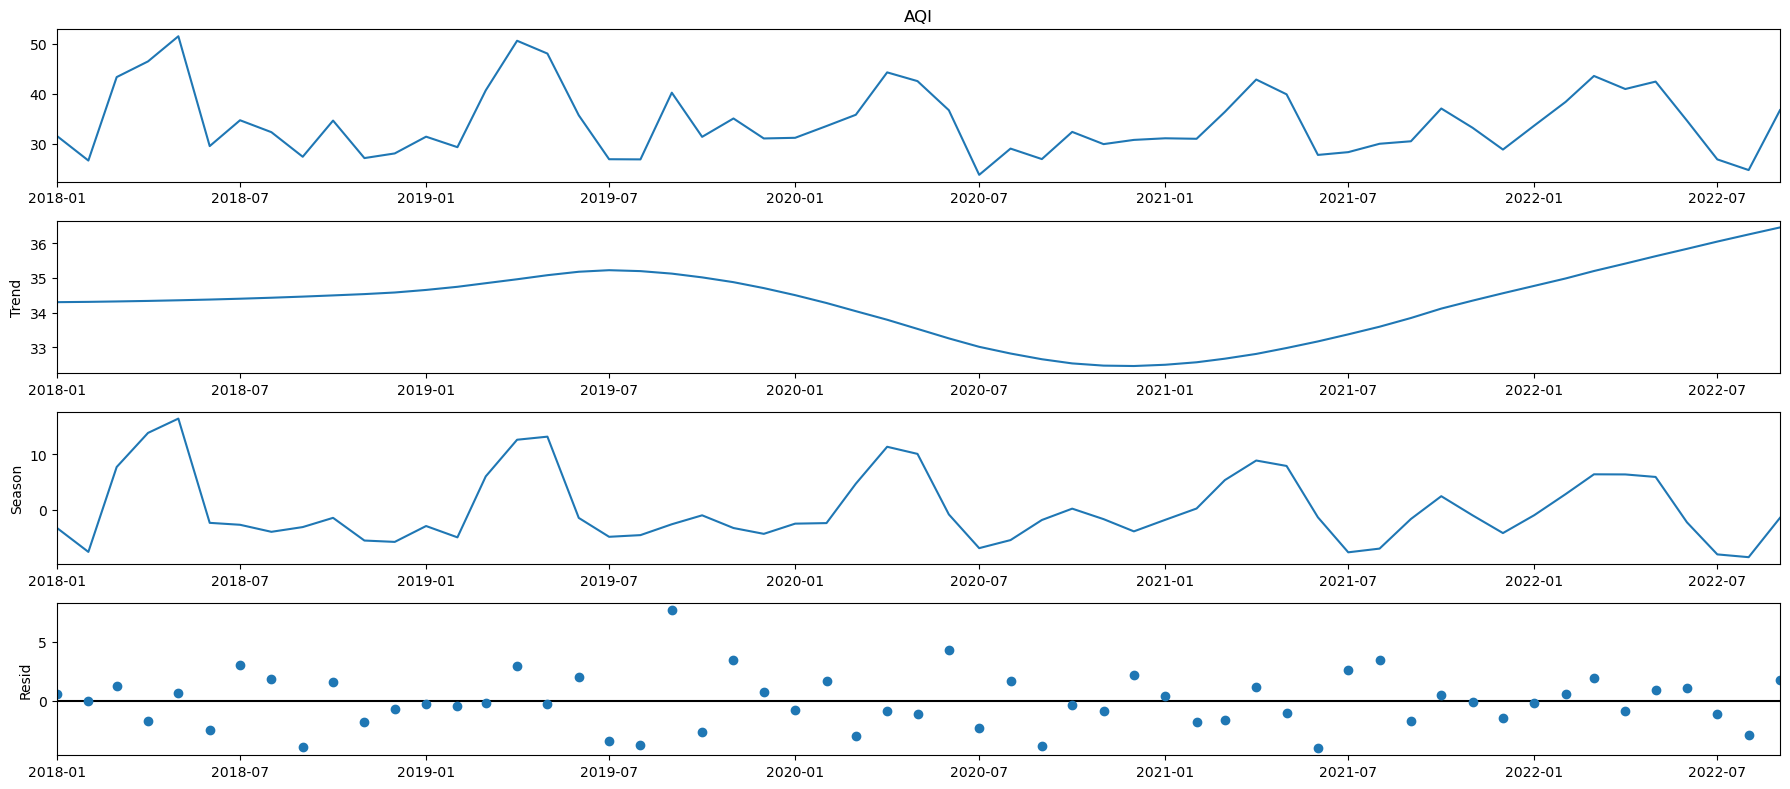

In [187]:
fig = lpc_ready_stl_fit.plot()


In [188]:
lpc_df_stl = pd.DataFrame({'observed': lpc_ready_stl_fit.observed, 
                       'seasonal_adjusted': lpc_ready_stl_fit.observed - lpc_ready_stl_fit.seasonal,
                       'detrend': lpc_ready_stl_fit.observed - lpc_ready_stl_fit.trend},
                      index=lpc_ready_series.index)

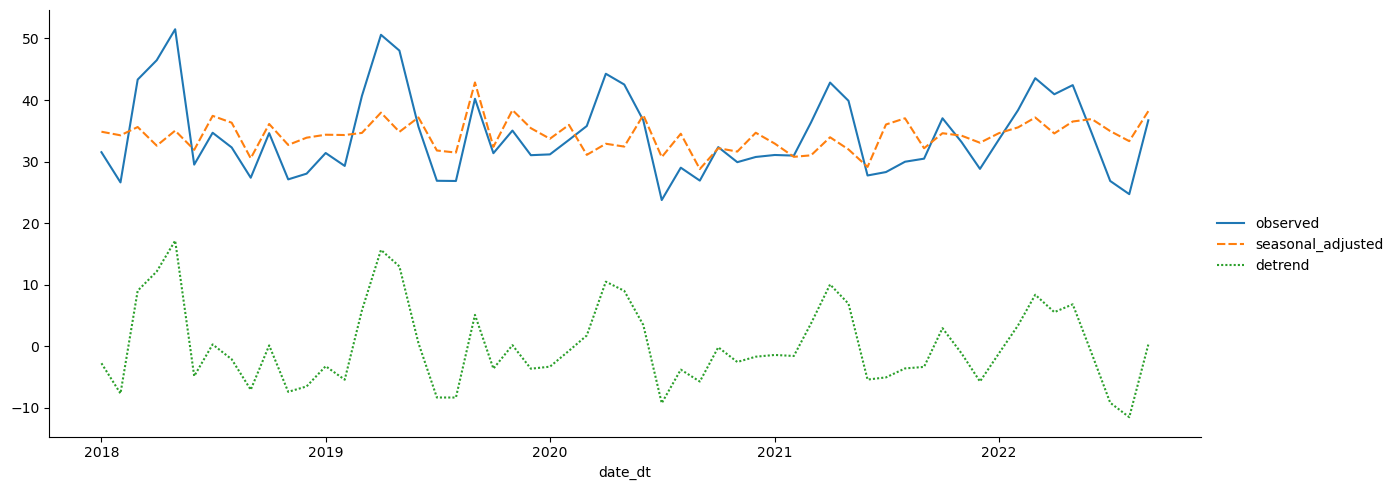

In [189]:
sns.relplot( data = lpc_df_stl, kind='line', aspect=2.5 )

plt.show()

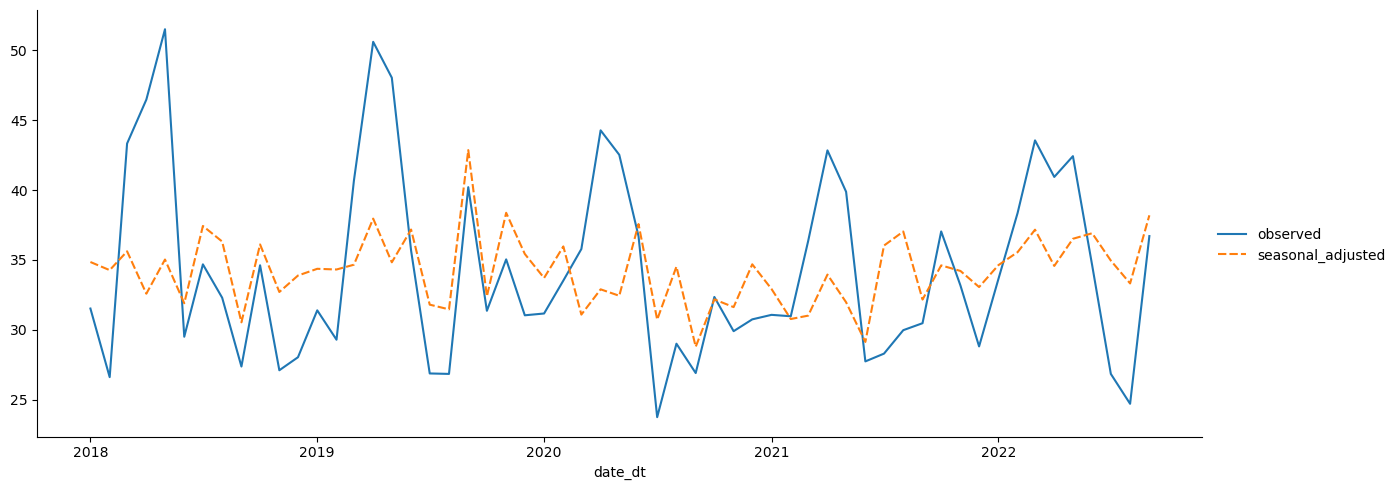

In [190]:
sns.relplot( data = lpc_df_stl.loc[:, ['observed', 'seasonal_adjusted']], kind='line', aspect=2.5 )

plt.show()

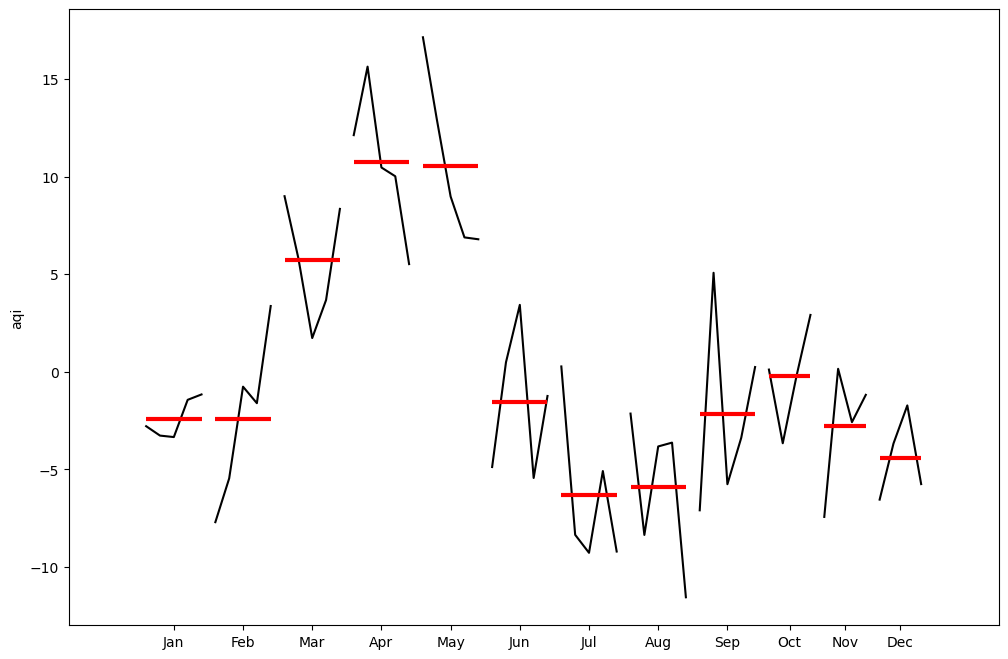

In [191]:
fig, ax = plt.subplots(figsize=(12, 8))

sm.graphics.tsa.month_plot( lpc_df_stl.detrend, ylabel='aqi', ax=ax )

plt.show()

In [192]:
lpc_df_stl['detrend_smooth'] = lpc_ready_stl_fit.observed - (lpc_ready_stl_fit.trend + lpc_ready_stl_fit.resid)


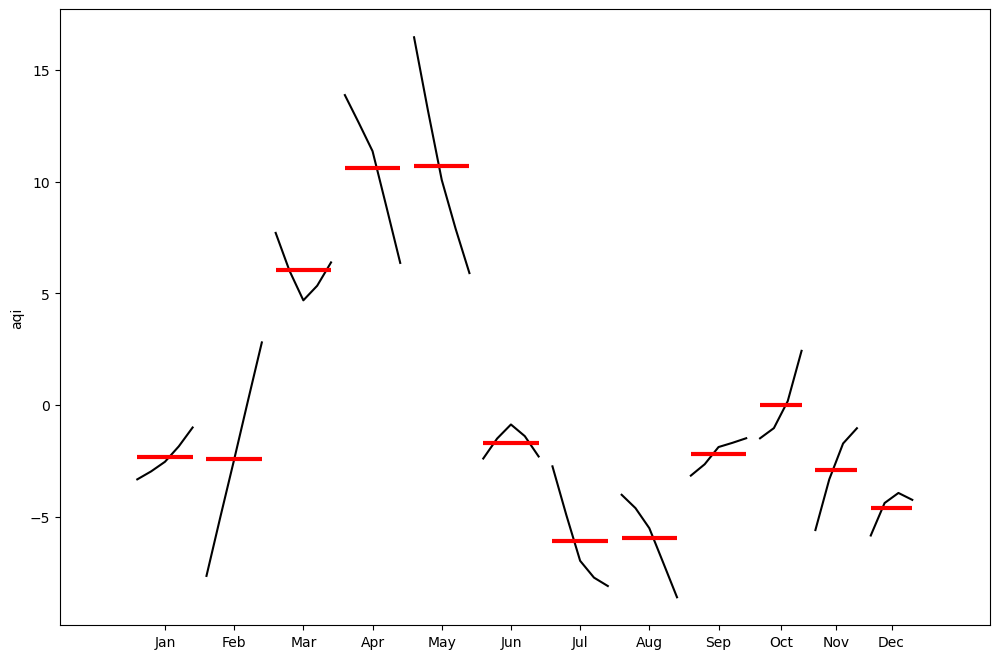

In [193]:
fig, ax = plt.subplots(figsize=(12, 8))

sm.graphics.tsa.month_plot( lpc_df_stl.detrend_smooth, ylabel='aqi', ax=ax )

plt.show()

## Monthly time series New_Mexico_Valencia

In [194]:
nm_df = aqi_all[aqi_all['Defining_Site'] == '35-061-0008']


In [195]:
nm_df.loc[ nm_df['Defining_Parameter'] == 'Ozone', :].reset_index(drop = True)

State_Name county_Name  State_Code  County_Code       Date  AQI  \
0     New Mexico    Valencia          35           61   1/1/2018   26   
1     New Mexico    Valencia          35           61   1/2/2018   33   
2     New Mexico    Valencia          35           61   1/3/2018   27   
3     New Mexico    Valencia          35           61   1/4/2018   27   
4     New Mexico    Valencia          35           61   1/5/2018   31   
...          ...         ...         ...          ...        ...  ...   
1696  New Mexico    Valencia          35           61  9/26/2022   54   
1697  New Mexico    Valencia          35           61  9/27/2022   47   
1698  New Mexico    Valencia          35           61  9/28/2022   48   
1699  New Mexico    Valencia          35           61  9/29/2022   41   
1700  New Mexico    Valencia          35           61  9/30/2022   37   

      Category Defining_Parameter Defining_Site  Number_of_Sites_Reporting  \
0         Good              Ozone   35-061-0008                          1   
1         Good              Ozone   35-061-0008                          1   
2         Good              Ozone   35-061-0008                          1   
3         Good              Ozone   35-061-0008                          1   
4         Good              Ozone   35-061-0008                          1   
...        ...                ...           ...                        ...   
1696  Moderate              Ozone   35-061-0008                          1   
1697      Good              Ozone   35-061-0008                          1   
1698      Good              Ozone   35-061-0008                          1   
1699      Good              Ozone   35-061-0008                          1   
1700      Good              Ozone   35-061-0008                          1   

        date_dt  the_year  the_month         State_County  
0    2018-01-01      2018          1  New Mexico_Valencia  
1    2018-01-02      2018          1  New Mexico_Valencia  
2    2018-01-03      2018          1  New Mexico_Valencia  
3    2018-01-04      2018          1  New Mexico_Valencia  
4    2018-01-05      2018          1  New Mexico_Valencia  
...         ...       ...        ...                  ...  
1696 2022-09-26      2022          9  New Mexico_Valencia  
1697 2022-09-27      2022          9  New Mexico_Valencia  
1698 2022-09-28      2022          9  New Mexico_Valencia  
1699 2022-09-29      2022          9  New Mexico_Valencia  
1700 2022-09-30      2022          9  New Mexico_Valencia  

[1701 rows x 14 columns]

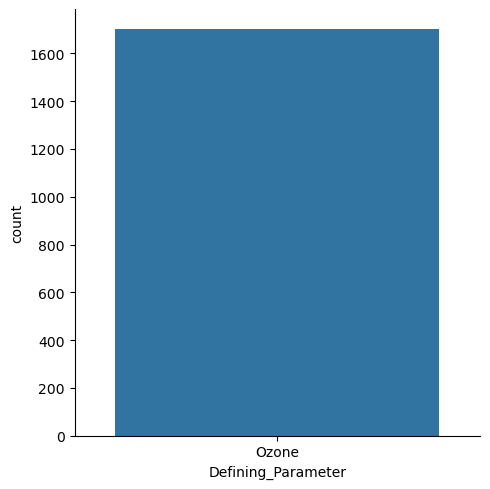

In [196]:
sns.catplot(data = nm_df, x='Defining_Parameter' ,kind='count')

plt.show()

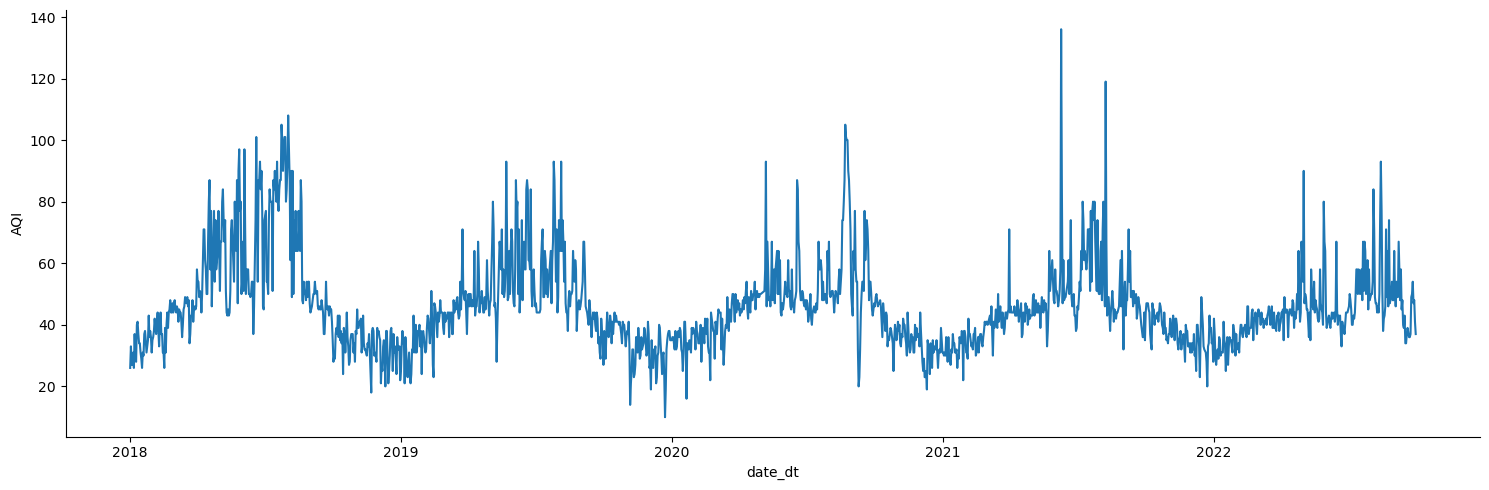

In [197]:
sns.relplot(data = nm_df, x='date_dt', y='AQI', kind = 'line', aspect =3 )
plt.show()

In [198]:
nm_df['the_week'] = nm_df.date_dt.dt.weekofyear

C:\Users\Bhava\AppData\Local\Temp\ipykernel_17624\2216091766.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  nm_df['the_week'] = nm_df.date_dt.dt.weekofyear
C:\Users\Bhava\AppData\Local\Temp\ipykernel_17624\2216091766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nm_df['the_week'] = nm_df.date_dt.dt.weekofyear


In [199]:
nm_v_df = nm_df[['date_dt', 'AQI','the_year', 'State_County' , 'the_month', 'the_week']].reset_index(drop= True)

In [200]:
nm_series = nm_v_df.AQI.copy()

In [201]:
print( nm_series.index )

RangeIndex(start=0, stop=1701, step=1)


In [202]:
nm_series.index = nm_v_df.date_dt

In [203]:
print( nm_series.index )

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24',
               '2022-09-25', '2022-09-26', '2022-09-27', '2022-09-28',
               '2022-09-29', '2022-09-30'],
              dtype='datetime64[ns]', name='date_dt', length=1701, freq=None)


### Resampling New_Mexico_Valencia

In [204]:
nm_ready_series = nm_series.copy().resample('MS').mean()

In [205]:
print( nm_ready_series.index )

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
      

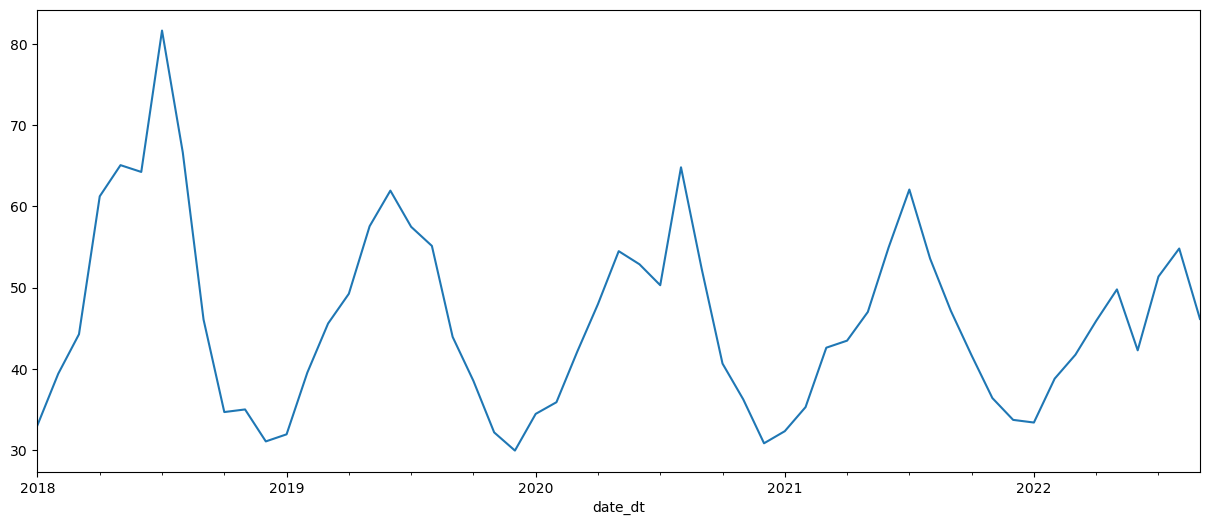

In [206]:
nm_ready_series.plot( figsize=(15, 6) )

plt.show()

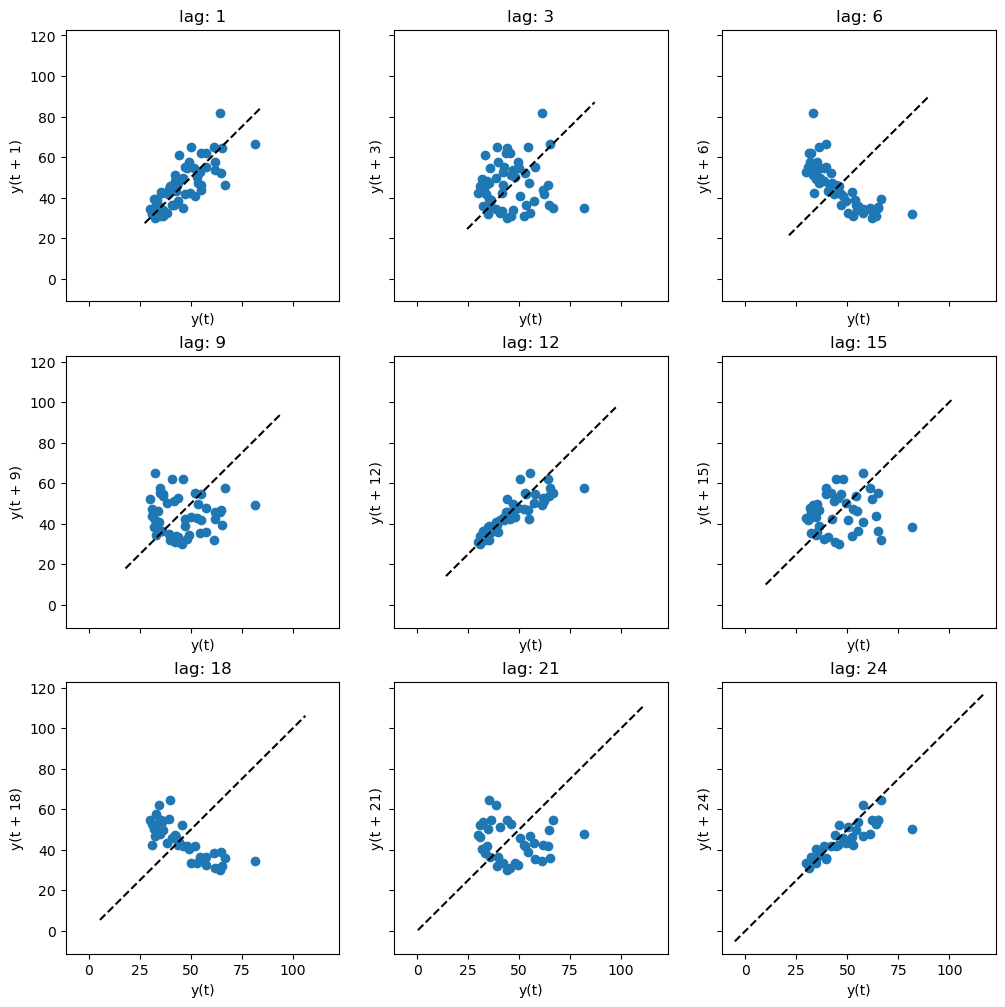

In [207]:
lags_use = [1, 3, 6, 9, 12, 15, 18, 21, 24]

fig, ax = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)

ax = ax.ravel()

for k in range(len(lags_use)):
    pd.plotting.lag_plot( nm_ready_series, lag=lags_use[k], ax=ax[k] )
    ax[k].plot( ax[k].get_xlim(), ax[k].get_ylim(), 'k--')
    ax[k].set_title('lag: ' + str(lags_use[k]) )

plt.show()

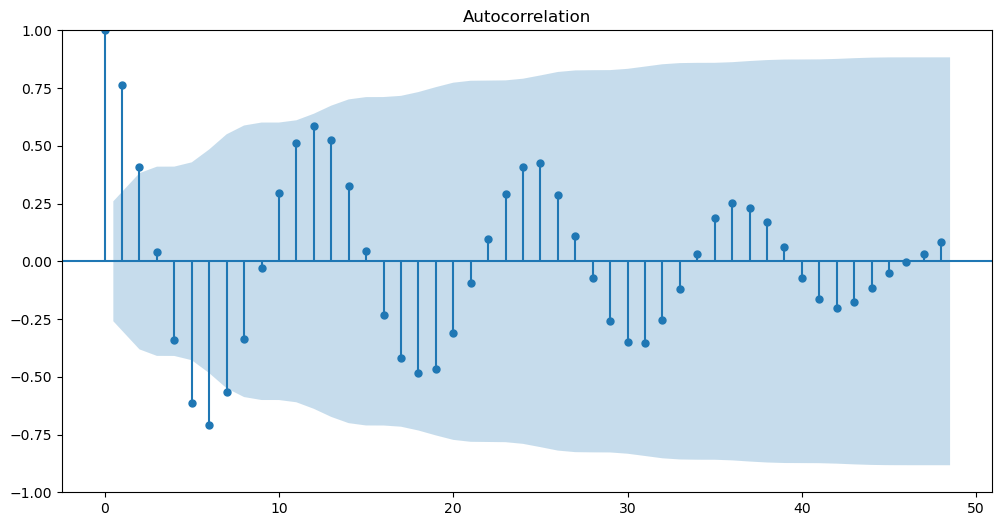

In [208]:
fig, ax = plt.subplots(figsize=(12, 6))

sm.graphics.tsa.plot_acf( nm_ready_series.values.squeeze(), lags=48, ax = ax)

plt.show()

### Decomposition New_Mexico_Valencia

In [209]:
nm_my_decomposition = sm.tsa.seasonal_decompose(nm_ready_series, model='additive')


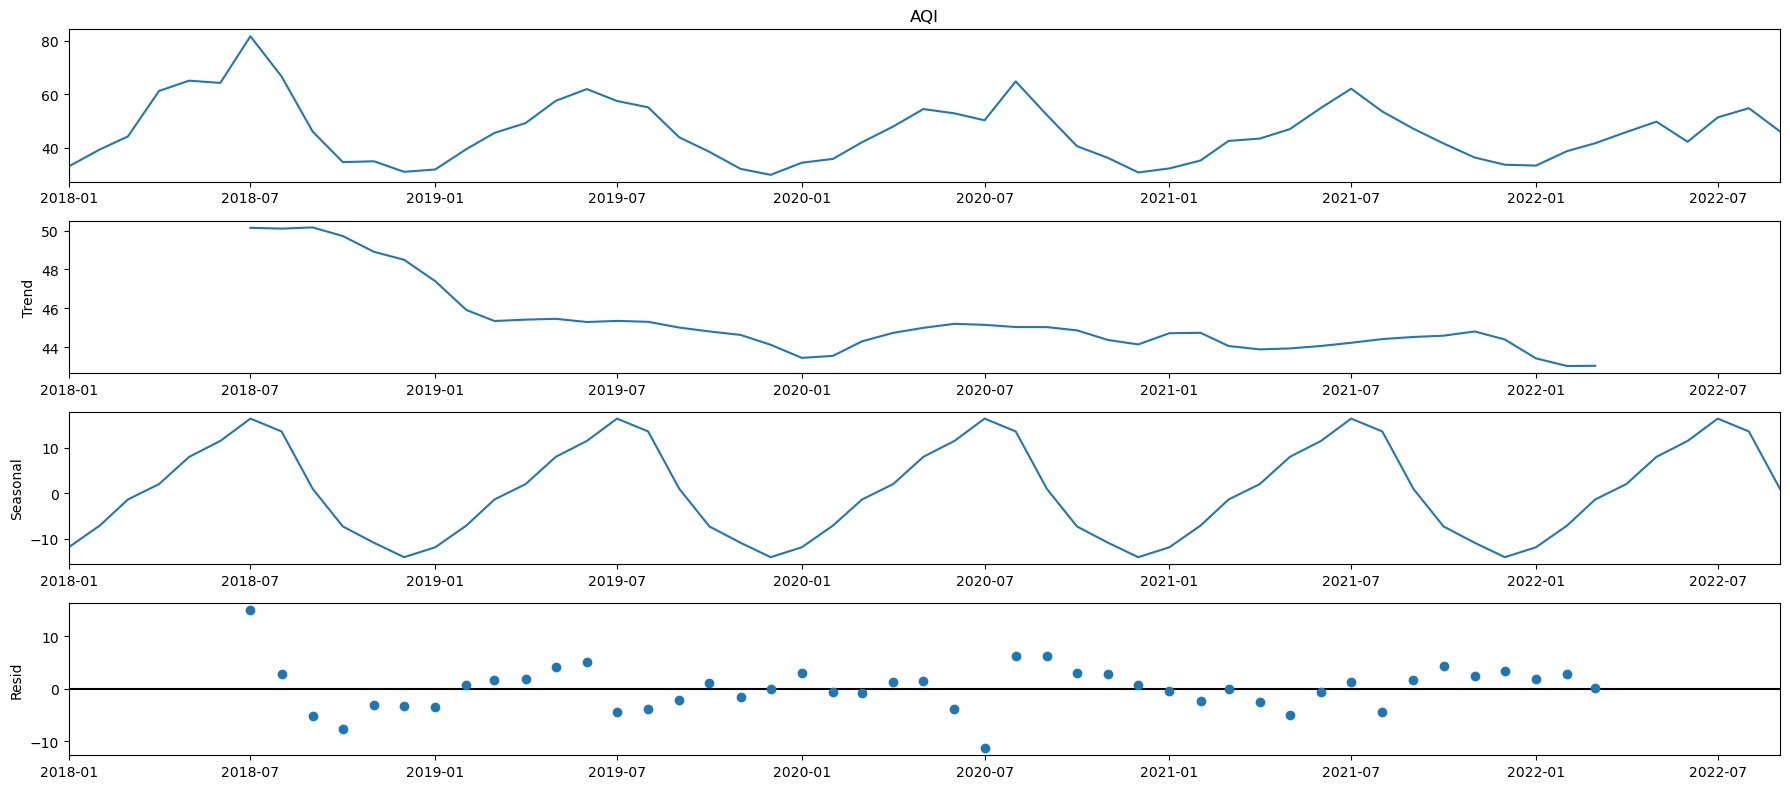

In [210]:
plt.rcParams['figure.figsize'] = 18,8
plt.show()

fig = nm_my_decomposition.plot()

In [211]:
nm_df_decomp = pd.DataFrame({'observed': nm_my_decomposition.observed, 
                          'seasonal_adjusted': nm_my_decomposition.observed - nm_my_decomposition.seasonal},
                        index=nm_ready_series.index)

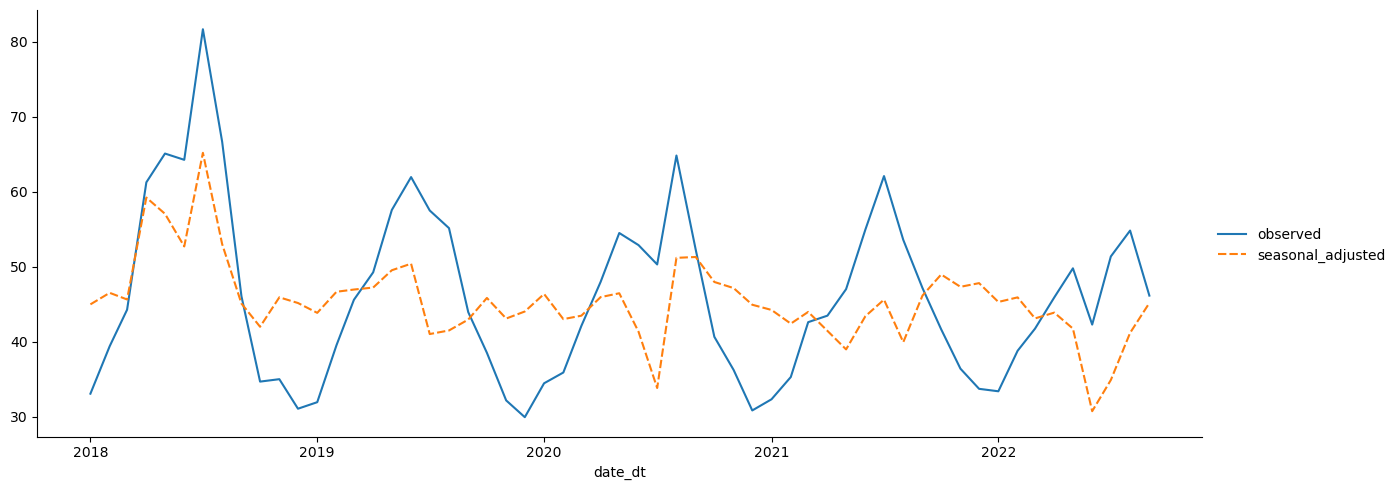

In [212]:
sns.relplot( data = nm_df_decomp, kind='line', aspect=2.5 )

plt.show()

In [213]:
from statsmodels.tsa.seasonal import STL
nm_ready_stl = STL( nm_ready_series )


In [214]:
nm_ready_stl_fit = nm_ready_stl.fit()


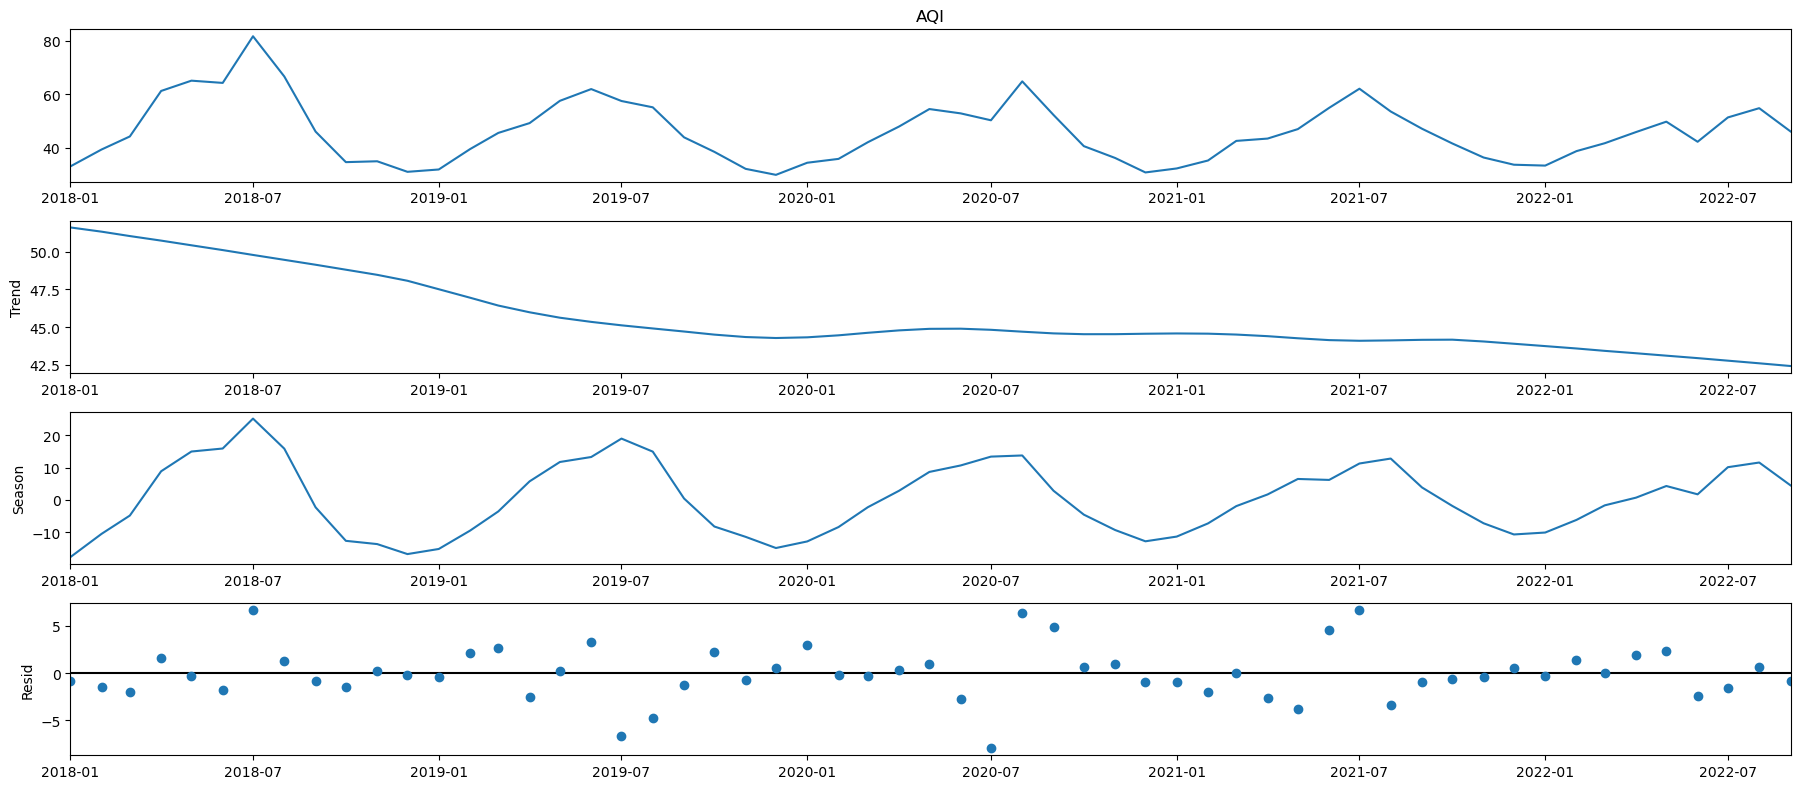

In [215]:
fig = nm_ready_stl_fit.plot()


In [216]:
nm_df_stl = pd.DataFrame({'observed': nm_ready_stl_fit.observed, 
                       'seasonal_adjusted': nm_ready_stl_fit.observed - nm_ready_stl_fit.seasonal,
                       'detrend': nm_ready_stl_fit.observed - nm_ready_stl_fit.trend},
                      index=nm_ready_series.index)

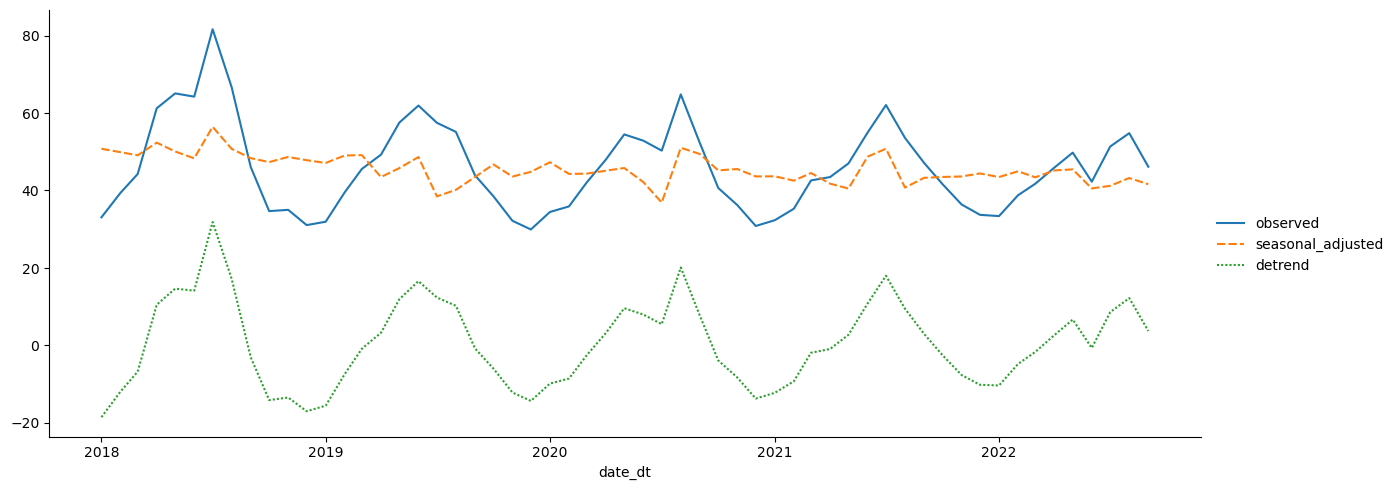

In [217]:
sns.relplot( data = nm_df_stl, kind='line', aspect=2.5 )

plt.show()

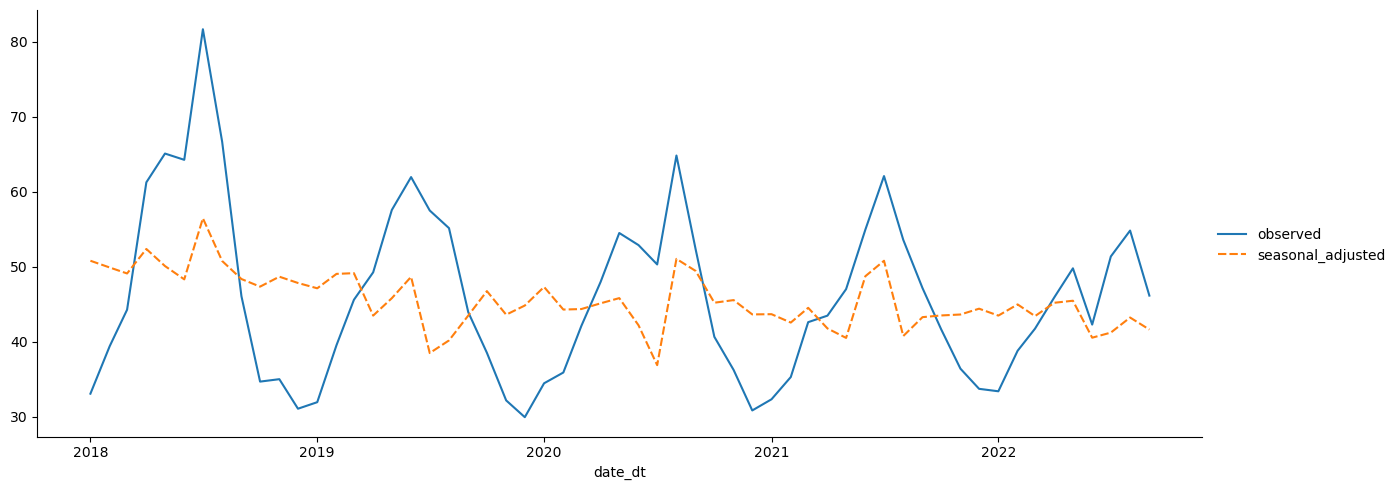

In [218]:
sns.relplot( data = nm_df_stl.loc[:, ['observed', 'seasonal_adjusted']], kind='line', aspect=2.5 )

plt.show()

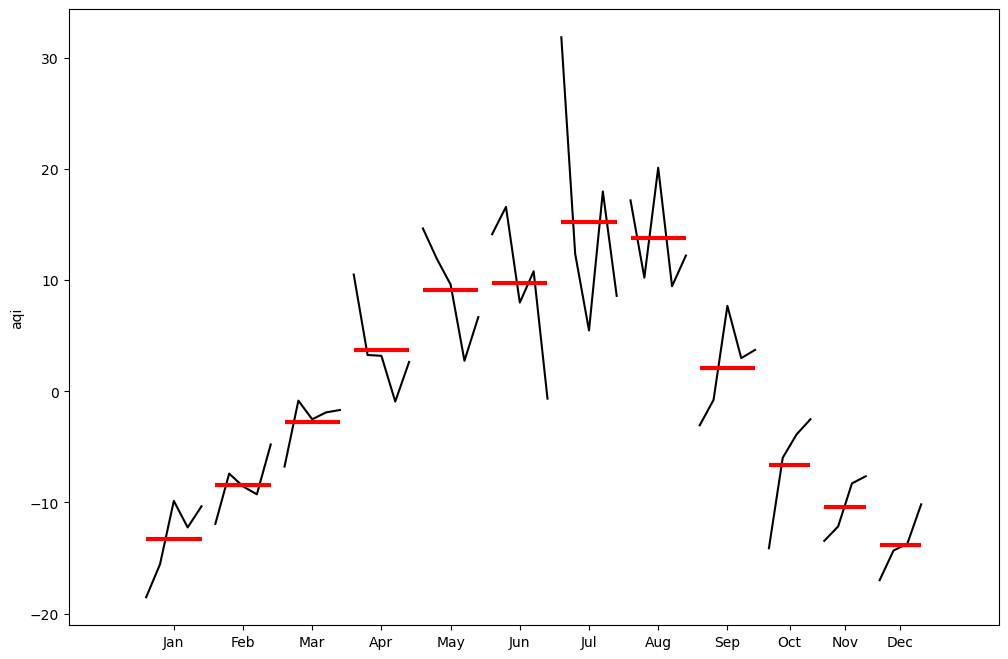

In [219]:
fig, ax = plt.subplots(figsize=(12, 8))

sm.graphics.tsa.month_plot( nm_df_stl.detrend, ylabel='aqi', ax=ax )

plt.show()

In [220]:
nm_df_stl['detrend_smooth'] = nm_ready_stl_fit.observed - (nm_ready_stl_fit.trend + nm_ready_stl_fit.resid)


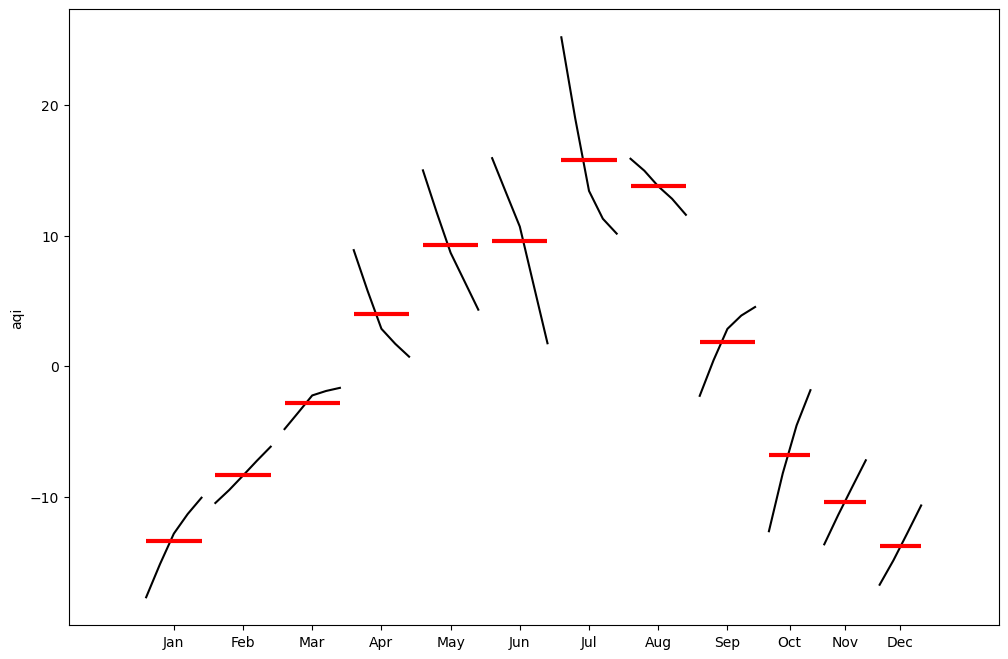

In [221]:
fig, ax = plt.subplots(figsize=(12, 8))

sm.graphics.tsa.month_plot( nm_df_stl.detrend_smooth, ylabel='aqi', ax=ax )

plt.show()

## Monthly time series Kentucky_Washington

In [222]:
kw_df = aqi_all[aqi_all['Defining_Site'] == '21-229-9991']


In [223]:
kw_df.loc[ kw_df['Defining_Parameter'] == 'Ozone', :].reset_index(drop = True)

State_Name county_Name  State_Code  County_Code       Date  AQI Category  \
0      Kentucky  Washington          21          229   1/1/2018   29     Good   
1      Kentucky  Washington          21          229   1/2/2018   33     Good   
2      Kentucky  Washington          21          229   1/3/2018   31     Good   
3      Kentucky  Washington          21          229   1/4/2018   28     Good   
4      Kentucky  Washington          21          229   1/5/2018   27     Good   
...         ...         ...         ...          ...        ...  ...      ...   
1686   Kentucky  Washington          21          229  8/27/2022   41     Good   
1687   Kentucky  Washington          21          229  8/28/2022   36     Good   
1688   Kentucky  Washington          21          229  8/29/2022   25     Good   
1689   Kentucky  Washington          21          229  8/30/2022   39     Good   
1690   Kentucky  Washington          21          229  8/31/2022   46     Good   

     Defining_Parameter Defining_Site  Number_of_Sites_Reporting    date_dt  \
0                 Ozone   21-229-9991                          1 2018-01-01   
1                 Ozone   21-229-9991                          1 2018-01-02   
2                 Ozone   21-229-9991                          1 2018-01-03   
3                 Ozone   21-229-9991                          1 2018-01-04   
4                 Ozone   21-229-9991                          1 2018-01-05   
...                 ...           ...                        ...        ...   
1686              Ozone   21-229-9991                          1 2022-08-27   
1687              Ozone   21-229-9991                          1 2022-08-28   
1688              Ozone   21-229-9991                          1 2022-08-29   
1689              Ozone   21-229-9991                          1 2022-08-30   
1690              Ozone   21-229-9991                          1 2022-08-31   

      the_year  the_month         State_County  
0         2018          1  Kentucky_Washington  
1         2018          1  Kentucky_Washington  
2         2018          1  Kentucky_Washington  
3         2018          1  Kentucky_Washington  
4         2018          1  Kentucky_Washington  
...        ...        ...                  ...  
1686      2022          8  Kentucky_Washington  
1687      2022          8  Kentucky_Washington  
1688      2022          8  Kentucky_Washington  
1689      2022          8  Kentucky_Washington  
1690      2022          8  Kentucky_Washington  

[1691 rows x 14 columns]

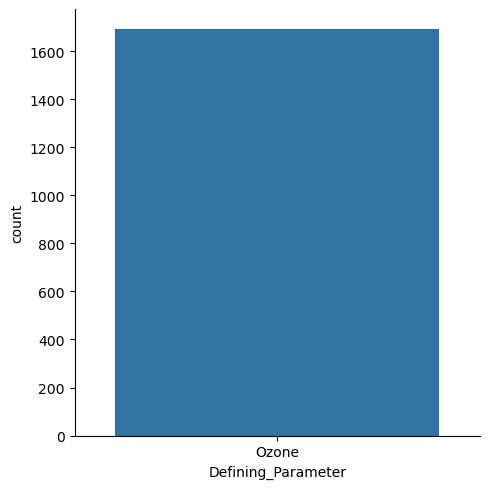

In [224]:
sns.catplot(data = kw_df, x='Defining_Parameter' ,kind='count')

plt.show()

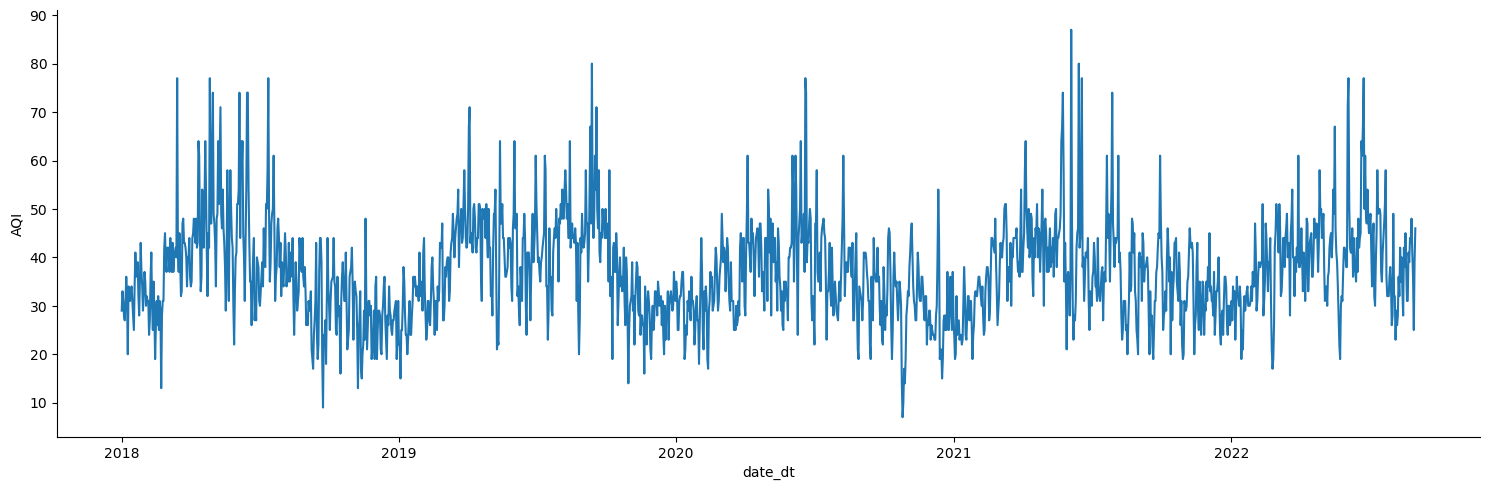

In [225]:
sns.relplot(data = kw_df, x='date_dt', y='AQI', kind = 'line', aspect =3 )
plt.show()

In [226]:
kw_df['the_week'] = kw_df.date_dt.dt.weekofyear

C:\Users\Bhava\AppData\Local\Temp\ipykernel_17624\1712515505.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  kw_df['the_week'] = kw_df.date_dt.dt.weekofyear
C:\Users\Bhava\AppData\Local\Temp\ipykernel_17624\1712515505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kw_df['the_week'] = kw_df.date_dt.dt.weekofyear


In [227]:
ken_w_df = kw_df[['date_dt', 'AQI','the_year', 'State_County' , 'the_month', 'the_week']].reset_index(drop= True)

In [228]:
kw_series = ken_w_df.AQI.copy()

In [229]:
print( kw_series.index )

RangeIndex(start=0, stop=1691, step=1)


In [230]:
kw_series.index = ken_w_df.date_dt

In [231]:
print( kw_series.index )

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2022-08-22', '2022-08-23', '2022-08-24', '2022-08-25',
               '2022-08-26', '2022-08-27', '2022-08-28', '2022-08-29',
               '2022-08-30', '2022-08-31'],
              dtype='datetime64[ns]', name='date_dt', length=1691, freq=None)


### Resample_Kentucky_Washington

In [232]:
kw_ready_series = kw_series.copy().resample('MS').mean()

In [233]:
print( kw_ready_series.index )

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01'],
     

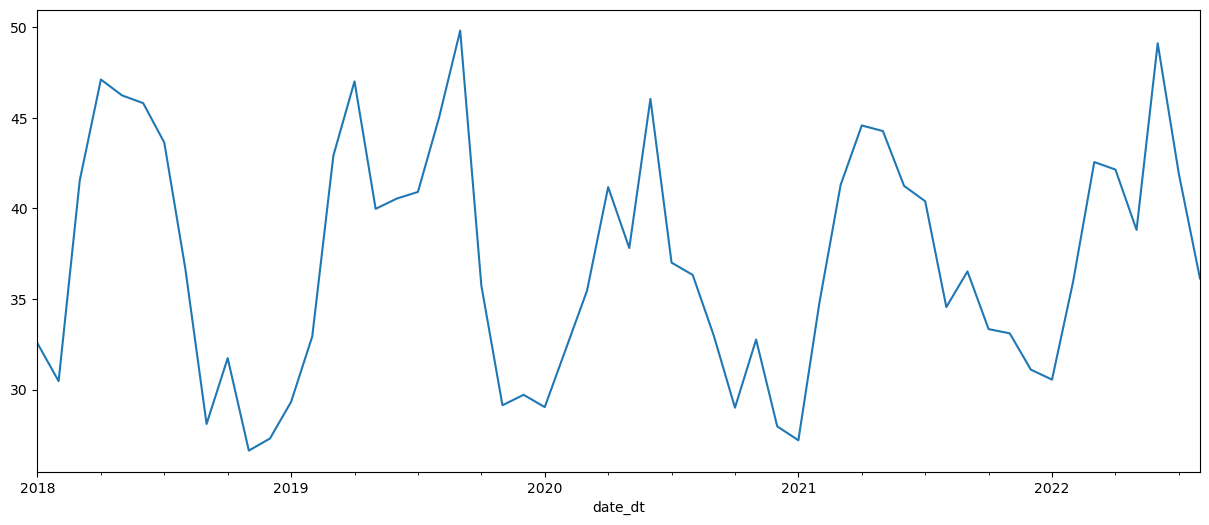

In [234]:
kw_ready_series.plot( figsize=(15, 6) )

plt.show()

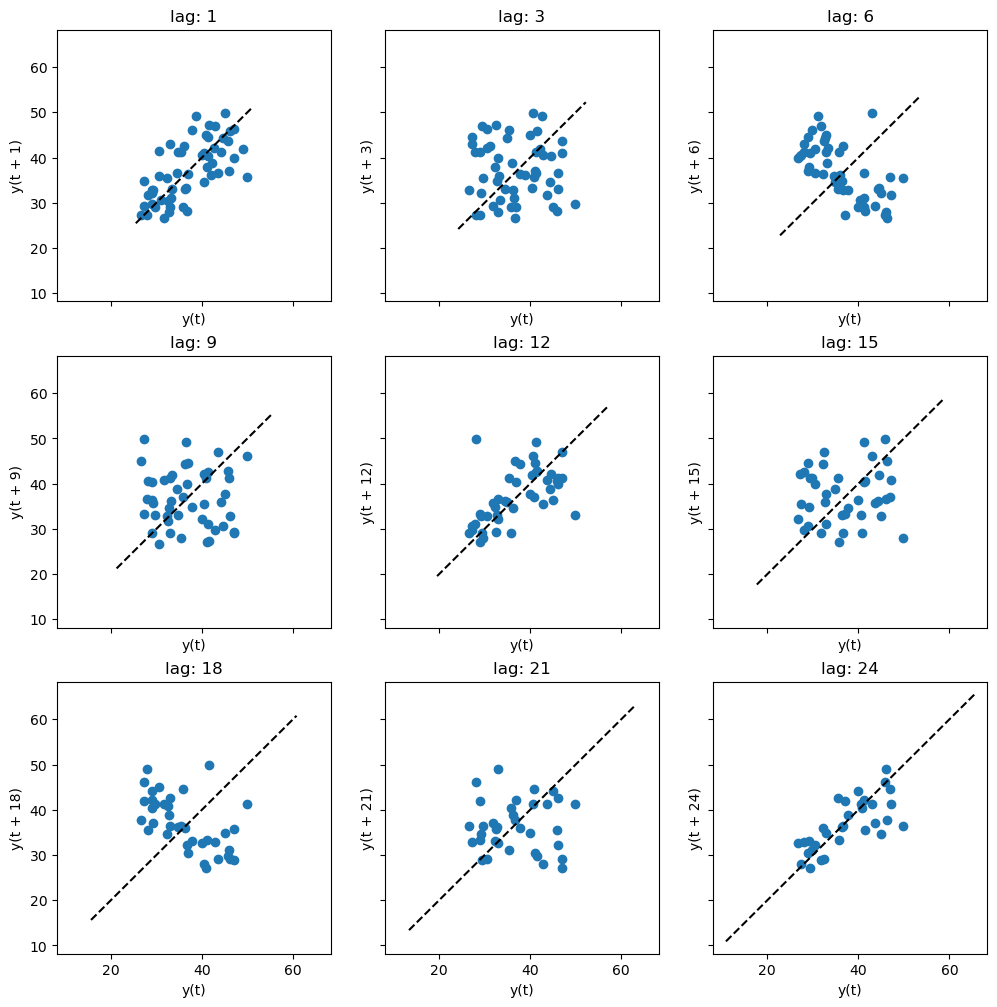

In [235]:
lags_use = [1, 3, 6, 9, 12, 15, 18, 21, 24]

fig, ax = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)

ax = ax.ravel()

for k in range(len(lags_use)):
    pd.plotting.lag_plot( kw_ready_series, lag=lags_use[k], ax=ax[k] )
    ax[k].plot( ax[k].get_xlim(), ax[k].get_ylim(), 'k--')
    ax[k].set_title('lag: ' + str(lags_use[k]) )

plt.show()

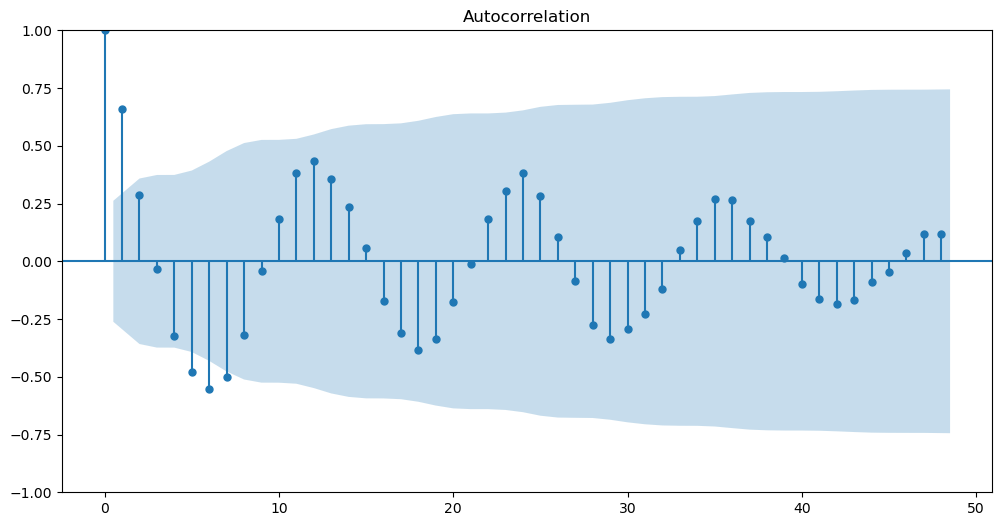

In [236]:
fig, ax = plt.subplots(figsize=(12, 6))

sm.graphics.tsa.plot_acf( kw_ready_series.values.squeeze(), lags=48, ax = ax)

plt.show()

### Decomposition Kentucky_Washington

In [237]:
kw_my_decomposition = sm.tsa.seasonal_decompose(kw_ready_series, model='additive')


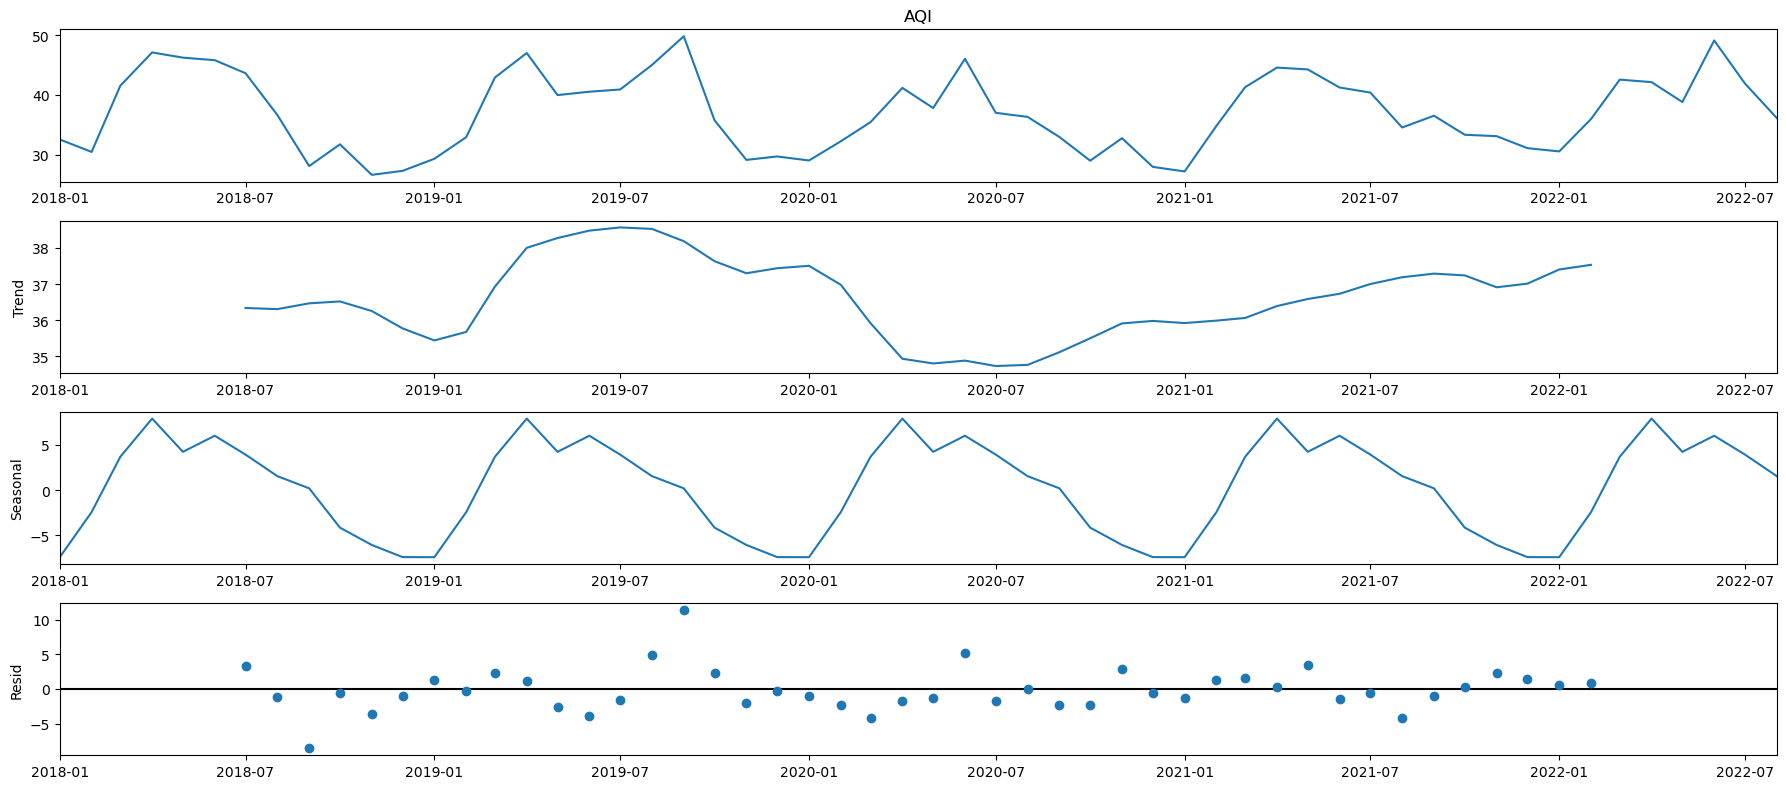

In [238]:
plt.rcParams['figure.figsize'] = 18,8
plt.show()

fig = kw_my_decomposition.plot()

In [239]:
kw_df_decomp = pd.DataFrame({'observed': kw_my_decomposition.observed, 
                          'seasonal_adjusted': kw_my_decomposition.observed - kw_my_decomposition.seasonal},
                        index=kw_ready_series.index)

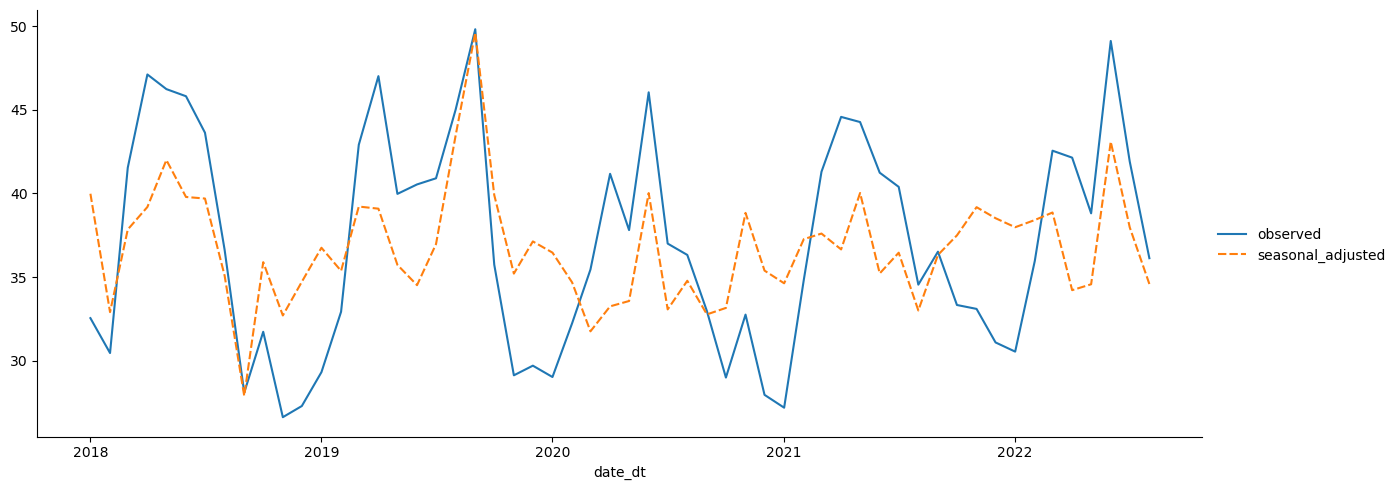

In [240]:
sns.relplot( data = kw_df_decomp, kind='line', aspect=2.5 )

plt.show()

In [241]:
from statsmodels.tsa.seasonal import STL
kw_ready_stl = STL( kw_ready_series )


In [242]:
kw_ready_stl_fit = kw_ready_stl.fit()


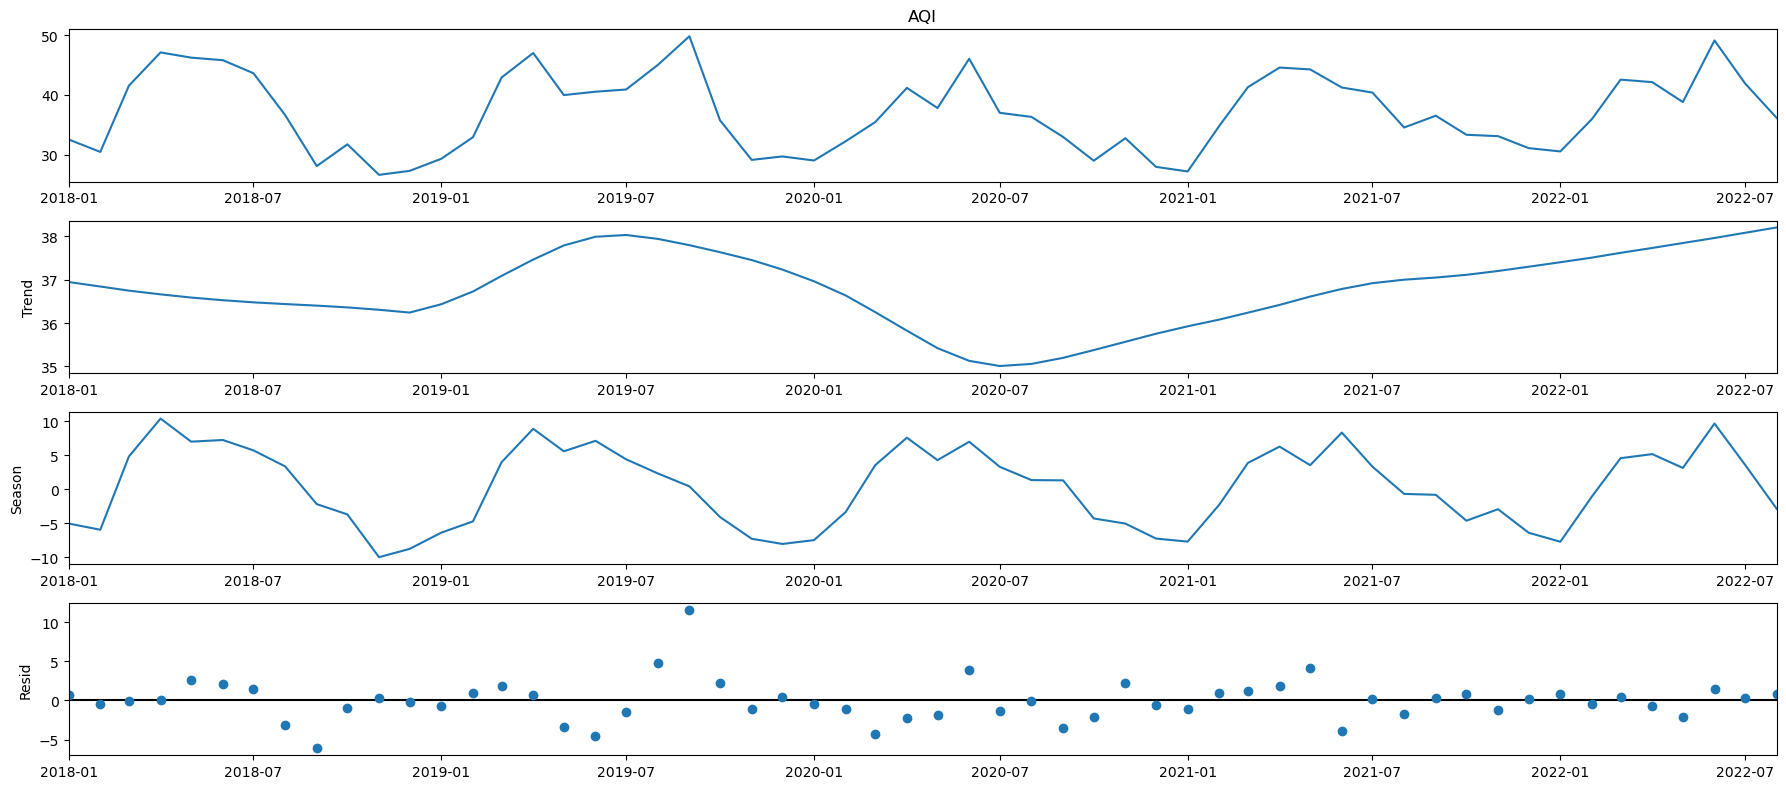

In [243]:
fig = kw_ready_stl_fit.plot()


In [244]:
kw_df_stl = pd.DataFrame({'observed': kw_ready_stl_fit.observed, 
                       'seasonal_adjusted': kw_ready_stl_fit.observed - kw_ready_stl_fit.seasonal,
                       'detrend': kw_ready_stl_fit.observed - kw_ready_stl_fit.trend},
                      index=kw_ready_series.index)

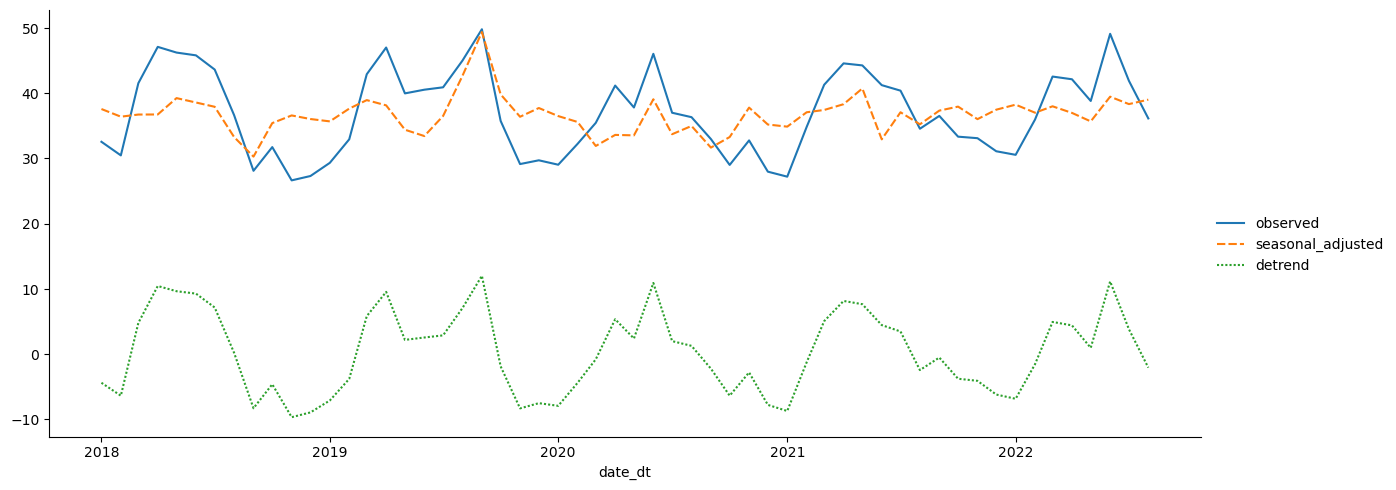

In [245]:
sns.relplot( data = kw_df_stl, kind='line', aspect=2.5 )

plt.show()

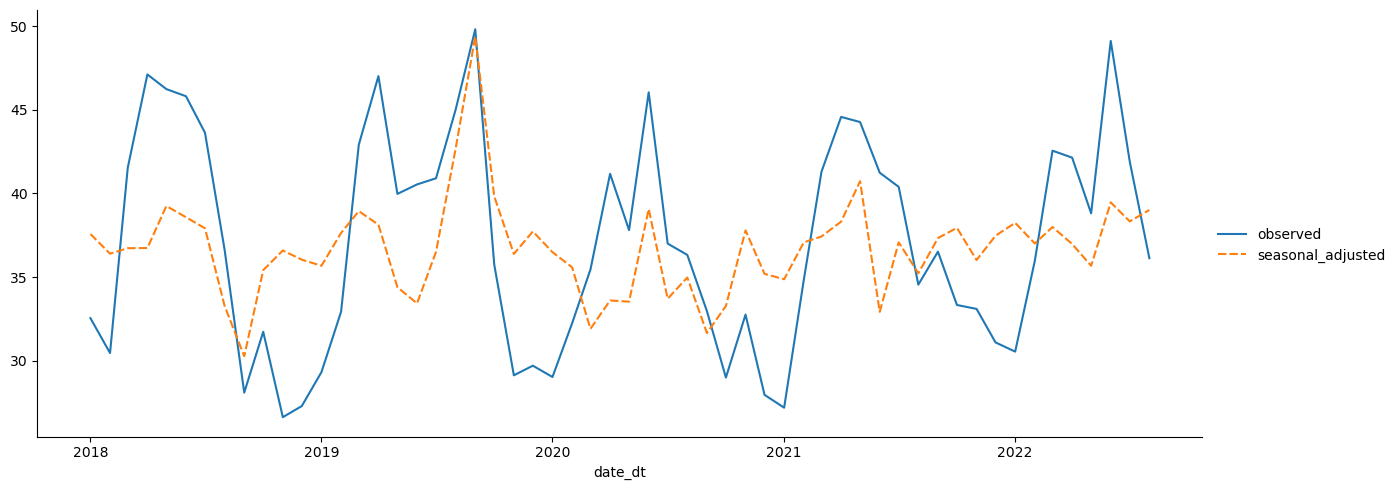

In [246]:
sns.relplot( data = kw_df_stl.loc[:, ['observed', 'seasonal_adjusted']], kind='line', aspect=2.5 )

plt.show()

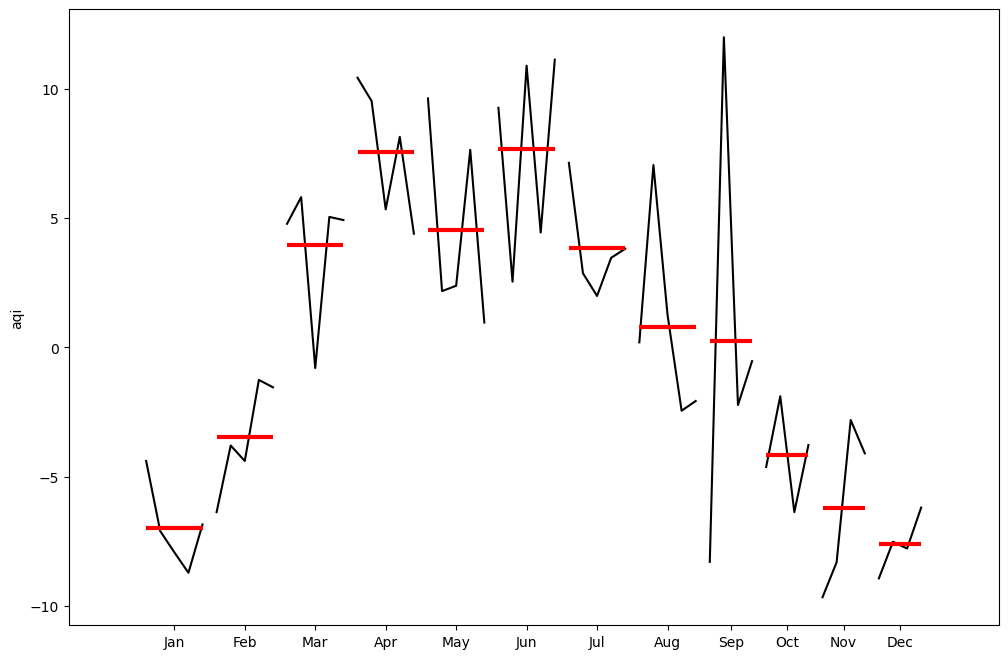

In [247]:
fig, ax = plt.subplots(figsize=(12, 8))

sm.graphics.tsa.month_plot( kw_df_stl.detrend, ylabel='aqi', ax=ax )

plt.show()

In [248]:
kw_df_stl['detrend_smooth'] = kw_ready_stl_fit.observed - (kw_ready_stl_fit.trend + kw_ready_stl_fit.resid)


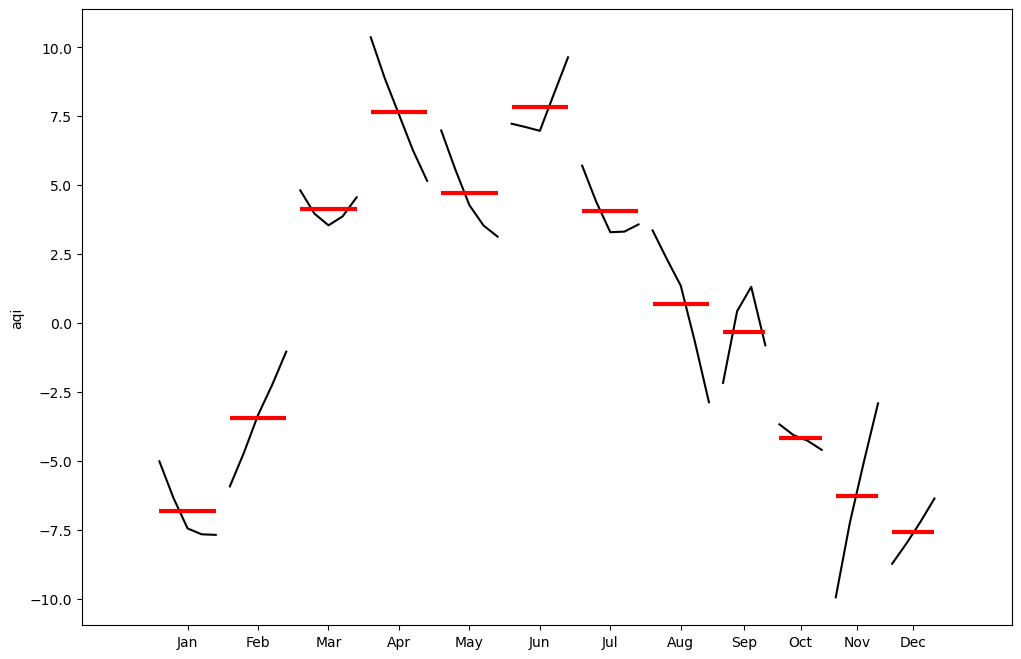

In [249]:
fig, ax = plt.subplots(figsize=(12, 8))

sm.graphics.tsa.month_plot( kw_df_stl.detrend_smooth, ylabel='aqi', ax=ax )

plt.show()

## Monthly Time series Indiana_Hendricks

In [250]:
ih_df = aqi_all[aqi_all['Defining_Site'] == '18-063-0004']


In [251]:
ih_df.loc[ ih_df['Defining_Parameter'] == 'Ozone', :].reset_index(drop = True)

State_Name county_Name  State_Code  County_Code       Date  AQI Category  \
0       Indiana   Hendricks          18           63   1/1/2018   31     Good   
1       Indiana   Hendricks          18           63   1/2/2018   27     Good   
2       Indiana   Hendricks          18           63   1/3/2018   29     Good   
3       Indiana   Hendricks          18           63   1/4/2018   29     Good   
4       Indiana   Hendricks          18           63   1/5/2018   31     Good   
...         ...         ...         ...          ...        ...  ...      ...   
1684    Indiana   Hendricks          18           63  8/27/2022   40     Good   
1685    Indiana   Hendricks          18           63  8/28/2022   35     Good   
1686    Indiana   Hendricks          18           63  8/29/2022   37     Good   
1687    Indiana   Hendricks          18           63  8/30/2022   32     Good   
1688    Indiana   Hendricks          18           63  8/31/2022   31     Good   

     Defining_Parameter Defining_Site  Number_of_Sites_Reporting    date_dt  \
0                 Ozone   18-063-0004                          1 2018-01-01   
1                 Ozone   18-063-0004                          1 2018-01-02   
2                 Ozone   18-063-0004                          1 2018-01-03   
3                 Ozone   18-063-0004                          1 2018-01-04   
4                 Ozone   18-063-0004                          1 2018-01-05   
...                 ...           ...                        ...        ...   
1684              Ozone   18-063-0004                          1 2022-08-27   
1685              Ozone   18-063-0004                          1 2022-08-28   
1686              Ozone   18-063-0004                          1 2022-08-29   
1687              Ozone   18-063-0004                          1 2022-08-30   
1688              Ozone   18-063-0004                          1 2022-08-31   

      the_year  the_month       State_County  
0         2018          1  Indiana_Hendricks  
1         2018          1  Indiana_Hendricks  
2         2018          1  Indiana_Hendricks  
3         2018          1  Indiana_Hendricks  
4         2018          1  Indiana_Hendricks  
...        ...        ...                ...  
1684      2022          8  Indiana_Hendricks  
1685      2022          8  Indiana_Hendricks  
1686      2022          8  Indiana_Hendricks  
1687      2022          8  Indiana_Hendricks  
1688      2022          8  Indiana_Hendricks  

[1689 rows x 14 columns]

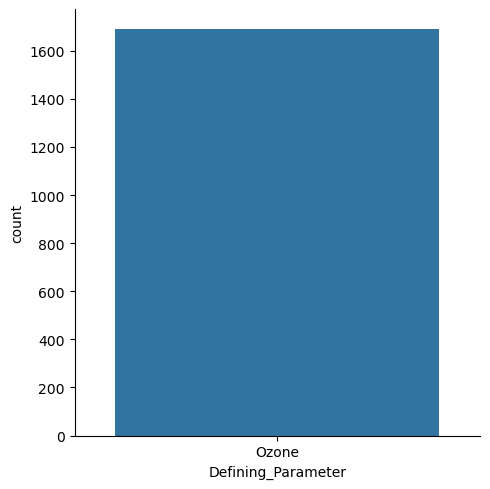

In [252]:
sns.catplot(data = ih_df, x='Defining_Parameter' ,kind='count')

plt.show()

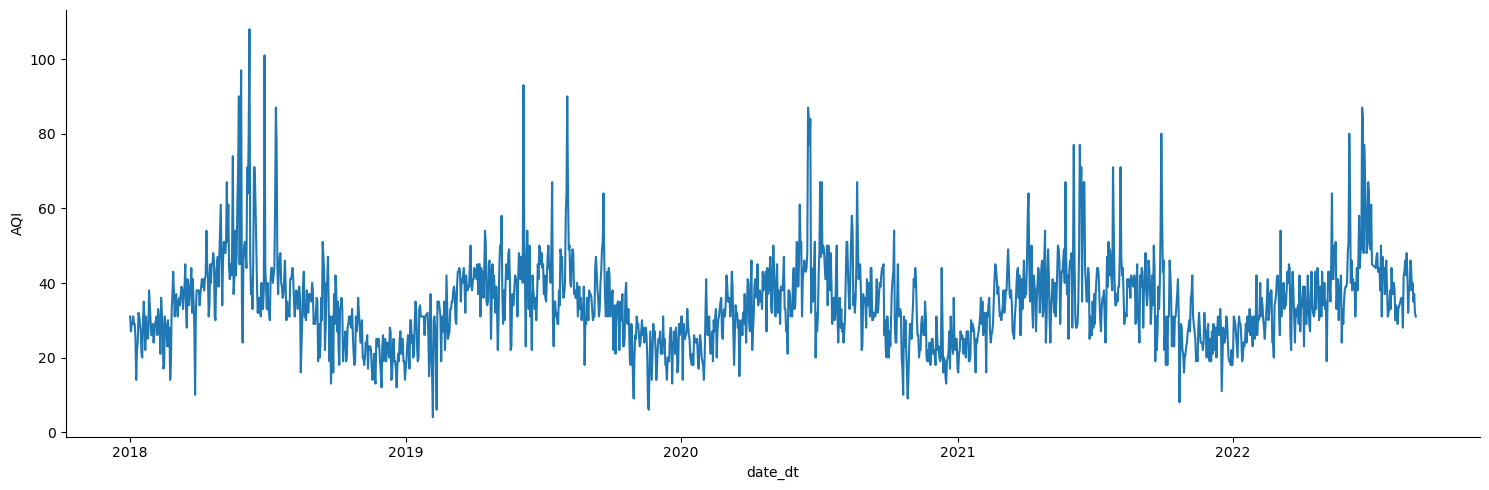

In [253]:
sns.relplot(data = ih_df, x='date_dt', y='AQI', kind = 'line', aspect =3 )
plt.show()

In [254]:
ih_df['the_week'] = ih_df.date_dt.dt.weekofyear

C:\Users\Bhava\AppData\Local\Temp\ipykernel_17624\1245088736.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  ih_df['the_week'] = ih_df.date_dt.dt.weekofyear
C:\Users\Bhava\AppData\Local\Temp\ipykernel_17624\1245088736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ih_df['the_week'] = ih_df.date_dt.dt.weekofyear


In [255]:
in_h_df = ih_df[['date_dt', 'AQI','the_year', 'State_County' , 'the_month', 'the_week']].reset_index(drop= True)

In [256]:
ih_series = in_h_df.AQI.copy()

In [257]:
print( ih_series.index )

RangeIndex(start=0, stop=1689, step=1)


In [258]:
ih_series.index = in_h_df.date_dt

In [259]:
print( ih_series.index )

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2022-08-22', '2022-08-23', '2022-08-24', '2022-08-25',
               '2022-08-26', '2022-08-27', '2022-08-28', '2022-08-29',
               '2022-08-30', '2022-08-31'],
              dtype='datetime64[ns]', name='date_dt', length=1689, freq=None)


### Resampling Indiana_Hendricks

In [260]:
ih_ready_series = ih_series.copy().resample('MS').mean()

In [261]:
print( ih_ready_series.index )

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01'],
     

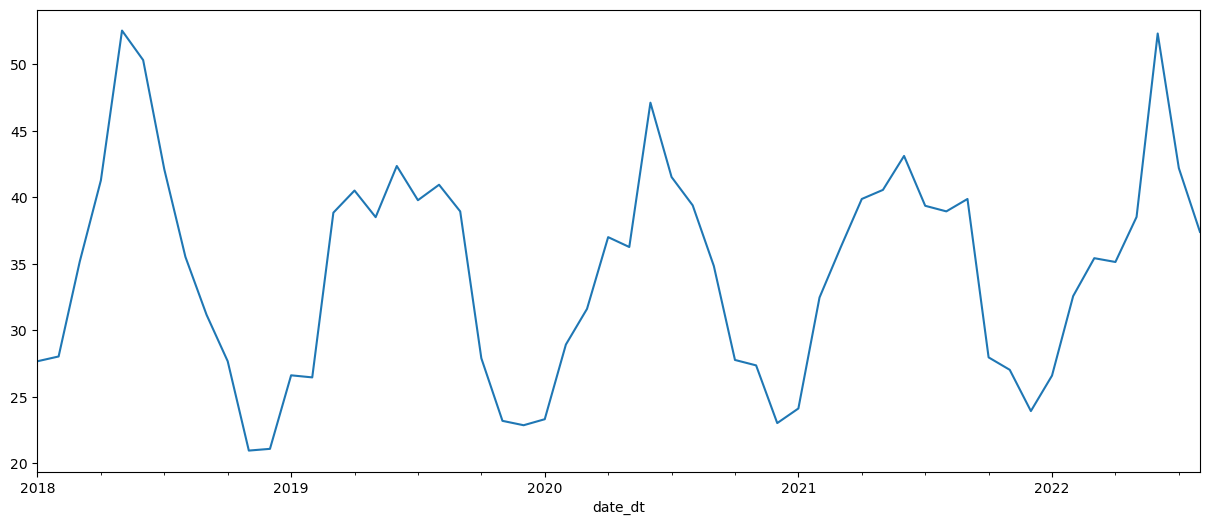

In [262]:
ih_ready_series.plot( figsize=(15, 6) )

plt.show()

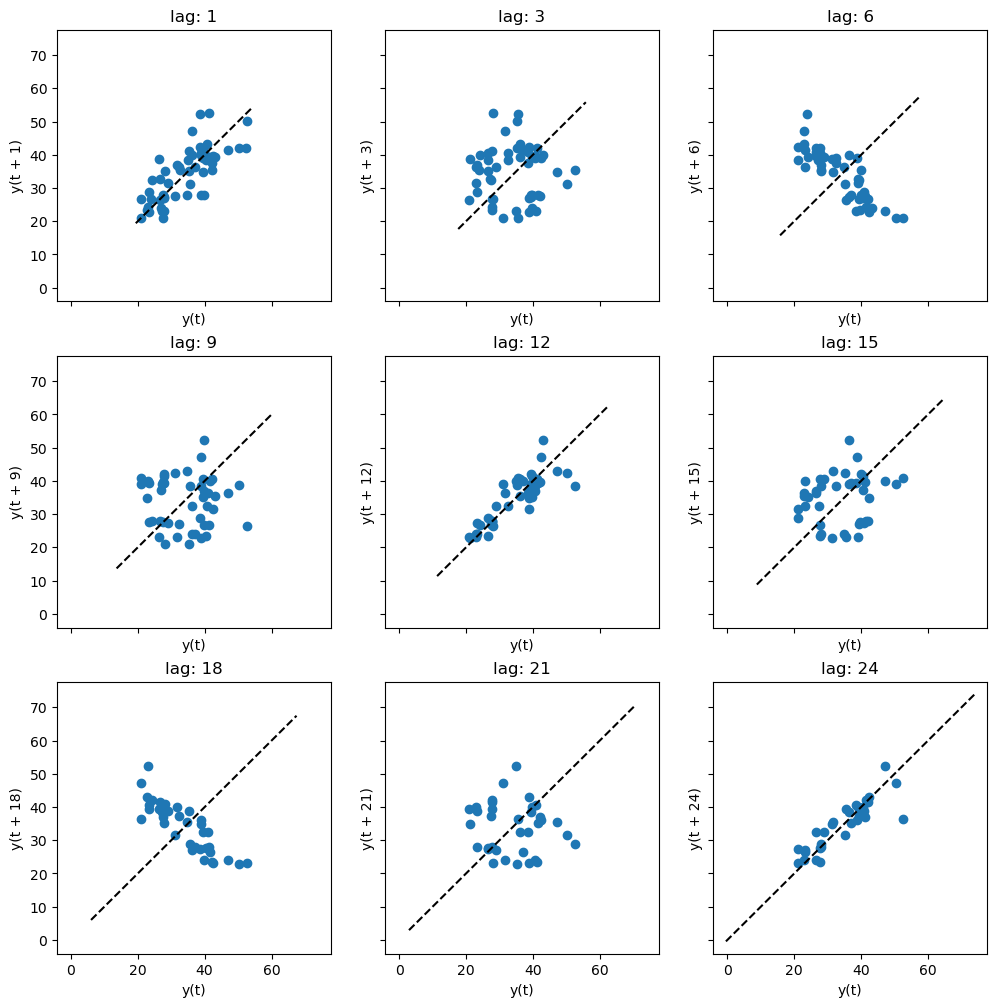

In [263]:
lags_use = [1, 3, 6, 9, 12, 15, 18, 21, 24]

fig, ax = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)

ax = ax.ravel()

for k in range(len(lags_use)):
    pd.plotting.lag_plot( ih_ready_series, lag=lags_use[k], ax=ax[k] )
    ax[k].plot( ax[k].get_xlim(), ax[k].get_ylim(), 'k--')
    ax[k].set_title('lag: ' + str(lags_use[k]) )

plt.show()

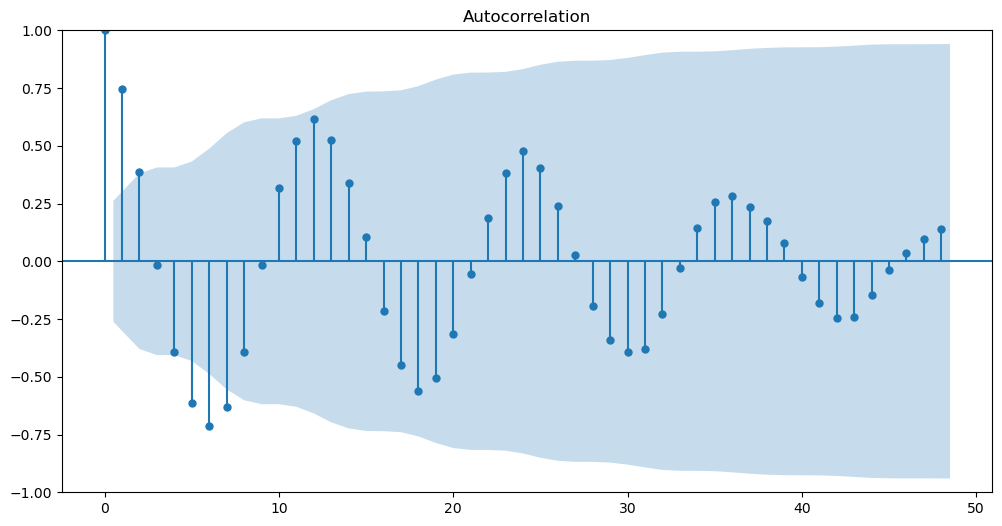

In [264]:
fig, ax = plt.subplots(figsize=(12, 6))

sm.graphics.tsa.plot_acf( ih_ready_series.values.squeeze(), lags=48, ax = ax)

plt.show()

### Decomposition Indiana_Hendricks

In [265]:
ih_my_decomposition = sm.tsa.seasonal_decompose(ih_ready_series, model='additive')


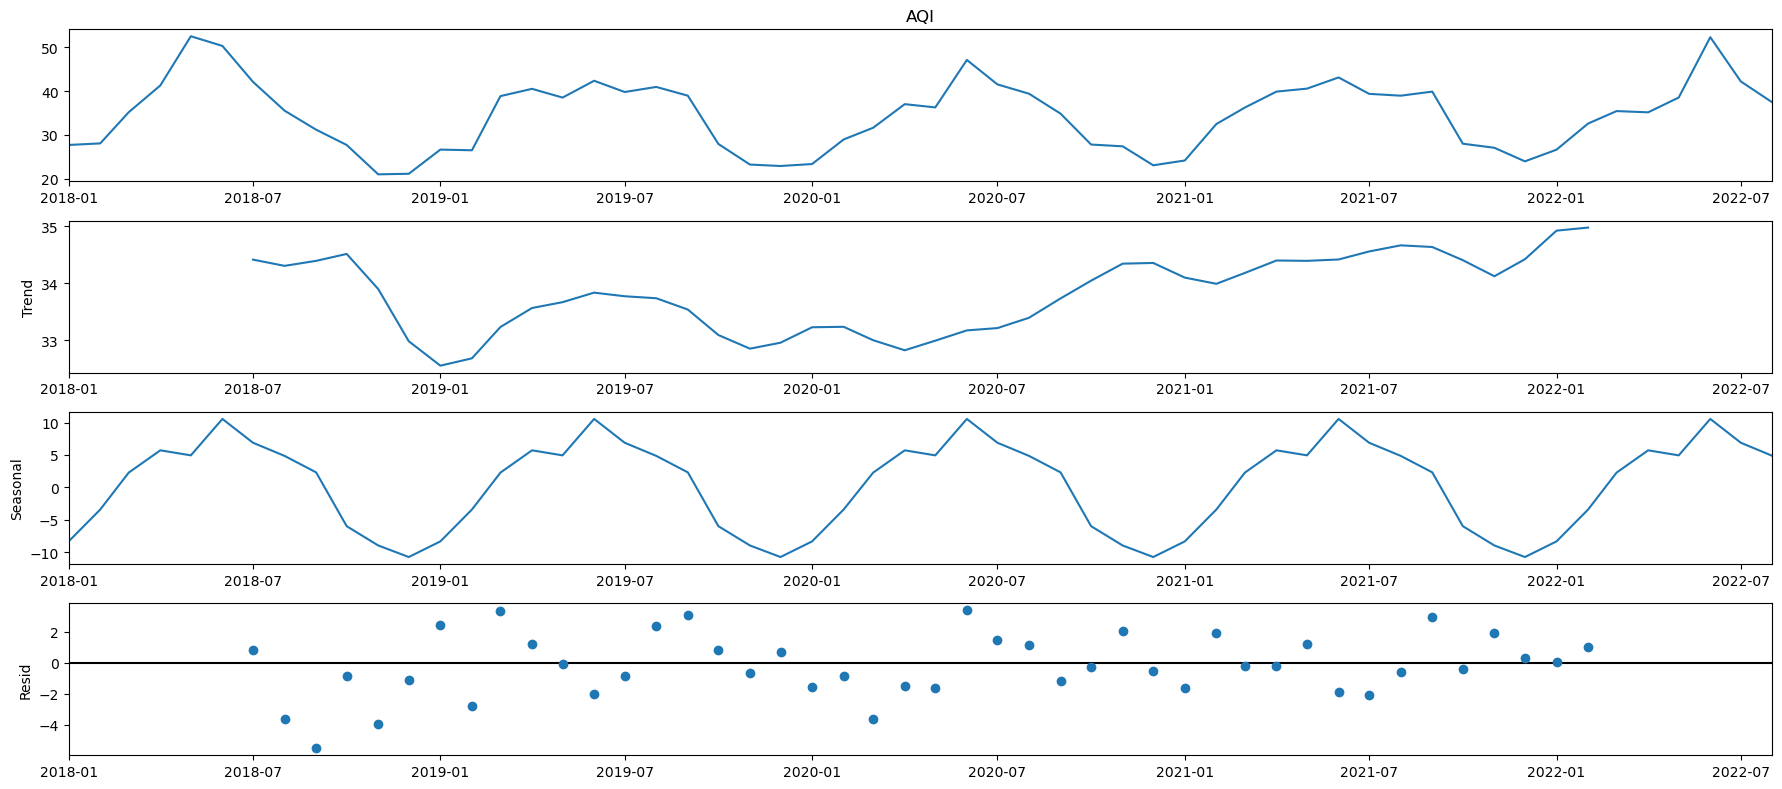

In [266]:
plt.rcParams['figure.figsize'] = 18,8
plt.show()

fig = ih_my_decomposition.plot()

In [267]:
ih_df_decomp = pd.DataFrame({'observed': ih_my_decomposition.observed, 
                          'seasonal_adjusted': ih_my_decomposition.observed - ih_my_decomposition.seasonal},
                        index=ih_ready_series.index)

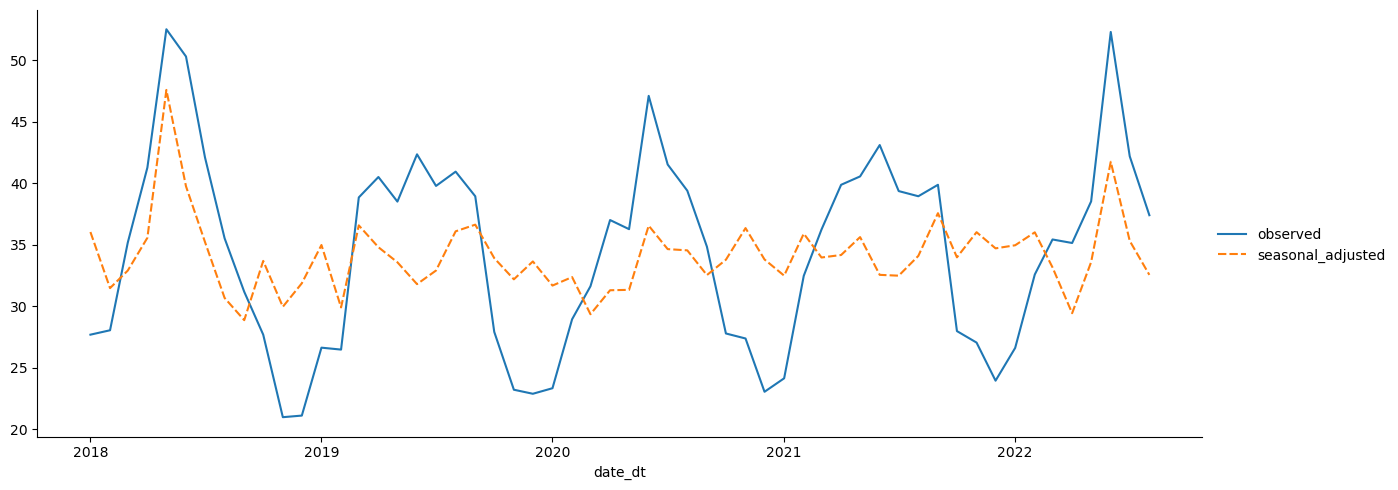

In [268]:
sns.relplot( data = ih_df_decomp, kind='line', aspect=2.5 )

plt.show()

In [269]:
from statsmodels.tsa.seasonal import STL
ih_ready_stl = STL( ih_ready_series )


In [270]:
ih_ready_stl_fit = ih_ready_stl.fit()


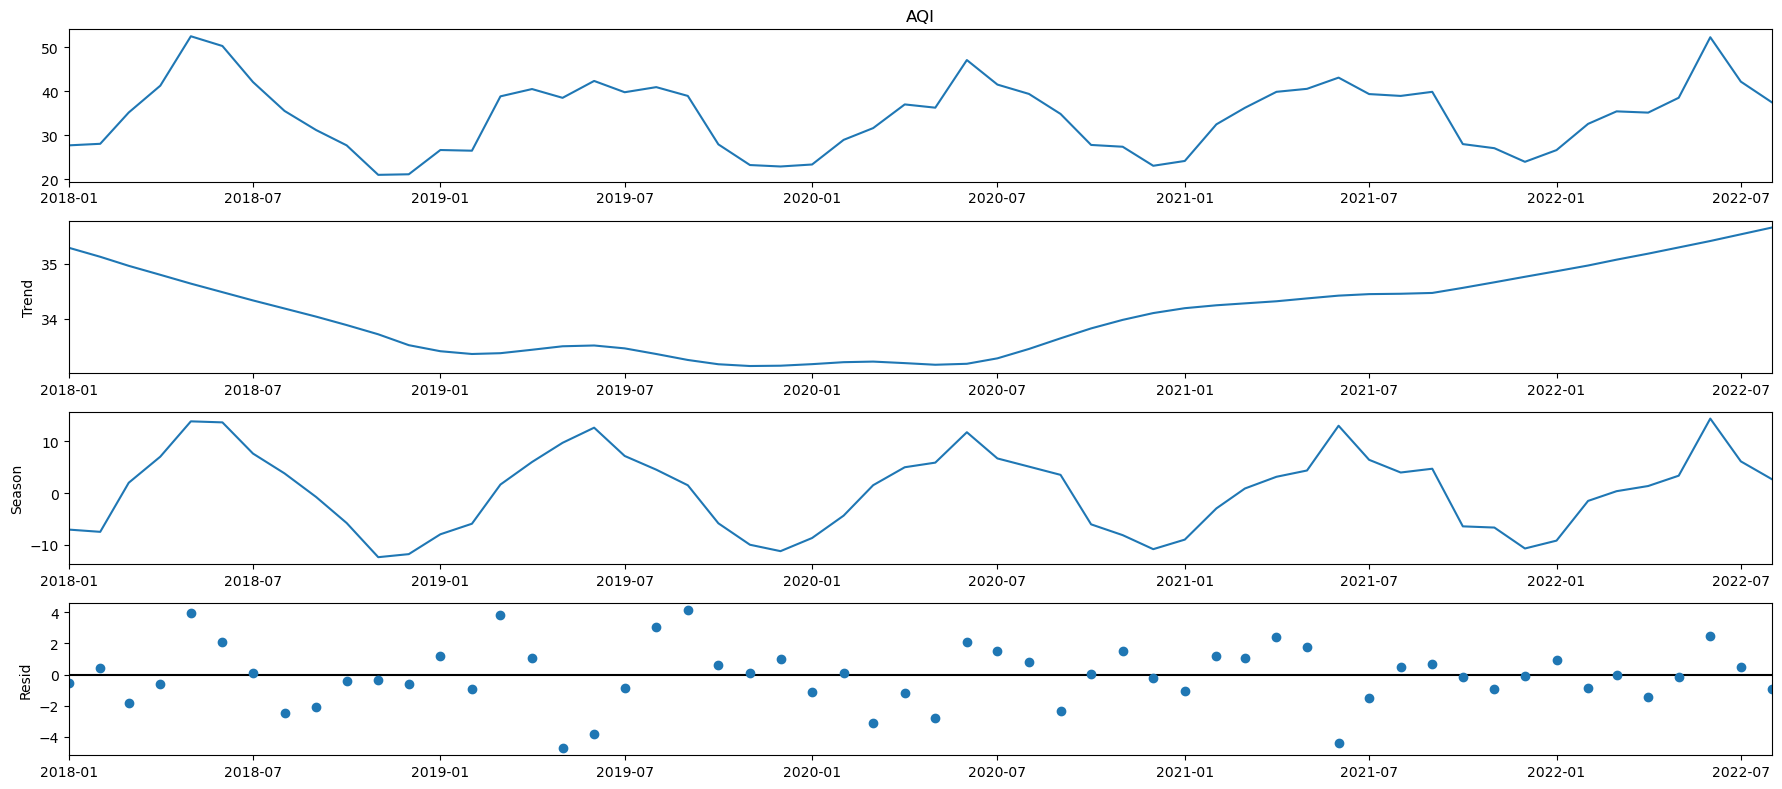

In [271]:
fig = ih_ready_stl_fit.plot()


In [272]:
ih_df_stl = pd.DataFrame({'observed': ih_ready_stl_fit.observed, 
                       'seasonal_adjusted': ih_ready_stl_fit.observed - ih_ready_stl_fit.seasonal,
                       'detrend': ih_ready_stl_fit.observed - ih_ready_stl_fit.trend},
                      index=ih_ready_series.index)

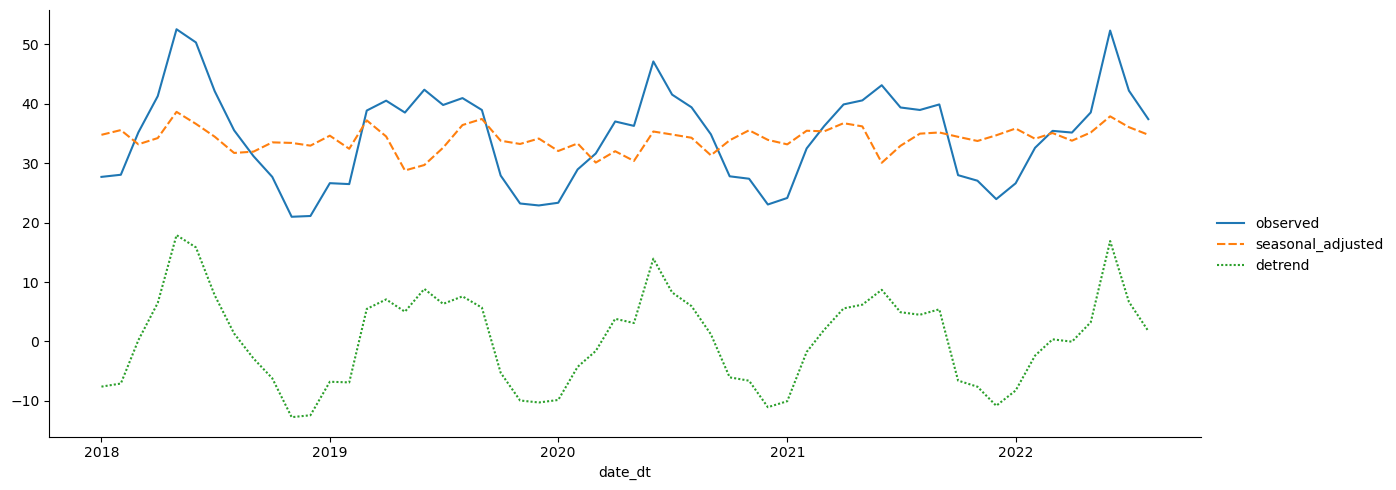

In [273]:
sns.relplot( data = ih_df_stl, kind='line', aspect=2.5 )

plt.show()

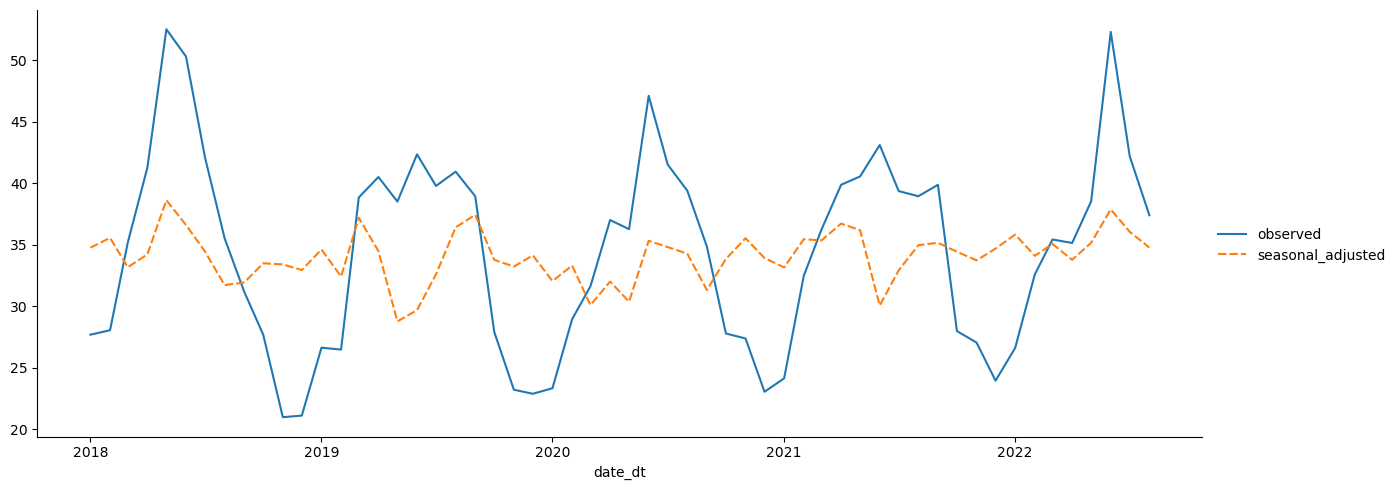

In [274]:
sns.relplot( data = ih_df_stl.loc[:, ['observed', 'seasonal_adjusted']], kind='line', aspect=2.5 )

plt.show()

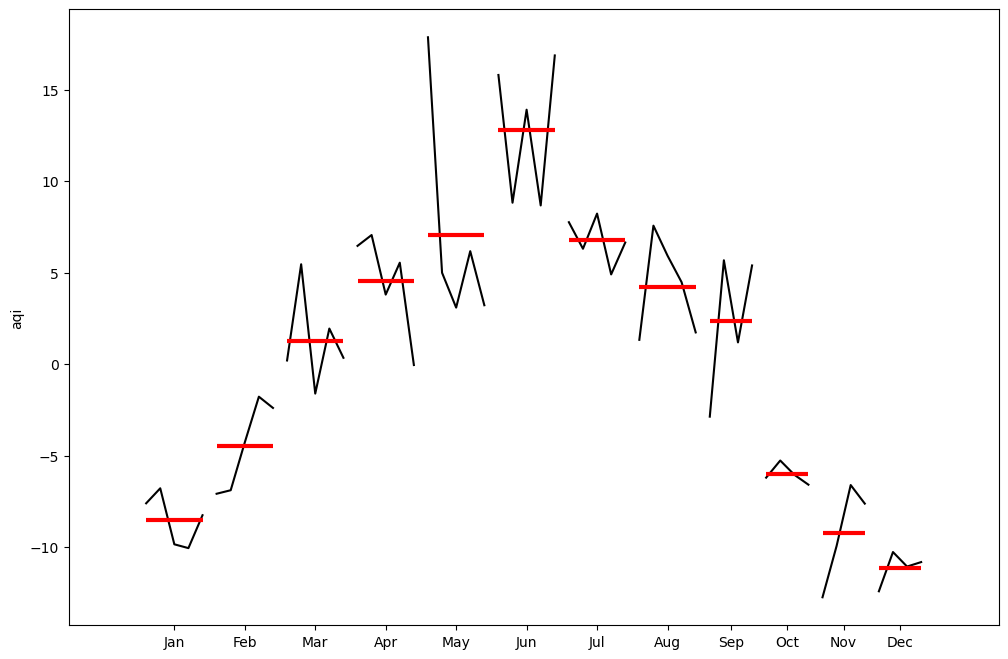

In [275]:
fig, ax = plt.subplots(figsize=(12, 8))

sm.graphics.tsa.month_plot( ih_df_stl.detrend, ylabel='aqi', ax=ax )

plt.show()

In [276]:
ih_df_stl['detrend_smooth'] = ih_ready_stl_fit.observed - (ih_ready_stl_fit.trend + ih_ready_stl_fit.resid)


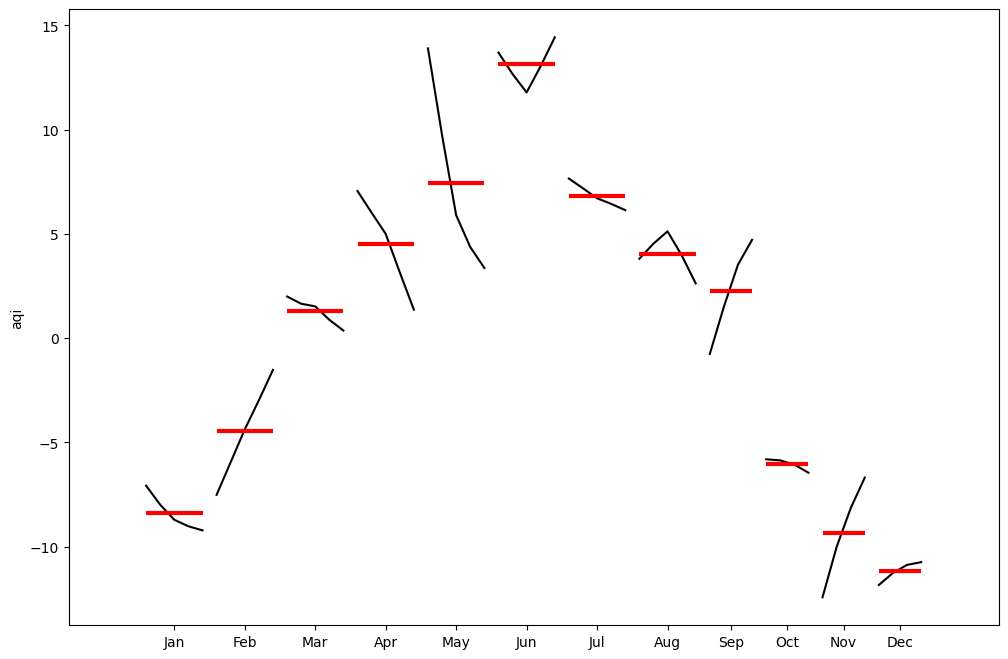

In [277]:
fig, ax = plt.subplots(figsize=(12, 8))

sm.graphics.tsa.month_plot( ih_df_stl.detrend_smooth, ylabel='aqi', ax=ax )

plt.show()